# <span style='color:#0D2BA5'>Projet 7 - Implémentez un modèle de scoring</span>

## <span style='background:#33B5FF'>Table des Matieres</span>

In [1]:
#!pip install jyquickhelper
#from jyquickhelper import add_notebook_menu
#add_notebook_menu()

## <span style='background:#33B5FF'>1. Introduction</span>

*****
**Mission**
*****
**Développer un modèle de scoring de la probabilité de défaut de paiement du client** pour étayer la décision d'accorder ou non un prêt à un client potentiel en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institut ions financières...).

*****
**Objectifs**
*****
- analyser le jeu de données,
- Construire **un modèle de scoring** qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique,
- réaliser une API au vu d'un **dashboard interactif** permettant aux chargés de clientèles d'expliquer de manière transparente la décision d'octroi ou non de crédit

*****
**Sources**
*****
- [Jeu de données](https://www.kaggle.com/c/home-credit-default-risk/data)

Le **Kernel Kaggle** utilisé pour l'analyse exploratoire ayant l'EDA le plus de commentaires et effectuant une analyse exploratoire complète sur toutes les fichiers csv mis à notre disposition a été livré par **Rishabh Rao** (Student at -Jaipur, Rajasthan, India).
- [Kernel Kaggle Rishabh Rao](https://www.kaggle.com/rishabhrao/home-credit-default-risk-extensive-eda)

Ce travail est complété par l'auteur par une présentation sur le site medium.com :
[Explications](https://medium.com/thecyphy/home-credit-default-risk-part-1-3bfe3c7ddd7a)

Les fonctions python utilisées pour l'EDA sont extraites du [github](https://github.com/rishabhrao1997/Home-Credit-Default-Risk) et stockées dans la librairie */kaggle/input/kernel-eda/eda.py*.

*****
**Processus EDA** (*extrait du Kernel Kaggle*)
***

Pour l'analyse des données, nous allons suivre les étapes suivantes :
- [x] Pour chaque table, nous allons d'abord vérifier les **statistiques de base** comme :
    - le nombre d'enregistrements dans les tables, 
    - le nombre de caractéristiques, 
    - le nombre de valeurs NaN, etc.
- [x] Ensuite, nous allons **explorer** certaines des **caractéristiques par rapport à la variable cible** pour chaque table.

Nous utiliserons les graphiques suivants :
- [x] Pour les caractéristiques catégorielles, nous utiliserons principalement des diagrammes à barres et des diagrammes circulaires.
- [x] Pour les caractéristiques continues/numériques, nous utiliserons des Box-Plots, des Probability Density Function ([PDF](https://towardsdatascience.com/what-is-a-probability-density-function-d9b4b8bea121) [PDF](https://towardsdatascience.com/probability-distribution-functions-demystified-a6e882759af3)), des Cumulative Density Function [CDF](https://pub.towardsai.net/pdf-cdf-in-machine-learning-5a10f7abeef6) [CDF](https://sandeepdubey001.medium.com/pdf-probability-density-function-and-cdf-cumulative-distribution-function-a6a48945739e) et des Violin-Plots.

Enfin, nous tirerons des observations de chaque graphique et noterons les idées importantes générées par les graphiques.

*Toute la suite est extraite du Kernel Kaggle*

*****
**Processus EDA** 
***

Pour l'analyse des données, nous allons suivre les étapes suivantes :
- [x] Pour chaque table, nous allons d'abord vérifier les **statistiques de base** comme :
    - le nombre d'enregistrements dans les tables, 
    - le nombre de caractéristiques, 
    - le nombre de valeurs NaN, etc.
- [x] Ensuite, nous allons **explorer** certaines des **caractéristiques par rapport à la variable cible** pour chaque table.

Nous utiliserons les graphiques suivants :
- [x] Pour les caractéristiques catégorielles, nous utiliserons principalement des diagrammes à barres et des diagrammes circulaires.
- [x] Pour les caractéristiques continues/numériques, nous utiliserons des Box-Plots, des Probability Density Function ([PDF](https://towardsdatascience.com/what-is-a-probability-density-function-d9b4b8bea121) [PDF](https://towardsdatascience.com/probability-distribution-functions-demystified-a6e882759af3)), des Cumulative Density Function [CDF](https://pub.towardsai.net/pdf-cdf-in-machine-learning-5a10f7abeef6) [CDF](https://sandeepdubey001.medium.com/pdf-probability-density-function-and-cdf-cumulative-distribution-function-a6a48945739e) et des Violin-Plots.

Enfin, nous tirerons des observations de chaque graphique et noterons les idées importantes générées par les graphiques.

***
***Note 1 :*** 
***
- Pour les variables catégorielles, nous allons tracer des Bar Plots et des Pie Plots. L'utilisation des diagrammes en bâtons et en secteurs sera basée sur le nombre de catégories uniques présentes dans une caractéristique. Si une caractéristique a trop de catégories, les afficher sur des Pie Plots peut être encombrant, et les Bar Plots font un meilleur travail pour montrer chaque catégorie. De plus, le diagramme en bâtons sera préféré lorsque les proportions de toutes les catégories sont plus ou moins les mêmes afin d'identifier les petites différences.
- Nous allons suivre la stratégie mentionnée ci-dessous pour tracer les caractéristiques catégorielles dans l'ensemble du cahier :
    - Tout d'abord, nous tracerons la distribution de chaque catégorie dans l'ensemble des données, dans le premier sous-graphe.
    - Ensuite, dans le deuxième sous-graphe, nous tracerons le pourcentage de défaillants de chaque catégorie, c'est-à-dire avec la cible = 1.
    - Par exemple, si une caractéristique contient le sexe, c'est-à-dire Homme et Femme, alors pour le premier sous-graphe, nous tracerons le nombre d'occurrences de chacun de Homme et Femme dans notre ensemble de données. Dans le deuxième sous-graphe, nous tracerons le nombre ou le pourcentage d'hommes par défaut parmi les hommes présents dans l'ensemble de données. Nous ferons de même pour les femmes. Nous procédons ainsi parce qu'il y aura quelques catégories qui seront dominantes par rapport à d'autres, et leurs caractéristiques par défaut ne seront pas identifiables si nous regardons seulement les comptes.
    
***
***Note 2 :*** 
***

Pour l'analyse des variables continues, nous utiliserons quatre types de graphiques selon les besoins : Distplot, CDF, Box-plots et Violin Plots.

- **DistPlots** : Le distplot sera utilisé lorsque nous voudrons voir les PDF de la variable continue. Ces PDF nous aideront à analyser où se trouvent la plupart de nos données.
- **CDF** : Les CDF peuvent être utilisées comme une extension des PDF pour voir quel pourcentage de points se trouve sous une certaine valeur seuil. Cela nous donne une bonne estimation de la distribution de la majorité des données.
- **Box-Plots** : Les diagrammes en boîte sont utiles lorsque nous voulons analyser toute la gamme de valeurs de notre variable continue. Ils montrent les 25ème, 50ème et 75ème percentiles dans un seul graphique. De plus, il donne également des idées sur la présence de valeurs aberrantes dans un ensemble de valeurs donné.
- **Graphiques en violon** : Les Violin-Plots ont tendance à combiner les caractéristiques des Distplots et des Box-Plots. Ils imitent verticalement le box-plot et montrent les quantiles, l'étendue des valeurs, et horizontalement ils montrent le PDF de la variable continue.

## <span style='background:#33B5FF'>2. Bibliothèques d'analyse Python</span>

In [2]:
# Chargement des librairies
import datetime
import sys
import time
from datetime import datetime
import warnings
#import jyquickhelper
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# import phik
# Plotly
import plotly
# import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Warnings
warnings.filterwarnings('ignore')
plotly.offline.init_notebook_mode(connected=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/imrrrr/16794938722698_Data Scientist-P7-01-banner.png
/kaggle/input/pret-a-de/Projet+Mise+en+prod+-+home-credit-default-risk/sample_submission.csv
/kaggle/input/pret-a-de/Projet+Mise+en+prod+-+home-credit-default-risk/bureau_balance.csv
/kaggle/input/pret-a-de/Projet+Mise+en+prod+-+home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/pret-a-de/Projet+Mise+en+prod+-+home-credit-default-risk/application_train.csv
/kaggle/input/pret-a-de/Projet+Mise+en+prod+-+home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/pret-a-de/Projet+Mise+en+prod+-+home-credit-default-risk/application_test.csv
/kaggle/input/pret-a-de/Projet+Mise+en+prod+-+home-credit-default-risk/previous_application.csv
/kaggle/input/pret-a-de/Projet+Mise+en+prod+-+home-credit-default-risk/credit_card_balance.csv
/kaggle/input/pret-a-de/Projet+Mise+en+prod+-+home-credit-default-risk/installments_payments.csv
/kaggle/input/pret-a-de/Projet+Mise+en+prod+-+home-credit-default-risk/bureau.

In [3]:
import sys
sys.path.append('/kaggle/input/kernel-eda/')

In [4]:
import eda

In [5]:
dico_pd_option = {
    'display.max_rows': 400,
    'display.max_column': 200,
    'display.width': 300,
    'display.precision': 4,
    'display.max_colwidth': 1000,
    'mode.chained_assignment': None
    #     # pandas DataFrame column and row display limits
    #     'max_columns': None,
    #     'max_rows': None,
    #     'display.max_colwidth': 800
}
for cle, val in dico_pd_option.items():
    pd.set_option(cle, val)

In [6]:
def lister_fichiers_repertoire(chemin_rep):
    '''
    Liste les noms des fichiers d'un répertoire et affiche la taille des
    fichiers en MegaBytes.
    Parameters
    ----------
    chemin_rep : chemin où se trouve le répertoire contenant les fichiers,
                 obligatoire.
    Returns
    -------
    None
    '''
    liste_fichiers = list(os.listdir(chemin_rep))
    dataframe_fic = pd.DataFrame(liste_fichiers, columns=['Nom_fichier'])
    dataframe_fic['Size_en_MB'] = dataframe_fic.Nom_fichier.apply(
        lambda x: round(os.stat(chemin_rep + x) .st_size / (1024 * 1024), 2))
    nb_fic = dataframe_fic.shape[0]
    if nb_fic > 1:
        display(str(nb_fic) + ' fichiers présents dans ce répertoire :')
    else:
        display(str() + ' fichier présent')

    return dataframe_fic.style.hide()

In [7]:
def resume_datasets(dataframes, noms):
    '''
    Résumé rapide du contenu, nom, nombre de lignes, nombre de variables,
    valeurs manquantes, variable avec valeurs manquantes... pour plusieurs
    dataframes transmis en paramètres.
    Parameters
    ----------
    dataframes : les dataframes à résumer, obligatoire.
    noms : les noms des dataframes transmis, obligatoire.
    Returns
    -------
    df_resume : dataframe de résumé
    '''
    print(f'Les données se décomposent en {len(dataframes)} fichier(s).')

    # Creating a DataFrame with useful information about all datasets
    df_resume = pd.DataFrame({})
    df_resume['Jeu de données'] = noms
    df_resume['Nb lignes'] = [df.shape[0] for df in dataframes]
    df_resume['Nb variables'] = [df.shape[1] for df in dataframes]
    df_resume['Nb nan'] = [df.isnull().sum().sum() for df in dataframes]
    df_resume['% nan'] = [(df.isnull().sum().sum() * 100 / np.product(df.shape)) for df in dataframes]
    df_resume['Nb var avec nan'] = [len(
        [col for col, null in df.isnull().sum().items() if null > 0]) for df in dataframes]
    df_resume['Var avec nan'] = [', '.join(
        [col for col, null in df.isnull().sum().items() if null > 0]) for df in dataframes]

    return df_resume.style.hide()

## <span style='background:#33B5FF'>3. Explorer les données </span>

In [8]:
# Répertoire de stockages des fichiers mis à notre disposition
path = '/kaggle/input/pret-a-de/Projet+Mise+en+prod+-+home-credit-default-risk/'

In [9]:
lister_fichiers_repertoire(path)

'10 fichiers présents dans ce répertoire :'

**Description des fichiers**

| Fichier | Description |
| --- | --- |
| <p style='text-align: justify;'>**application_train.csv** <br> **application_test.csv**</p> | <ul style='text-align: justify;'><li>Il s'agit du tableau principal, divisé en deux fichiers pour Train (avec TARGET) et Test (sans TARGET).</li> <li>Données statiques pour toutes les applications.</li><li>Une ligne représente un prêt dans notre échantillon de données.</li></ul> |
|  <p style='text-align: justify;'>**bureau.csv** |  <ul style='text-align: justify;'><li>Tous les crédits précédents du client fournis par d'autres institutions financières qui ont été rapportés au Credit Bureau (pour les clients qui ont un prêt dans notre échantillon). </li> <li> Pour chaque prêt de notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le Credit Bureau avant la date de la demande.</li> |
| <p style='text-align: justify;'>**bureau_balance.csv** | <ul style='text-align: justify;'><li>Soldes mensuels des crédits précédents dans Credit Bureau. </li> <li> Ce tableau a une ligne pour chaque mois d'historique de chaque crédit précédent rapporté au Credit Bureau - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois où nous avons un historique observable pour les crédits précédents) des lignes.</li></ul> |
| <p style='text-align: justify;'>**POS_CASH_balance.csv** | <ul style='text-align: justify;'><li>Instantanés des soldes mensuels des prêts POS (point of sales) et cash précédents que le demandeur a eu avec Home Credit. </li> <li> Ce tableau comporte une ligne pour chaque mois de l'historique de chaque crédit précédent au Home Credit (crédit à la consommation et prêts au comptant) lié aux prêts de notre échantillon - c'est-à-dire que le tableau comporte (# de prêts dans l'échantillon * # de crédits précédents relatifs * # de mois dans lesquels nous avons un historique observable pour les crédits précédents) lignes.</li></ul> |
| <p style='text-align: justify;'>**credit_card_balance.csv** | <ul style='text-align: justify;'><li>Instantanés des soldes mensuels des cartes de crédit précédentes que le demandeur possède chez Home Credit. </li> <li>  Ce tableau comporte une ligne pour chaque mois de l'historique de chaque crédit précédent dans le Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau comporte (#prêts dans l'échantillon * # de cartes de crédit précédentes relatives * # de mois où nous avons un historique observable pour la carte de crédit précédente) lignes.</li></ul>|
| <p style='text-align: justify;'>**previous_application.csv** | <ul style='text-align: justify;'><li>Toutes les demandes précédentes de prêts pour le crédit immobilier des clients qui ont des prêts dans notre échantillon. </li> <li> Il y a une ligne pour chaque demande antérieure liée aux prêts dans notre échantillon de données.</li></ul> |
| <p style='text-align: justify;'>**installments_payments.csv** | <ul style='text-align: justify;'><li>Historique des remboursements pour les crédits précédemment déboursés dans Home Credit liés aux prêts de notre échantillon. </li> <li>  Il y a a) une ligne pour chaque paiement qui a été effectué plus b) une ligne pour chaque paiement manqué. Une ligne équivaut à un paiement d'un versement OU à un versement correspondant à un paiement d'un crédit précédent de Home Credit lié aux prêts de notre échantillon.</li></ul> |
| <p style='text-align: justify;'>**HomeCredit_columns_description.csv** | <ul style='text-align: justify;'><li>Ce fichier contient les descriptions des colonnes des différents fichiers de données.</li></ul> |
| <p style='text-align: justify;'>**sample_submission.csv** | <ul style='text-align: justify;'><li>Ce fichier contient ...</li></ul> |

In [10]:
application_train, application_test, bureau, bureau_balance, cc_balance, \
    installments_payments, sample_submission, POS_CASH_balance, previous_application, \
    HomeCredit_columns_description  = \
    eda.load_all_tables(path)

Chargement des jeux de donnees...
--------------------------------------------------------------------
Fichier application_train.csv chargé -> dataframe : application_train
Fichier application_test.csv chargé -> dataframe : application_test
Fichier bureau.csv chargé -> dataframe : bureau
Fichier bureau_balance.csv chargé -> dataframe : bureau_balance
Fichier credit_card_balance.csv chargé -> dataframe : cc_balance
Fichier installments_payments.csv chargé -> dataframe : installments_payments
Fichier sample_submission.csv chargé -> dataframe : sample_submission
Fichier POS_CASH_balance.csv chargé -> dataframe : POS_CASH_balance
Fichier HomeCredit_columns_description.csv chargé -> dataframe : HomeCredit_columns_description
Fichier previous_application.csv chargé -> dataframe : previous_application
--------------------------------------------------------------------
Chargement des 10 jeux de donnees terminée en 0:01:38.807848 secondes


In [11]:
# Vue d'ensemble des 9 jeux de données
dataframes = [application_train, application_test, bureau, bureau_balance,
              cc_balance, installments_payments, sample_submission, POS_CASH_balance,
              previous_application, HomeCredit_columns_description]
noms = ['application_train', 'application_test', 'bureau', 'bureau_balance',
        'cc_balance', 'installments_payments', 'sample_submission', 'POS_CASH_balance',
        'previous_application', 'HomeCredit_columns_description']
resume_datasets(dataframes, noms)

Les données se décomposent en 10 fichier(s).


### <span style= ''>3.1 Fichier application_train </span>

- Le fichier application_train.csv est constituée de données statiques relatives aux emprunteurs avec des étiquettes. 
- Chaque ligne représente une demande de prêt.

In [12]:
HomeCredit_columns_description.columns

Index(['SK_ID_CURR', 'TARGET'], dtype='object')

**Statistiques**

In [13]:
eda.afficher_stats_basic(application_train)

-------------------------------------------------------------------------------
Le jeu de données contient 307511 lignes et 122 variables.
-------------------------------------------------------------------------------
Numbre de valeurs dupliquées dans application_train : 0
-------------------------------------------------------------------------------
Contenu des 3 premières lignes :


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                      0.0188   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                      0.0035   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                      0.0100   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY   
1      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY   
2      -19046           -225            -4260.0            -2531         26.0           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3        0.0830        0.2629        0.1394          0.0247            0.0369   
1                       11                           0                           0                            0                       0                       0                        0                  School        0.3113        0.6222           NaN          0.0959            0.0529   
2                        9                           0                           0                            0                       0                       0                        0              Government           NaN        0.5559        0.7296             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
0                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369                0.0202          0.0190                   0.0000             0.0000           0.0252             0.0383                    

In [14]:
# Types des variables**
application_train.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


**Bilan** :
***
- Le fichier application_train.csv contient environ **307000 enregistrements** et **122 variables**. 
- Ces variables contiennent les **statistiques personnelles d'un demandeur particulier**, telles que son âge, ses revenus, le type de prêt, les statistiques de son appartement, etc.
- Il y a **307000 SK_ID_CURR uniques** qui représentent des demandes de prêt uniques.
- Le champ **TARGET** représente le **statut de défaut de paiement du prêt** :
    - 0 pour non défaillant,
    - et 1 pour défaillant.

Nombre de variables avec valeurs manquantes : 67


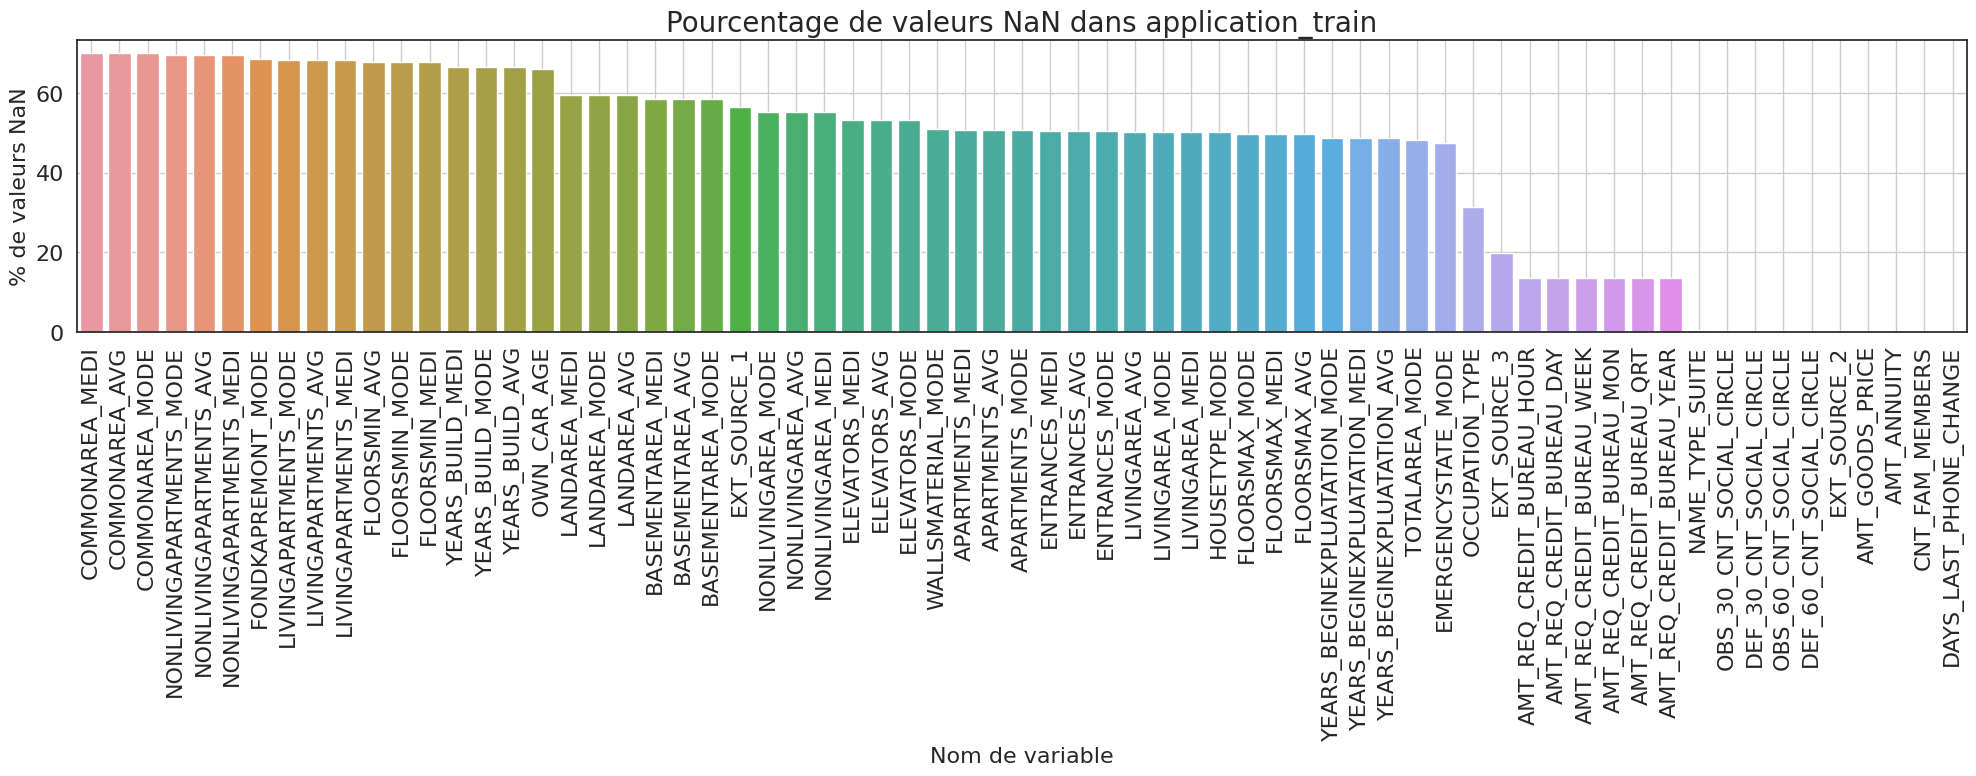

In [15]:
# Réprésentation visuelle des valeurs manquantes
df_nan = eda.nan_df_create(application_train)
eda.plot_nan_percent(df_nan, 'application_train',
                                      grid=True)

**Distribution de la TARGET**

- Variable cible :
    - 1 : demandeur ayant des difficultés de paiement : il/elle a eu un retard de paiement de plus de X jours sur au moins une des Y premières échéances du prêt dans notre échantillon
    - 0 : tous les autres cas.)
- En résumé :
    - **0** : non-défaillant,
    - **1** : défaillant.

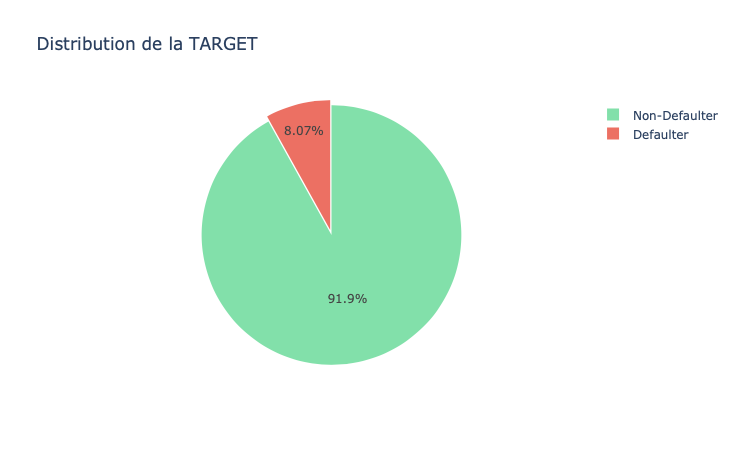

In [16]:
target_distribution = application_train.TARGET.value_counts()
labels = ['Non-Defaulter', 'Defaulter']
colors = ["#82E0AA", "#EC7063"]

fig = go.Figure(data=[go.Pie(values=target_distribution, labels=labels,
                             textinfo='percent', pull=[0, 0.04],
                             marker=dict(colors=colors))],
                layout=go.Layout(title='Distribution de la TARGET'))

fig.show()

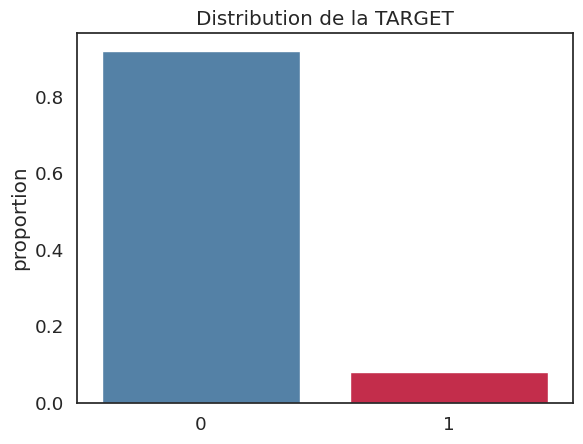

In [17]:
# Distribution de la Target
sns.barplot(x=[0, 1],
            y=application_train['TARGET'].value_counts(normalize=True),
            palette=['SteelBlue', 'crimson'])
plt.title('Distribution de la TARGET')
plt.show()

**Bilan** :
***
- D'après la **distribution de la variable cible** une chose que nous pouvons rapidement remarquer est le **déséquilibre des données**. 
- Il n'y a que 8,07% du total des prêts qui ont été mis en défaut. Cela signifie que les **défaillants** constituent la **classe minoritaire**.
- D'un autre côté, il y a 91,9% de prêts qui n'ont pas été en défaut. Ainsi, les **Non-Défaillants** seront notre **classe majoritaire**.
- Les défaillants se sont vus attribuer une variable cible de 1 et les non-défaillants une variable cible de 0.
- Pour les ensembles de données déséquilibrés, lors de la construction du **modèle**, nous ne pouvons **pas alimenter les données telles quelles à certains algorithmes**, qui sont **sensibles au déséquilibre**.
- Il en va de même pour les mesures de performance. Pour un tel jeu de données, la **précision** n'est généralement **pas la bonne mesure**, car elle est généralement **biaisée en faveur de la classe majoritaire**. Nous pouvons **utiliser d'autres métriques** telles que le **score ROC-AUC**, la **perte logarithmique**, le **score F1**, **la matrice de confusion** pour une meilleure évaluation du modèle.
- Une autre chose importante à noter ici est qu'il y a très peu de personnes qui font réellement défaut, et elles ont tendance à montrer une sorte de comportement différent. Ainsi, dans de tels cas de détection de fraude, de défaut de paiement et de détection d'anomalie, nous devons également nous concentrer sur les **valeurs aberrantes**, et nous ne pouvons **pas les supprimer**, car elles pourraient être le **facteur de différenciation entre les personnes en défaut de paiement et celles qui ne le sont pas**.

In [18]:
# Liste des variables qualitatives
cols_cat = \
    application_train.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

**NAME_CONTRACT_TYPE**
- Cette variable contient des informations sur le type de prêt pour le demandeur donné :
    - prêt cash,
    - ou prêt revolving. 
- Selon la documentation fournie par Home Credit, il existe deux types de prêts, à savoir les prêts renouvelables et les prêts en espèces.

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'NAME_CONTRACT_TYPE' sont :
['Cash loans' 'Revolving loans']
-------------------------------------------------------------------------------


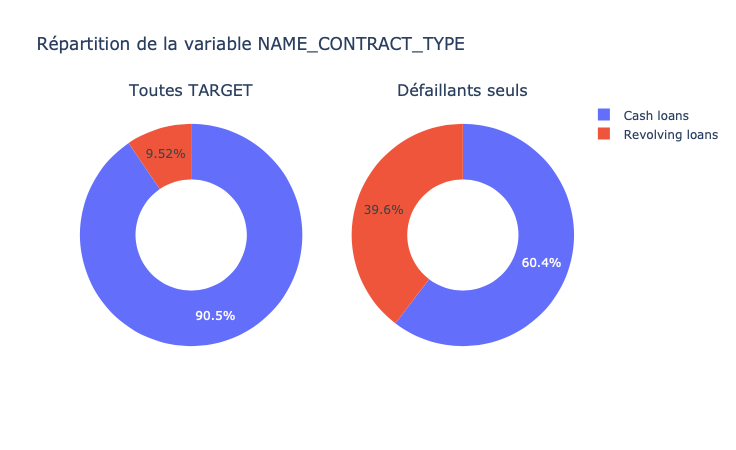

In [19]:
# Let us first see the unique categories of 'NAME_CONTRACT_TYPE'
eda.print_unique_categories(application_train,
                                             'NAME_CONTRACT_TYPE')

# Plotting the Pie Plot for the column
eda.plot_categorical_variables_pie(application_train,
                                                    'NAME_CONTRACT_TYPE',
                                                    hole=0.5)
# Note : en survol sur la répartition des défaillants seuls : 
# c'est le pourcentage des défaillants par catégorie sur le nombre total
# de cette catégorie.

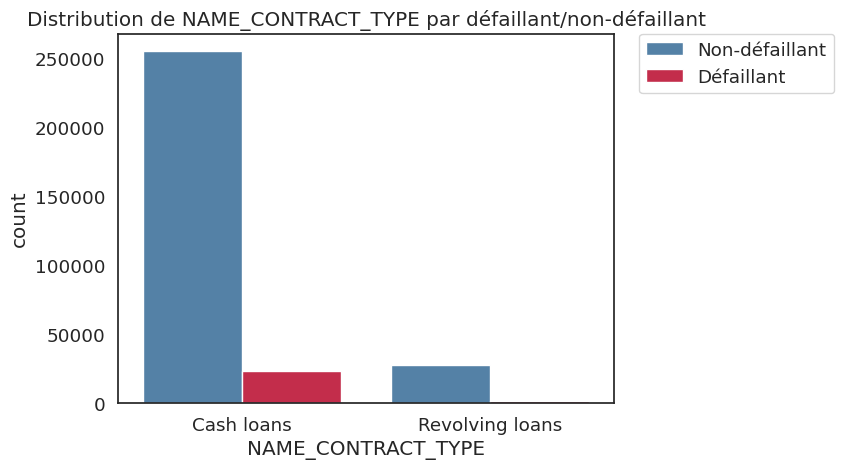

In [20]:
# Distribution par défaillants/non-défaillants
eda.plot_barplot_comp_target(application_train,
                                              'NAME_CONTRACT_TYPE')

**CODE_GENDER**

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'CODE_GENDER' sont :
['M' 'F' 'XNA']
-------------------------------------------------------------------------------
Répartition dans chaque catégorie :
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
-------------------------------------------------------------------------------


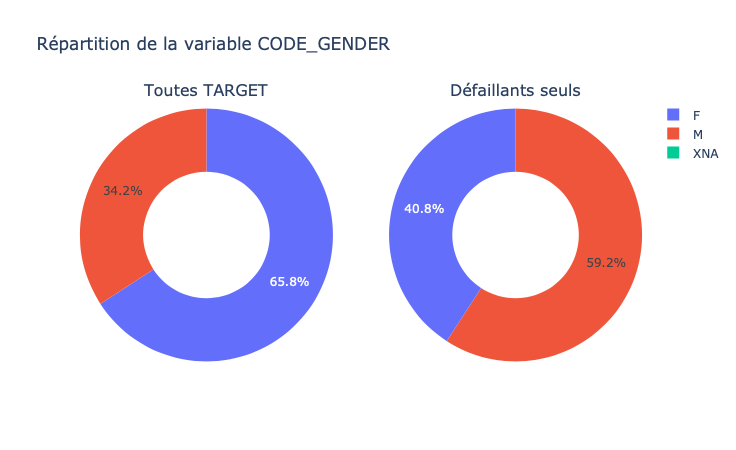

In [21]:
# Let us first see the unique categories of 'CODE_GENDER'
eda.print_unique_categories(application_train,
                                             'CODE_GENDER',
                                             show_counts=True)

# Plotting the Pie Plot for the Column
eda.plot_categorical_variables_pie(application_train,
                                                    'CODE_GENDER',
                                                    hole=0.5)

- Cette variable contient des informations sur le sexe du client/demandeur :
    - **F** pour **Féminin**,
    - **M** pour **Masculin**.

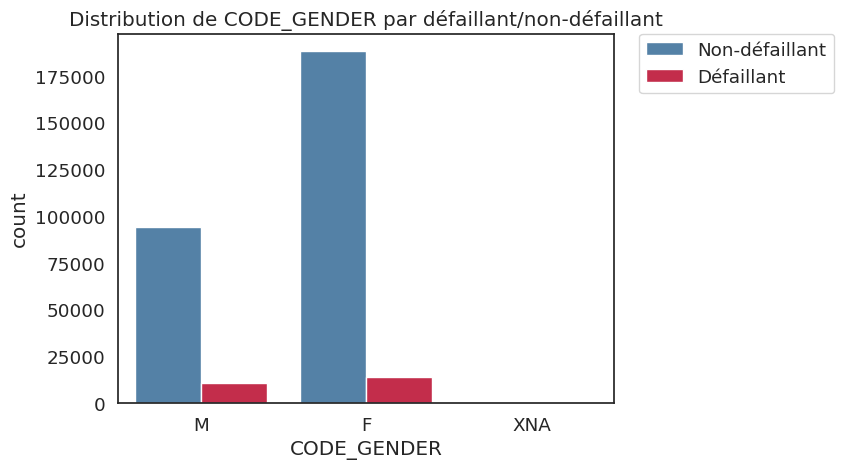

In [22]:
# Distribution par défaillants/non-défaillants
eda.plot_barplot_comp_target(application_train,
                                              'CODE_GENDER')

**Bilan** :

La distribution de la variable CODE_GENDER semble intéressante.

Voici quelques points de discussion :

- Le premier point à observer est qu'il y a 4 lignes dans la table application_train qui ont des genres 'XNA', ce qui n'a pas beaucoup de sens, et peut être compté comme des valeurs NaN. Puisqu'elles ne sont que 4 et qu'elles appartiennent à la catégorie des non-défaillants. Nous pouvons donc éliminer ces lignes sans trop d'hésitation.

- Dans le sous-graphe 1, nous voyons que pour l'ensemble de données donné, il y a plus de candidats féminins (65,8%) que de candidats masculins (34,2%).

- Cependant, contrairement au nombre de candidats féminins, le deuxième graphique montre que les candidats masculins ont tendance à être plus souvent défaillants (10,14%) que les candidats féminins (7%).

Ainsi, on peut dire que les hommes ont plus tendance à ne pas rembourser leurs dettes que les femmes, selon l'ensemble des données.

**Variable FLAG_EMP_PHONE**

Cette variable est une variable booléenne, qui indique si le demandeur a fourni son numéro de téléphone professionnel ou non :

- 1 pour Oui,
- et 0 signifie Non.

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'FLAG_EMP_PHONE' sont :
[1 0]
-------------------------------------------------------------------------------


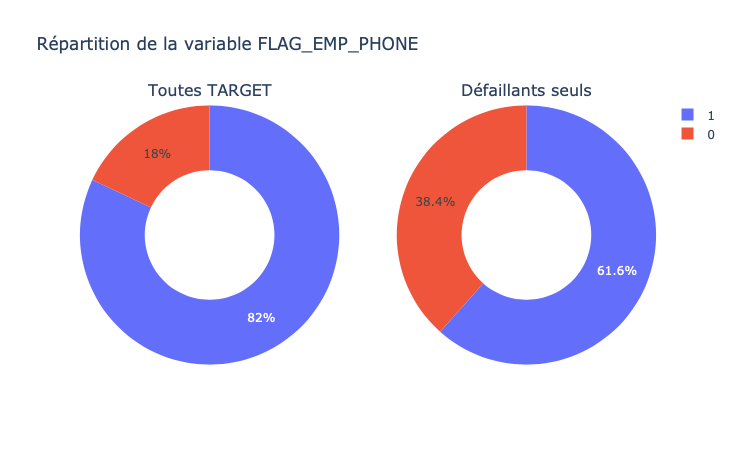

In [23]:
# Let us first see the unique categories of 'FLAG_EMP_PHONE'
eda.print_unique_categories(application_train,
                                             'FLAG_EMP_PHONE')

# Plotting the Pie Plot for the Column
eda. \
    plot_categorical_variables_pie(application_train,
                                   column_name='FLAG_EMP_PHONE',
                                   hole=0.5)

**Bilan** :

Cette variable contient deux catégories, à savoir si le demandeur a fourni ou non son numéro de téléphone professionnel lors du processus d'inscription/demande.

- Dans le premier sous-graphe, nous constatons que la plupart des demandeurs fournissent leur numéro de téléphone professionnel (82%) et que seulement 18% ne l'ont pas fourni.

- On peut également constater que la tendance des personnes en défaillance de paiement qui fournissent leur numéro de téléphone professionnel est plus importante que ceux qui ne sont pas défaillant. Cette caractéristique pourrait être attribuée au fait que les personnes en défaut de paiement fournissent leur numéro de téléphone professionnel afin de ne pas être dérangées sur leur téléphone personnel.

**Variable REGION_RATING_CLIENT_W_CITY**

- Notre évaluation de la région où vit le demandeur en tenant compte de la ville (1 ou 2 ou 3).

- Cette variable correspond à la note attribuée par le Crédit immobilier à la région de chaque demandeur sur la base des enquêtes qu'il a pu réaliser. Cette notation tient également compte de la ville dans laquelle vit le demandeur.
- La prise en compte de la ville est importante, car même si certaines régions ont une bonne note dans une ville particulière, mais que cette ville n'a pas une note élevée, le demandeur se verra attribuer une note moyenne et non une note élevée.
- Les notes sont comprises entre 1 et 3.

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'REGION_RATING_CLIENT_W_CITY' sont :
[2 1 3]
-------------------------------------------------------------------------------


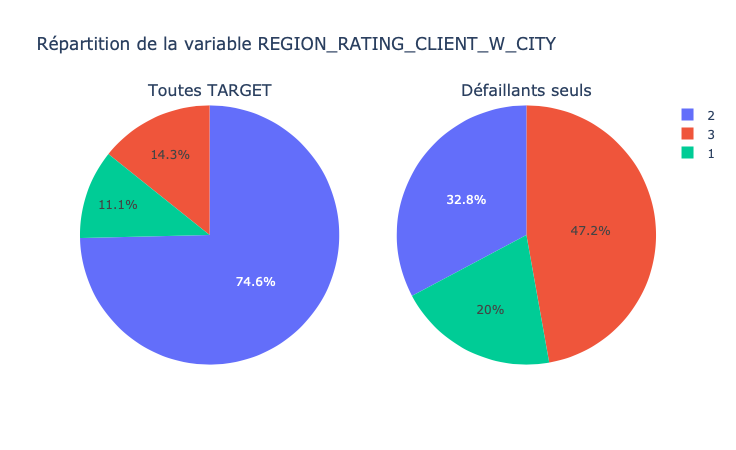

In [24]:
# Let us first see the unique categories of 'REGION_RATING_CLIENT_W_CITY'
eda.print_unique_categories(application_train,
                                             'REGION_RATING_CLIENT_W_CITY')

# Plotting the Pie Plot for the Column
eda. \
    plot_categorical_variables_pie(application_train,
                                   column_name='REGION_RATING_CLIENT_W_CITY')

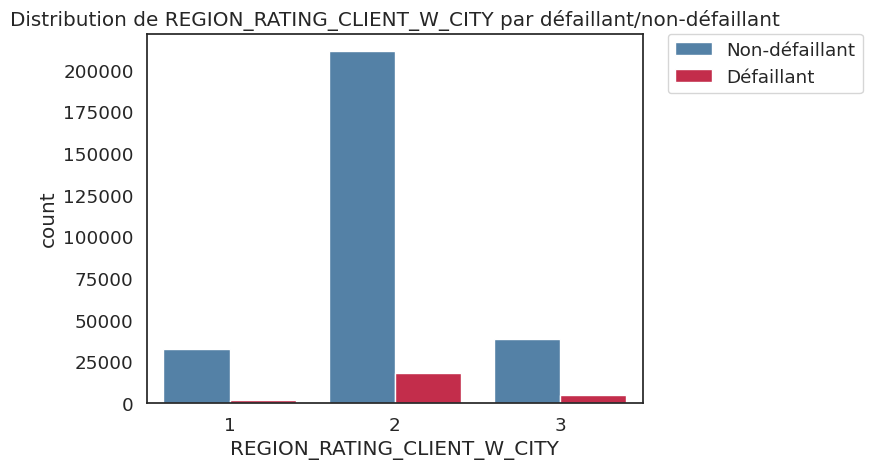

In [25]:
# Distribution par défaillants/non-défaillants
eda.plot_barplot_comp_target(application_train,
                                              'REGION_RATING_CLIENT_W_CITY')

**Bilan** :

Les graphiques ci-dessus nous permettent de tirer les conclusions suivantes :

- Dans le premier sous-graphe, nous constatons que :
    - la plupart des demandeur (74,6 %) ont un indice de région de 2. Il s'agit de la valeur moyenne qui correspond à la plupart des demandeurs.
    - très peu de demandeurs ont un classement régional de 1 (seulement 11,1%) et certains ont un classement de 3 (14,3%).
- Parmi les défaillants, on constate que :
    - la plupart d'entre eux ont un classement régional de 3 (11,4% cf survol sur le schéma, pourcentage parmi les notes de chaque catégorie), ce qui est comparativement plus élevé que les deux autres classements, c'est-à-dire que les demandeurs ayant un classement de 1 ont un pourcentage de défaillance de seulement 4,84% (cf survol) et ceux ayant un classement de 2 ont un pourcentage de 7,92% (cf survol).
    
Cela montre que la note 3 pourrait être un attribut important pour prendre une décision sur les caractéristiques de défaillance.

**Variable NAME_EDUCATION_TYPE**

Cette variable décrit/énumére le niveau d'éducation le plus élevée obtenu par le demandeur.

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'NAME_EDUCATION_TYPE' sont :
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
-------------------------------------------------------------------------------
Répartition dans chaque catégorie :
NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64
-------------------------------------------------------------------------------
Nombre de catégories uniques pour NAME_EDUCATION_TYPE = 5


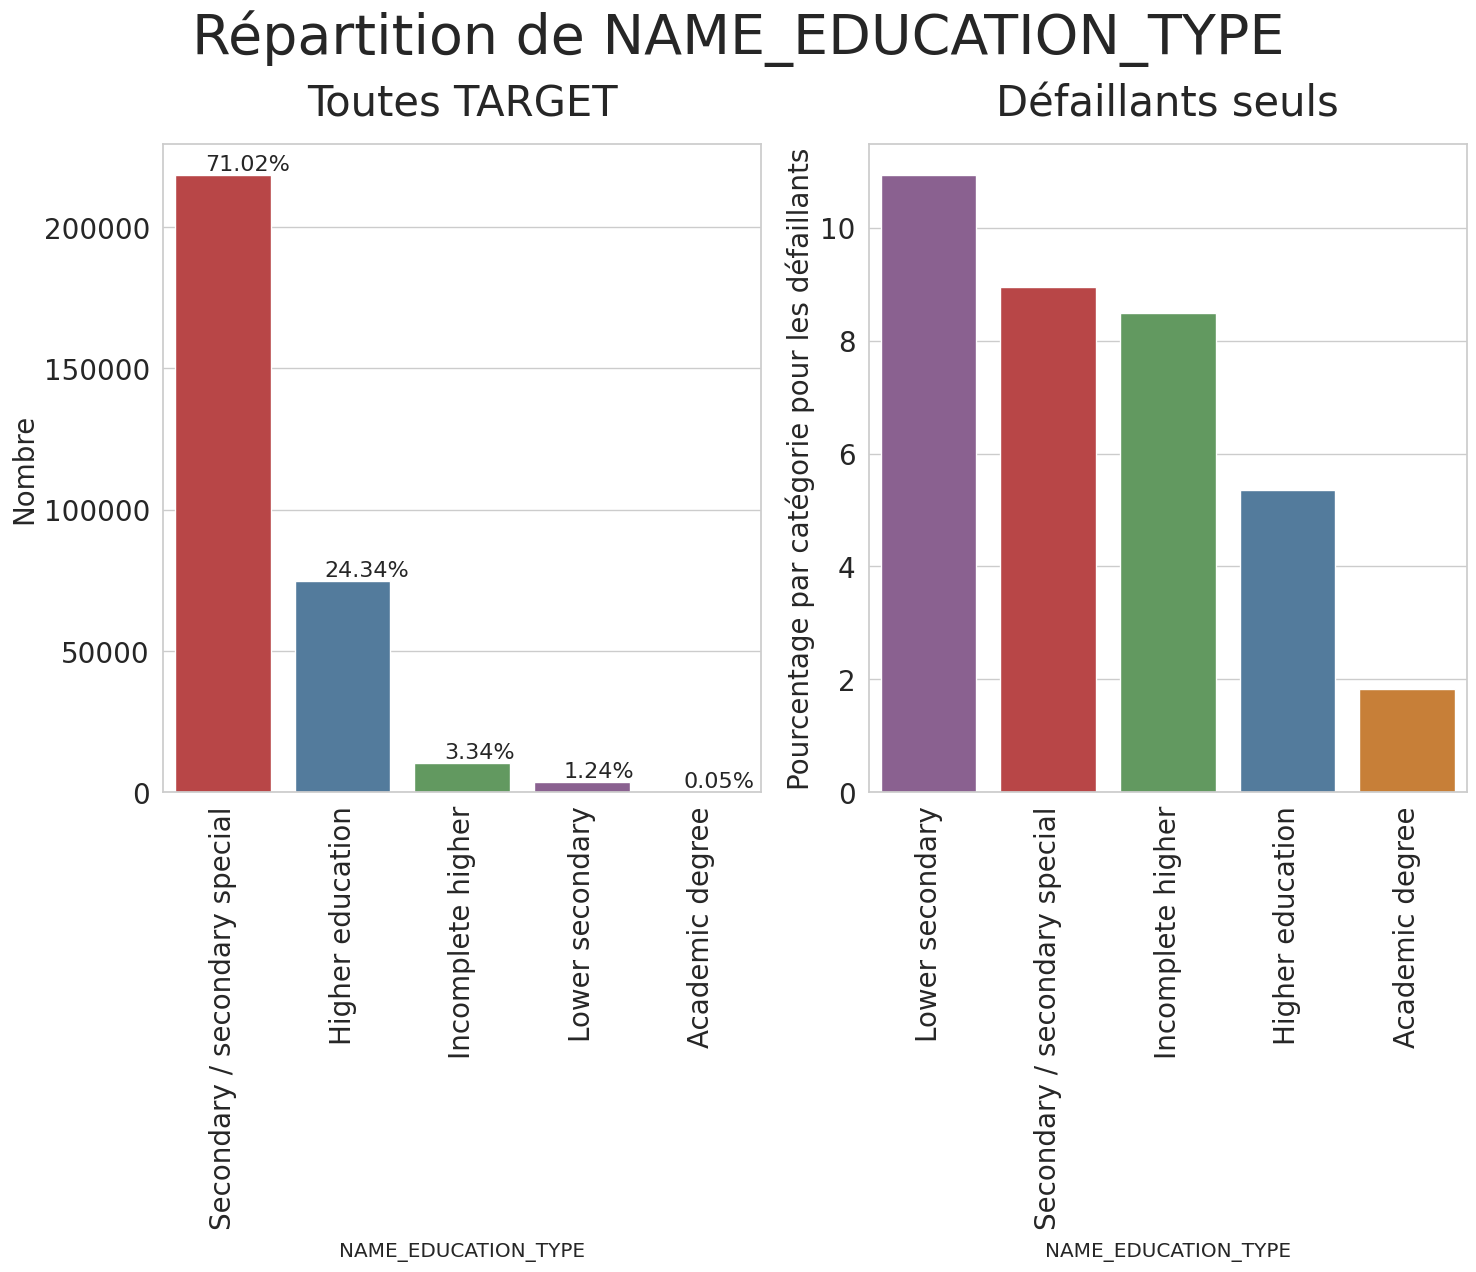

In [26]:
# Let us first see the unique categories of 'NAME_EDUCATION_TYPE'
eda.print_unique_categories(application_train,
                                             'NAME_EDUCATION_TYPE',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda. \
    plot_categorical_variables_bar(application_train,
                                   column_name='NAME_EDUCATION_TYPE',
                                   figsize=(15, 13), rotation=90,
                                   horizontal_adjust=0.25,
                                   fontsize_percent=16,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20'],
                                   palette2=['#905998', '#cb3335',
                                             '#59a257', '#477ca8',
                                             '#df7f20'])

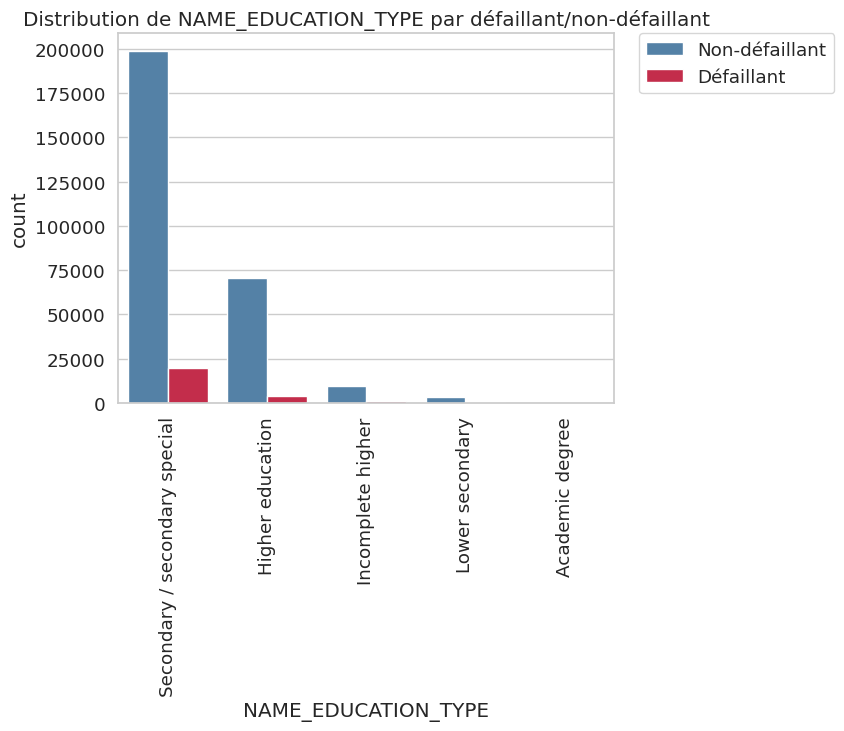

In [27]:
# Distribution par défaillants/non-défaillants
eda.plot_barplot_comp_target(application_train,
                                              'NAME_EDUCATION_TYPE',
                                              rotation=90)

**Bilan** :

En regardant les graphiques ci-dessus, nous pouvons conclure ce qui suit :

- Environ 71% des personnes n'ont fait que des études secondaires ou des études secondaires spéciales et 24,34% des demandeurs ont fait des études supérieures. Cela suggère que la plupart des demandeurs/emprunteurs n'ont pas un niveau d'éducation élevé.
- Le deuxième graphique montre que :
    - les personnes qui ont fait leurs études jusqu'au premier cycle du secondaire seulement, ont les taux de défaillance les plus élevés, les études dans le cycle secondaire et le dans le cycle supérieur incomplet ayant des tendances similaires.
    - Le groupe des personnes ayant fait des études supérieures a une tendance à la défaillance comparativement plus faible, ce qui est aussi logique.
    - De même, les personnes titulaires d'un diplôme universitaire présentent le taux de défaillance le plus faible. Cependant, le groupe des titulaires d'un diplôme universitaire est très peu nombreux, ce qui peut ne pas être très utile.

**Variable OCCUPATION_TYPE**

Cette variable indique la catégorie socio-professionnelle du demandeur.
Il peut s'agir d'une variable très importante qui pourrait décrire les variables de défaillance d'un demandeur.

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'OCCUPATION_TYPE' sont :
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
-------------------------------------------------------------------------------
Nombre de catégories uniques pour OCCUPATION_TYPE = 19


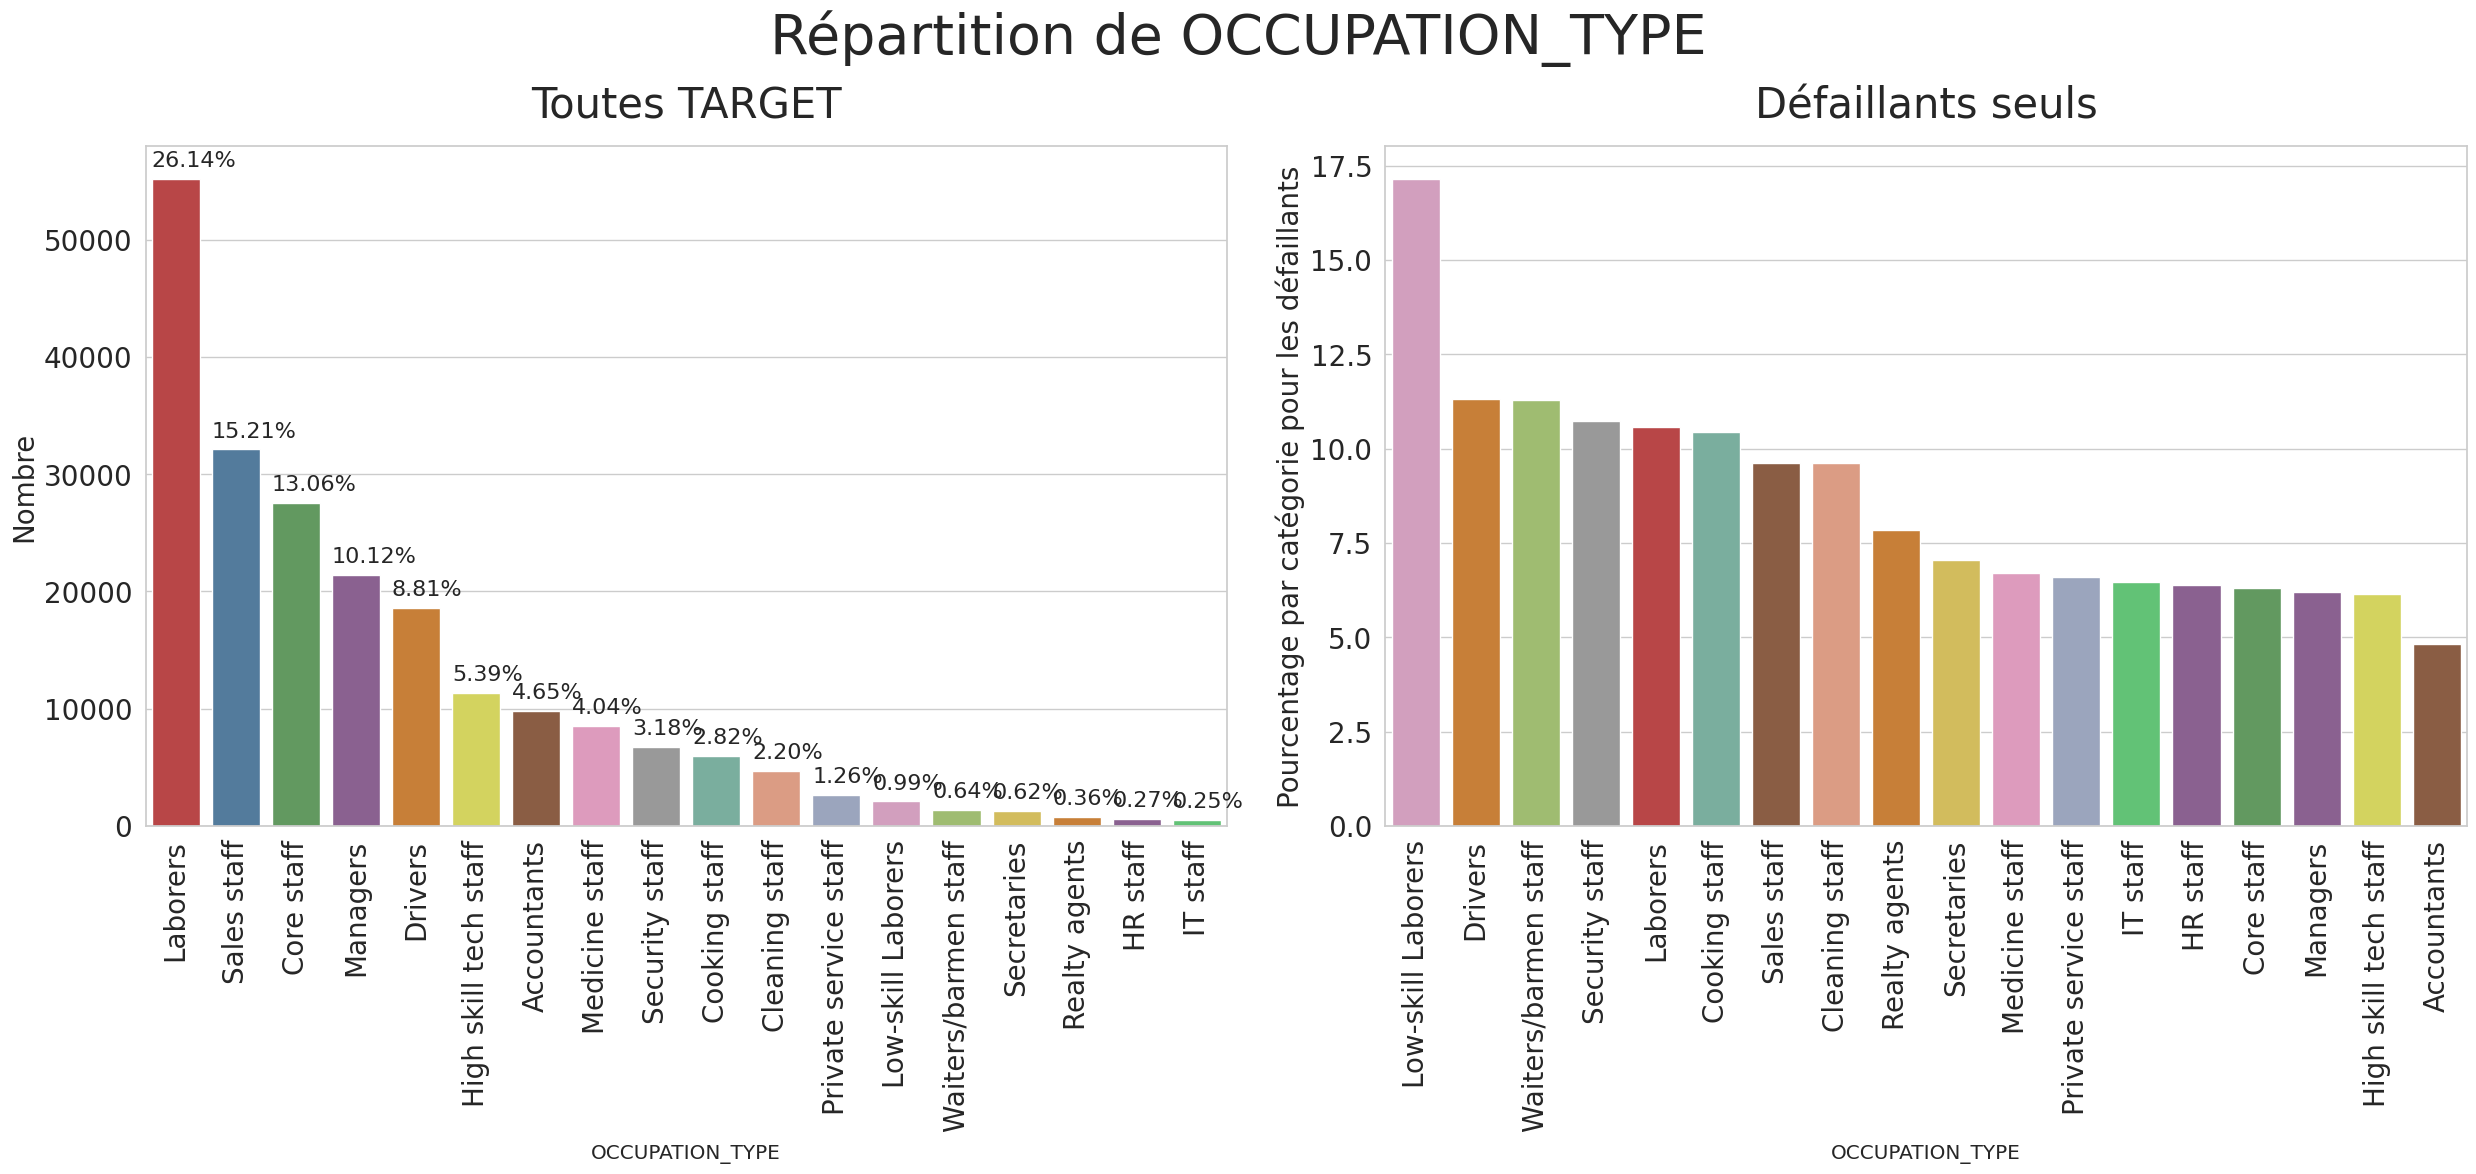

In [28]:
# Let us first see the unique categories of 'OCCUPATION_TYPE'
eda.print_unique_categories(application_train,
                                             'OCCUPATION_TYPE')

# Plotting the Bar Plot for the Column
eda. \
    plot_categorical_variables_bar(application_train,
                                   column_name='OCCUPATION_TYPE',
                                   figsize=(25, 12), rotation=90,
                                   fontsize_percent=16,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38', '#e890be',
                                             '#999999', '#72b6a1',
                                             '#e99675', '#95a3c3',
                                             '#db96c0', '#a2c865',
                                             '#e5c949', '#df7f20',
                                             '#905998', '#52d26c'],
                                   palette2=['#db96c0', '#df7f20',
                                             '#a2c865', '#999999',
                                             '#cb3335', '#72b6a1',
                                             '#965a38', '#e99675',
                                             '#df7f20', '#e5c949',
                                             '#e890be', '#95a3c3',
                                             '#52d26c', '#905998',
                                             '#59a257', '#905998',
                                             '#e6e64c', '#965a38'])

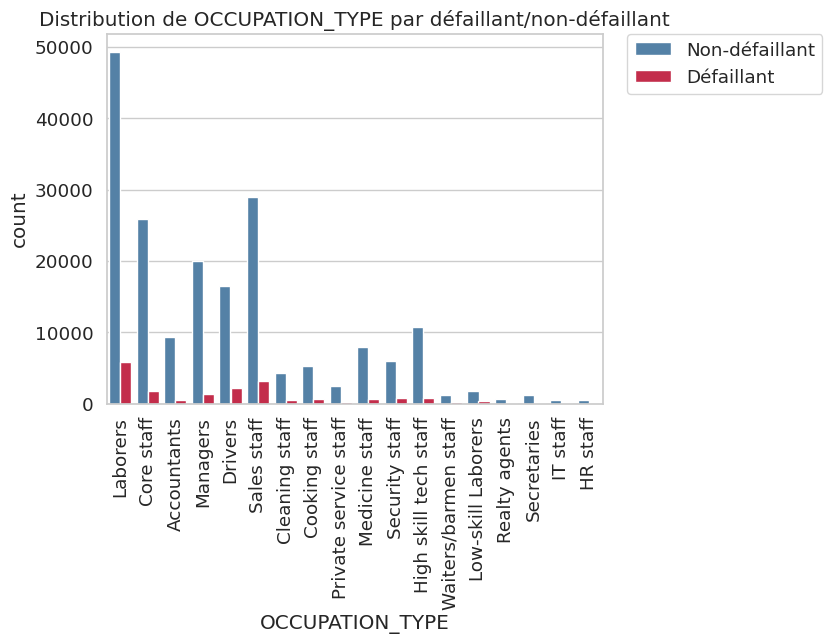

In [29]:
# Distribution par défaillants/non-défaillants
eda.plot_barplot_comp_target(application_train,
                                              'OCCUPATION_TYPE',
                                              rotation=90)

**Bilan** :

À partir des graphiques sur la catégorie socio-professionnelle, nous pouvons tirer les observations suivantes :

- Parmi les demandeurs, la catégorie socio-professionnelle la plus courante est celle des ouvriers, qui représente près de 26 % des demandes. - La deuxième profession la plus fréquente est celle des responsables de vente, suivie par le personnel administratif publique et exécutif et les managers.
- Le taux de défaillance des travailleurs peu qualifiés est le plus élevé de tous les catégories (~17,5 %). Viennent ensuite les chauffeurs, les serveurs, le personnel de sécurité, les ouvriers, le personnel de cuisine, etc. Tous ces emplois sont des emplois de bas niveau. Cela montre que les personnes occupant des emplois de bas niveau ont tendance à avoir un taux de défaillance plus élevé.
- Le taux de défaillance le plus faible se trouve parmi les comptables, le personnel administratif et exécutif publique, les gestionnaires, le personnel technique hautement qualifié, le personnel des RH, etc. qui sont des emplois de niveau moyen à élevé.
- On peut donc conclure que les travailleurs des emplois de bas niveau ont tendance à avoir un taux de défaillance plus élevé que ceux des emplois de niveau moyen à élevé.

**Variable ORGANIZATION_TYPE**

Tout comme la catégorie socio-professionnelle, le secteur d'activité auquel le demandeur appartient pourrait également être une caractéristique importante pour prédire le risque de défaillance de ce demandeur.

Nombre de catégorie de la variable ORGANIZATION_TYPE = 58


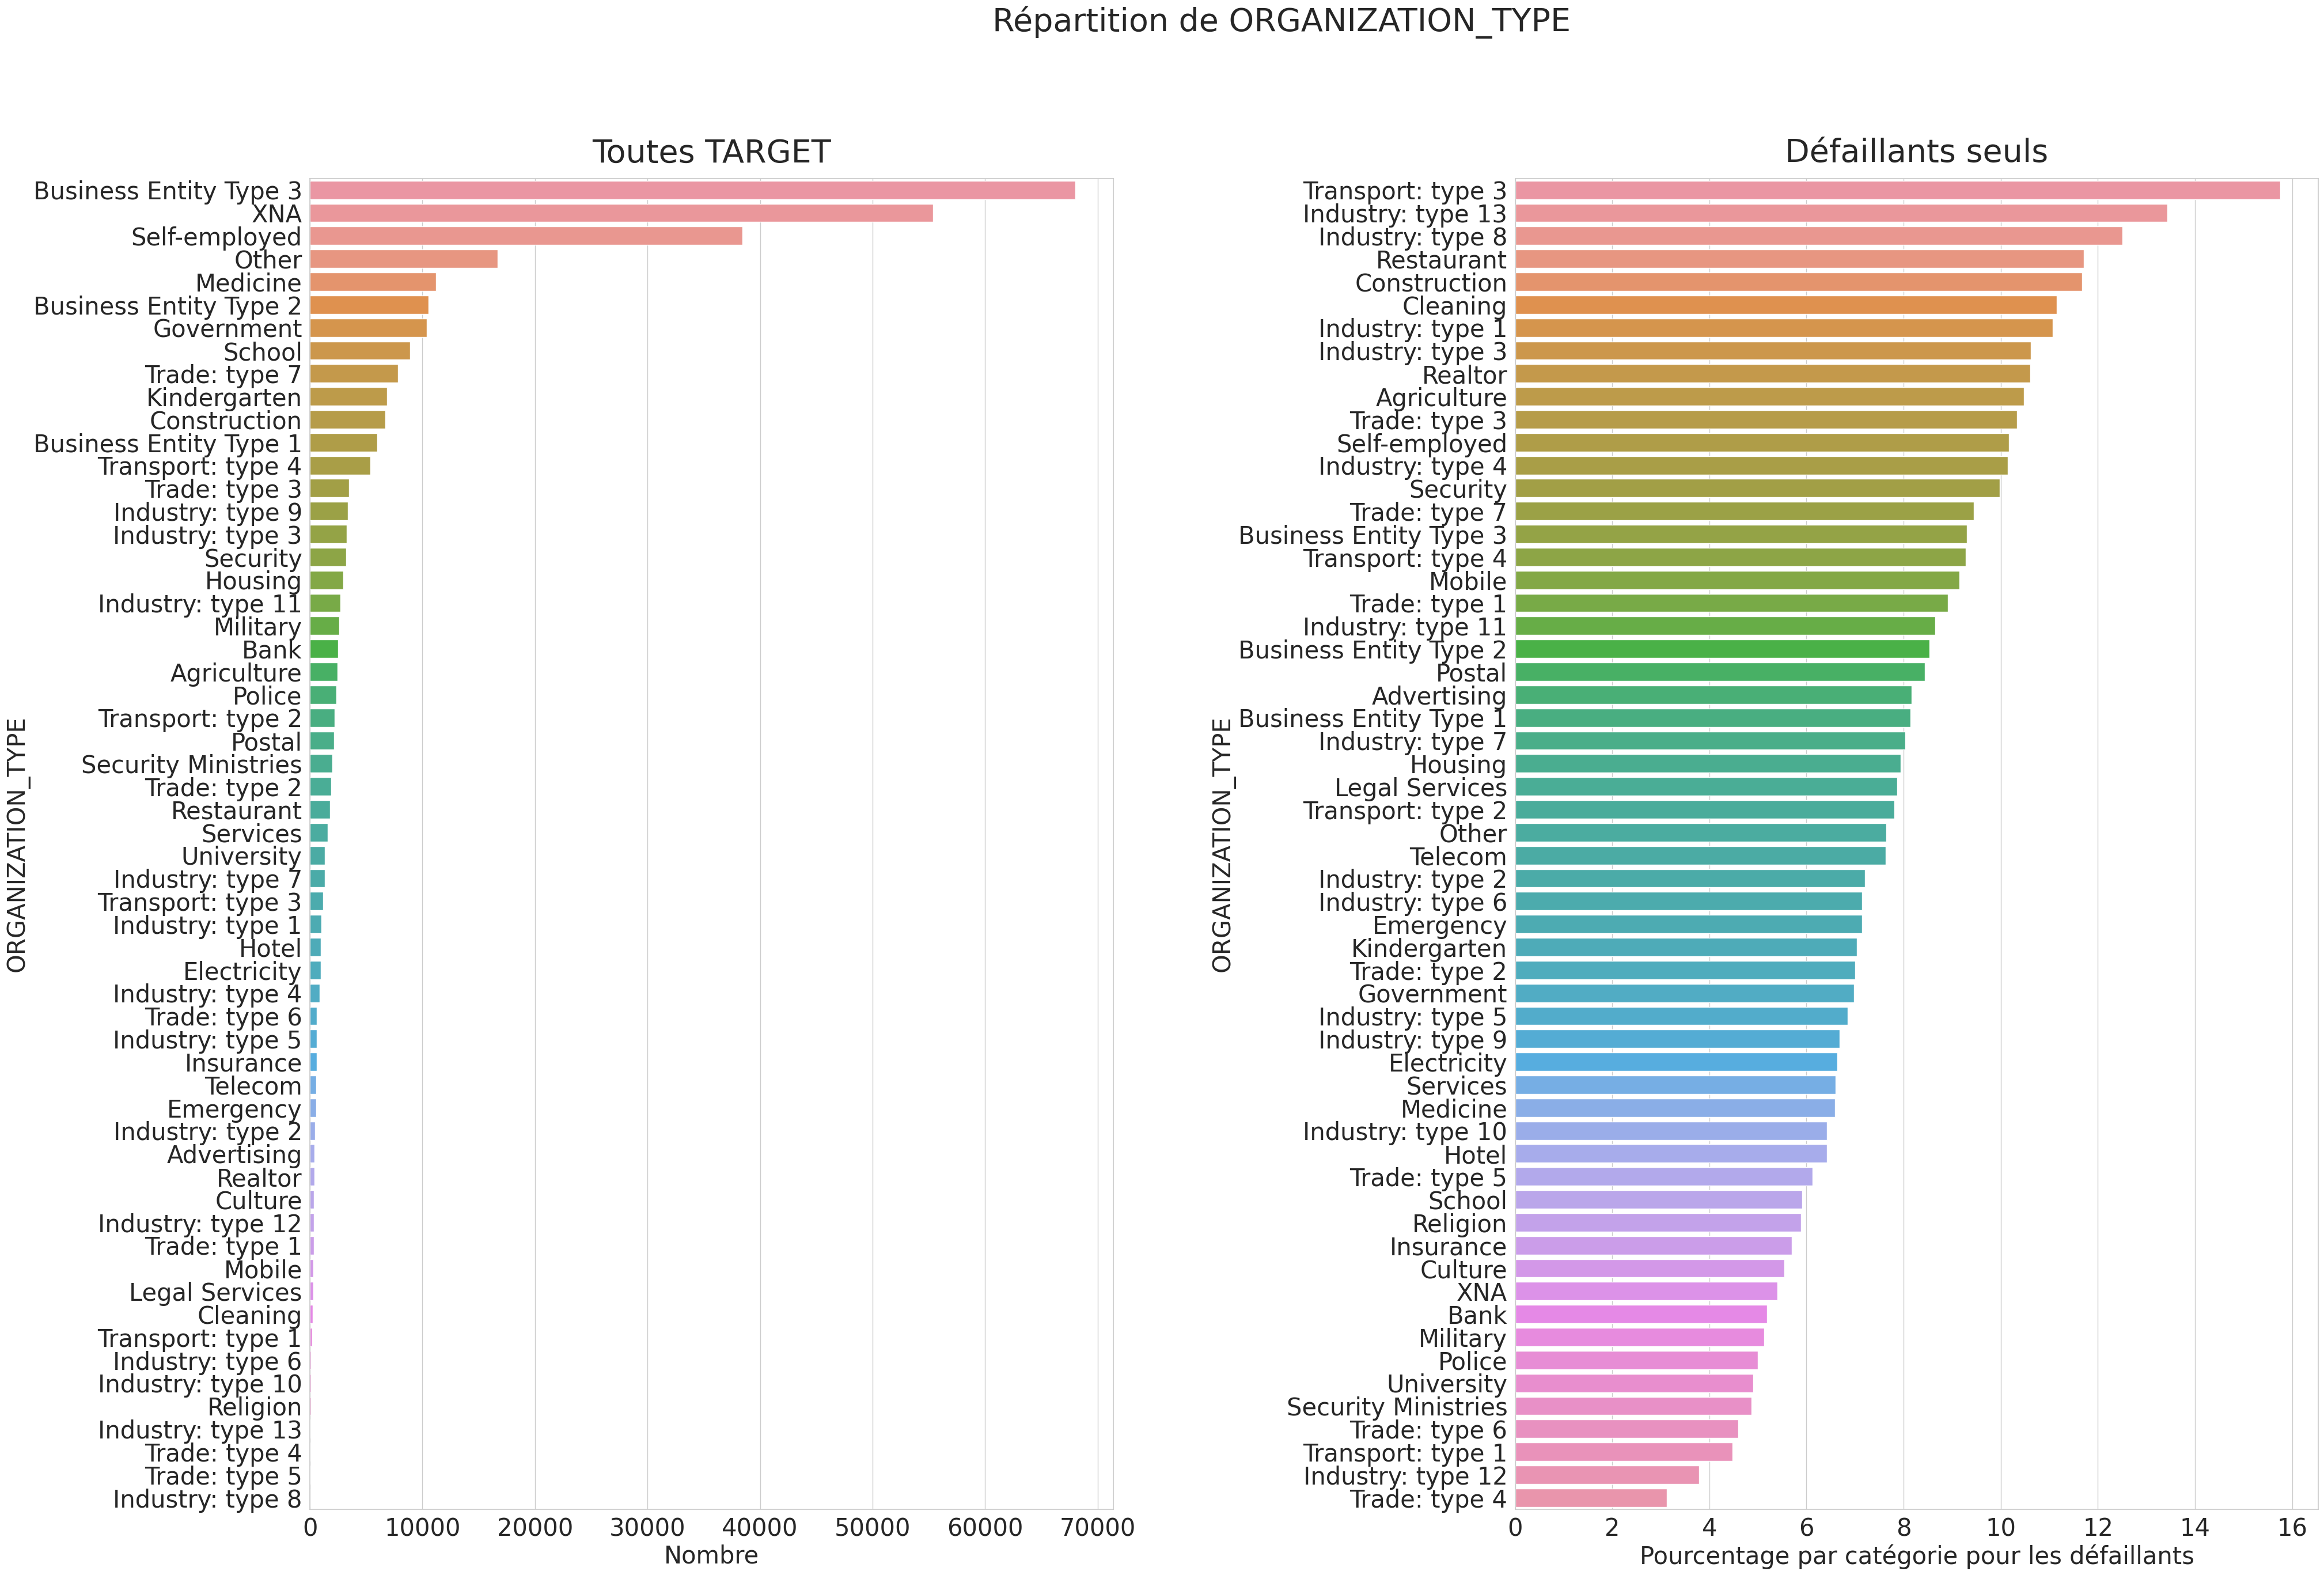

In [30]:
print(f"Nombre de catégorie de la variable ORGANIZATION_TYPE = \
{len(application_train.ORGANIZATION_TYPE.unique())}")

plt.figure(figsize=(45, 30))
sns.set(style='whitegrid', font_scale=1.2)
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
count_organization = application_train.ORGANIZATION_TYPE.value_counts() \
    .sort_values(ascending=False)
sns.barplot(x=count_organization, y=count_organization.index)
plt.title('Toutes TARGET', pad=20, fontsize=40)
plt.xlabel('Nombre', fontsize=30)
plt.ylabel('ORGANIZATION_TYPE', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.subplot(1, 2, 2)
percentage_default_per_organization = \
    application_train[application_train.TARGET == 1].ORGANIZATION_TYPE. \
    value_counts() * 100 / count_organization
percentage_default_per_organization = \
    percentage_default_per_organization.dropna(). \
    sort_values(ascending=False)
sns.barplot(x=percentage_default_per_organization,
            y=percentage_default_per_organization.index)
plt.title('Défaillants seuls', pad=20, fontsize=40)
plt.xlabel('Pourcentage par catégorie pour les défaillants', fontsize=30)
plt.ylabel('ORGANIZATION_TYPE', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.suptitle(f'Répartition de ORGANIZATION_TYPE', fontsize=40)
plt.show()

**Bilan** :

Le demandeur appartient à un grand nombre de types d'organisations, 58 pour être précis.

Les graphiques ci-dessus donnent les observations suivantes :

- Le premier graphique montre que la plupart des demandeurs travaillent dans des organisations de type "entité commercialy Type3", "XNA" ou "Travailleurs indépendants". Le type d'organisation "XNA" pourrait probablement désigner une organisation non classée en TYPE.
- Dans le deuxième graphique, nous remarquons que les candidats appartenant à "Transport : type 3" ont la plus forte tendance à la défaillance par rapport aux autres. Ils sont suivis par les organisations de type : "Industrie : type 13", "Industrie : type 8", "Restaurant", "Construction"...
- Les organisations qui affichent les taux de défaillance les plus bas sont "Commerce : type 4", "Industrie : type 12"...

Ces numéros de type pourraient également en dire plus sur l'organisation, cependant, nous n'avons pas d'informations à ce sujet, donc nous nous en tiendrons à la dénomination qui nous a été fournie.

**Variable NAME_HOUSING_TYPE**
Quelle est la situation du demandeur en matière de logement (location, logement chez les parents...) ?

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'NAME_HOUSING_TYPE' sont :
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
-------------------------------------------------------------------------------
Répartition dans chaque catégorie :
NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64
-------------------------------------------------------------------------------
Nombre de catégories uniques pour NAME_HOUSING_TYPE = 6


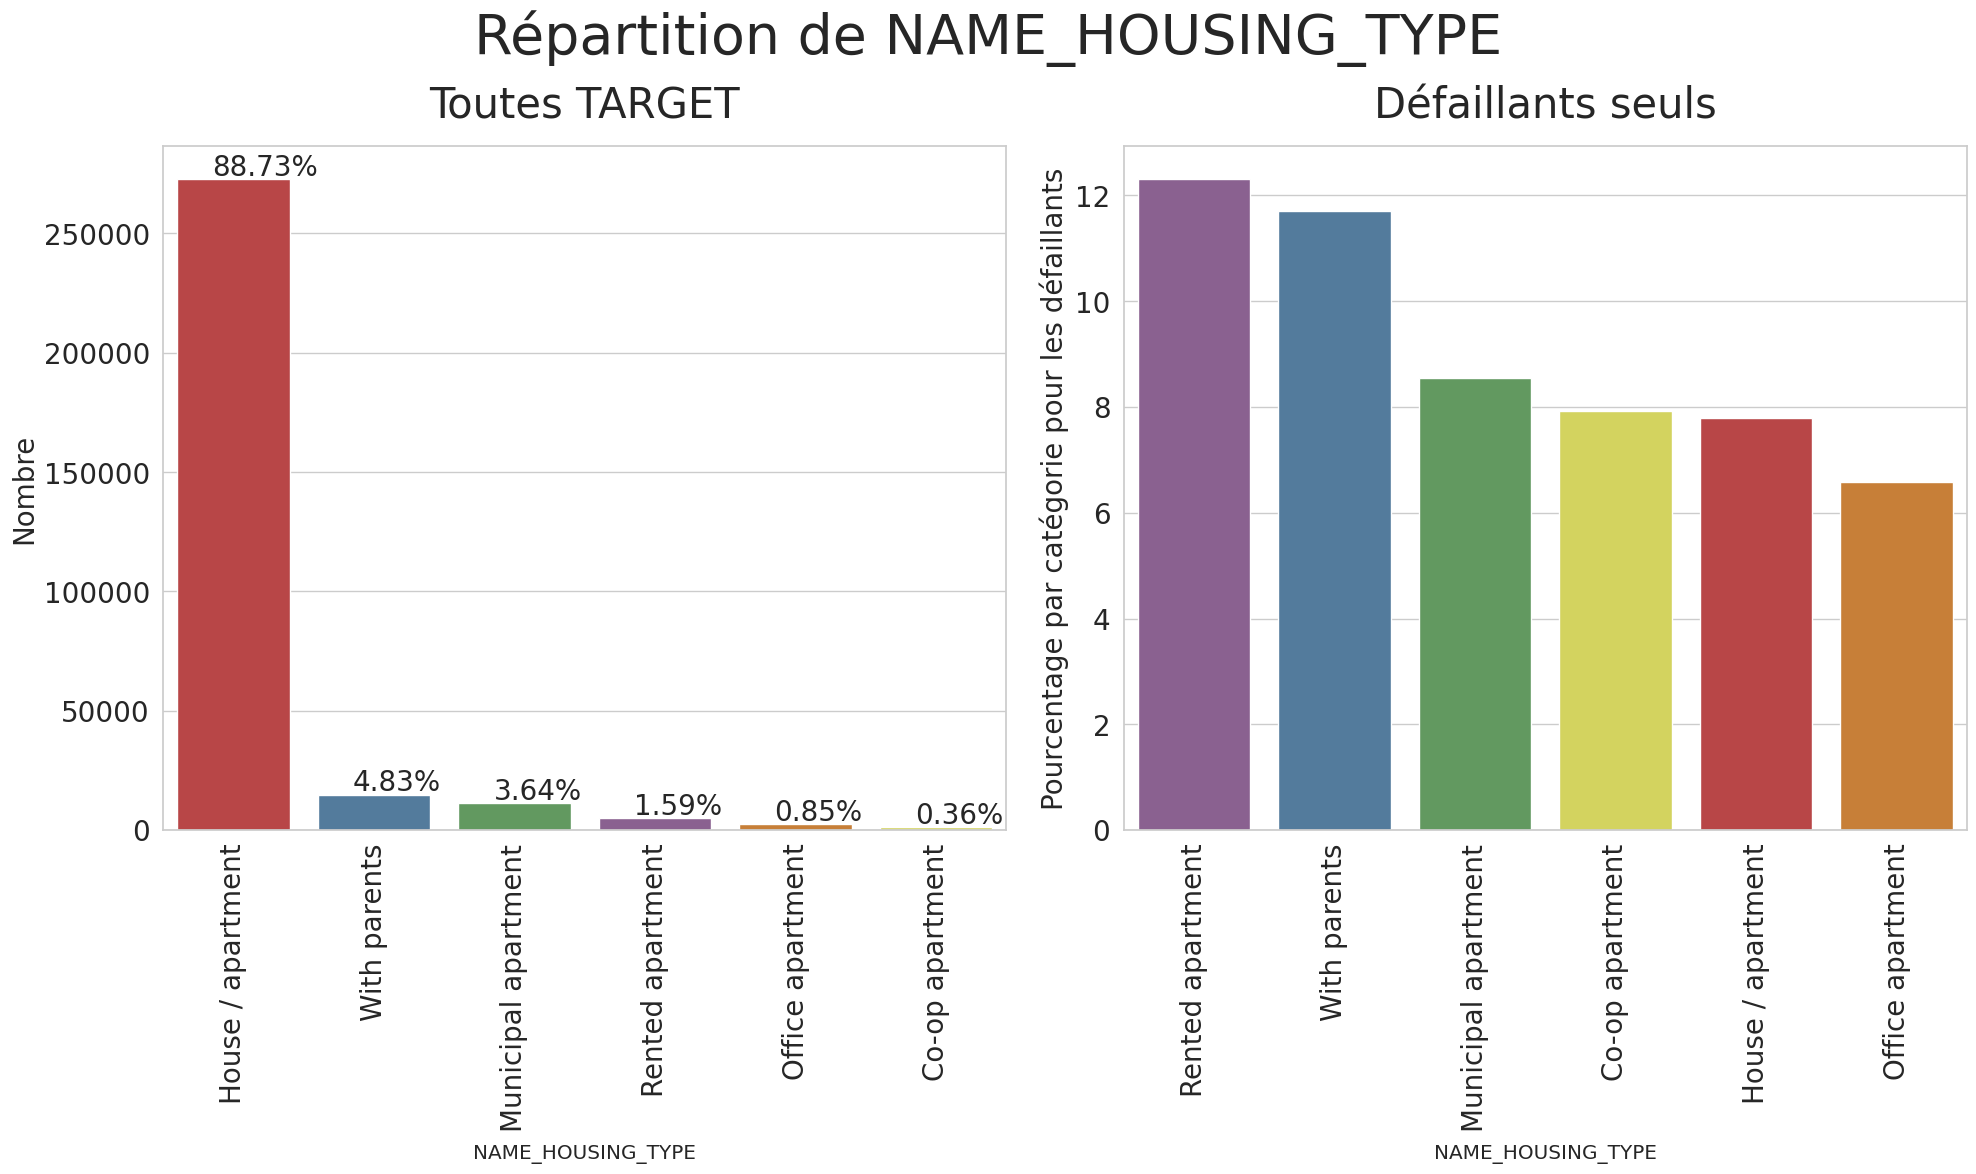

In [31]:
# Let us first see the unique categories of 'NAME_HOUSING_TYPE'
eda.print_unique_categories(application_train, 'NAME_HOUSING_TYPE',
                            show_counts=True)

# plotting the Bar Plot for the Column
eda.plot_categorical_variables_bar(application_train,
                                   column_name='NAME_HOUSING_TYPE',
                                   figsize=(20, 12),
                                   rotation=90, horizontal_adjust=0.25,
                                   fontsize_percent=20,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c'],
                                   palette2=['#905998', '#477ca8',
                                             '#59a257', '#e6e64c',
                                             '#cb3335', '#df7f20'])

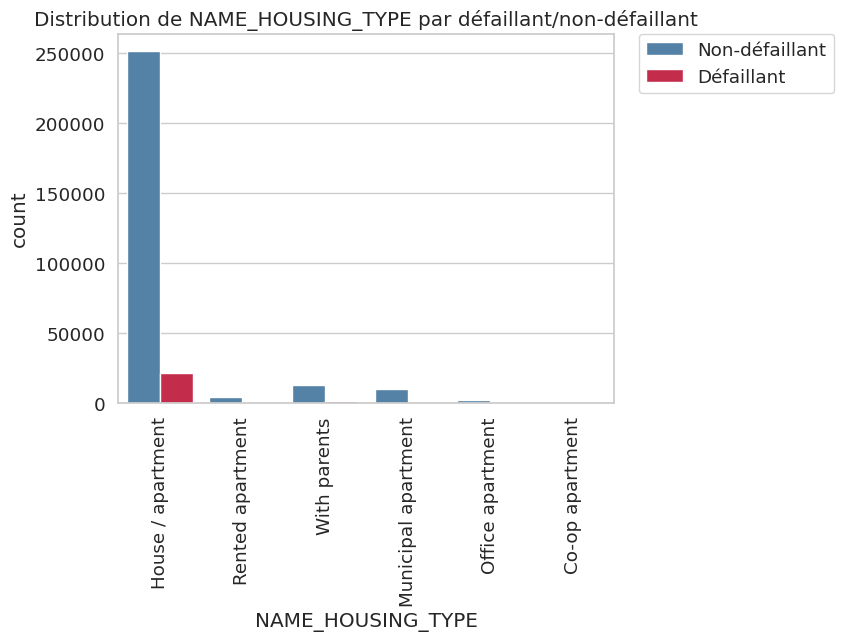

In [32]:
# Distribution par défaillants/non-défaillants
eda.plot_barplot_comp_target(application_train,
                                              'NAME_HOUSING_TYPE',
                                              rotation=90)

**Bilan** :
***
- Le premier graphique général montre :
    - que la majorité (89%)des demandeurs sont propriétaires d'une maison ou d'un appartement.
    - que 5% des demandeurs vivent chez leurs parents.
    - et les 5 autres pourcent concernent les appartements de location, municipaux ou les co-locations.
- Le second graphique, qui effectue un zoom sur les défaillants, montre que les personnes qui ont le taux de défaillance le plus élevé, font partie des 5% restant du graphique général : la majorité loue un appartement ou habitent chez leurs parents mais ne sont pas propriétaire.

La situation du logement du demandeur pourra donc avoir une influence sur la défaillance potentielle du demandeur.

**Variable NNAME_FAMILY_STATUS**
Cette variable indique la Situation familiale du demandeur (Célibataire, marié, pacsé, séparé, divorcé, veuf...).

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'NAME_FAMILY_STATUS' sont :
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
-------------------------------------------------------------------------------
Répartition dans chaque catégorie :
NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64
-------------------------------------------------------------------------------
Nombre de catégories uniques pour NAME_FAMILY_STATUS = 6


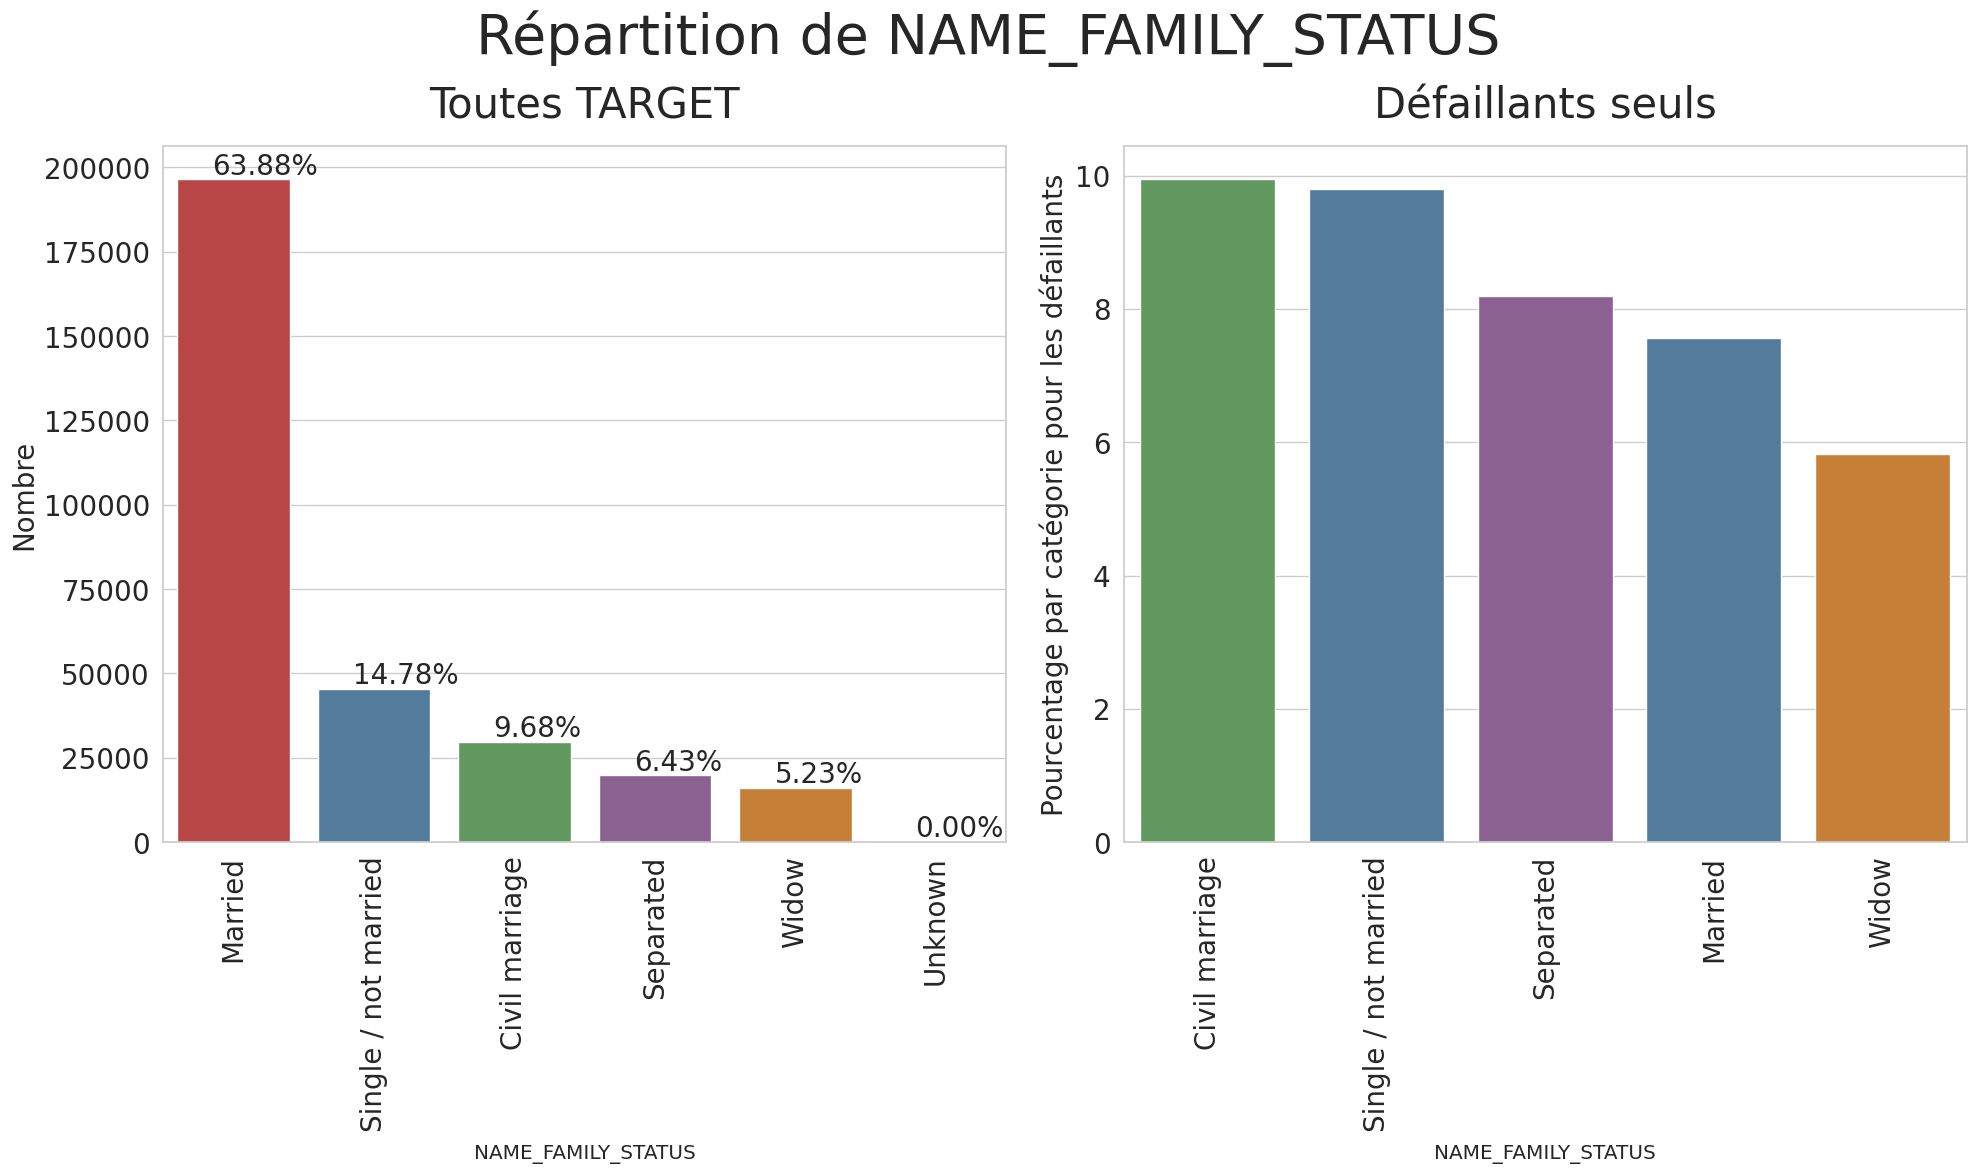

In [33]:
# Let us first see the unique categories of 'NAME_FAMILY_STATUS'
eda.print_unique_categories(application_train, 'NAME_FAMILY_STATUS',
                            show_counts=True)

# plotting the Bar Plot for the Column
eda.plot_categorical_variables_bar(application_train,
                                   column_name='NAME_FAMILY_STATUS',
                                   figsize=(20, 12),
                                   rotation=90, horizontal_adjust=0.25,
                                   fontsize_percent=20,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c'],
                                   palette2=['#59a257', '#477ca8',
                                             '#905998', '#477ca8',
                                             '#df7f20'])

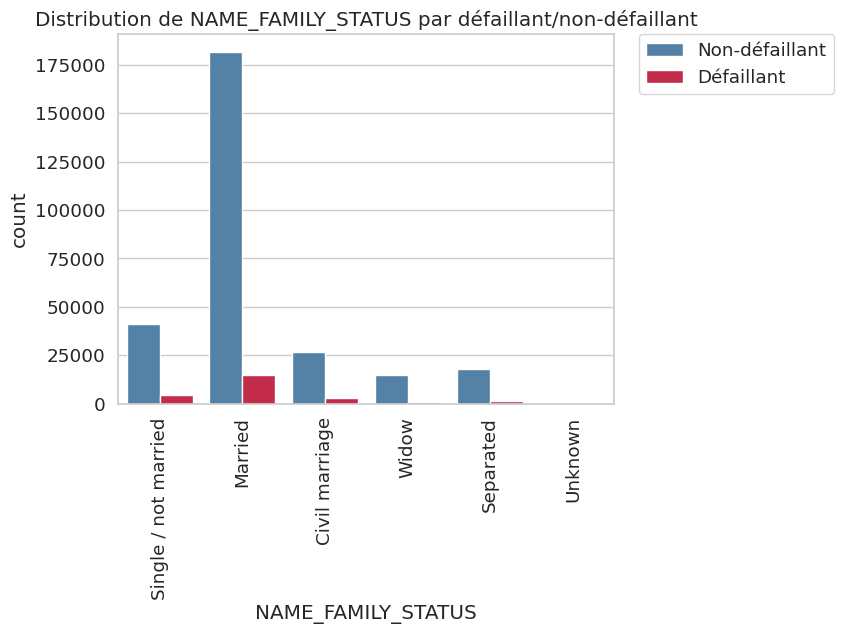

In [34]:
# Distribution par défaillants/non-défaillants
eda.plot_barplot_comp_target(application_train,
                                              'NAME_FAMILY_STATUS',
                                              rotation=90)

**Bilan** :
***
- Le premier graphique général montre que :
    - la majorité (74%) des demandeurs sont mariés (64% mariés religieusement, 10% mariés civilement).
    - près de 15% des demandeurs sont célibataires.
    - le reste est réparti entre les séparés (6.5%) et les veufs (%).
- Concernant les défaillants seuls, la règle du graphique général n'est pas respecté. Les demandeurs ayant les taux de défaillance le plus élevé sint mariés civilement ou célibataires (autour de 10%), puis suivent les séparés (8%), les mariés (7.5%) et les veufs (6%).

La situation familiale du demandeur pourra donc avoir une influence sur la défaillance du demandeur.

**Variable NAME_INCOME_TYPE**
Cette variable représente le type des revenus des demandeurs (homme d'affaires, travailleur, congé de maternité...)

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'NAME_INCOME_TYPE' sont :
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
-------------------------------------------------------------------------------
Répartition dans chaque catégorie :
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64
-------------------------------------------------------------------------------
Nombre de catégories uniques pour NAME_INCOME_TYPE = 8


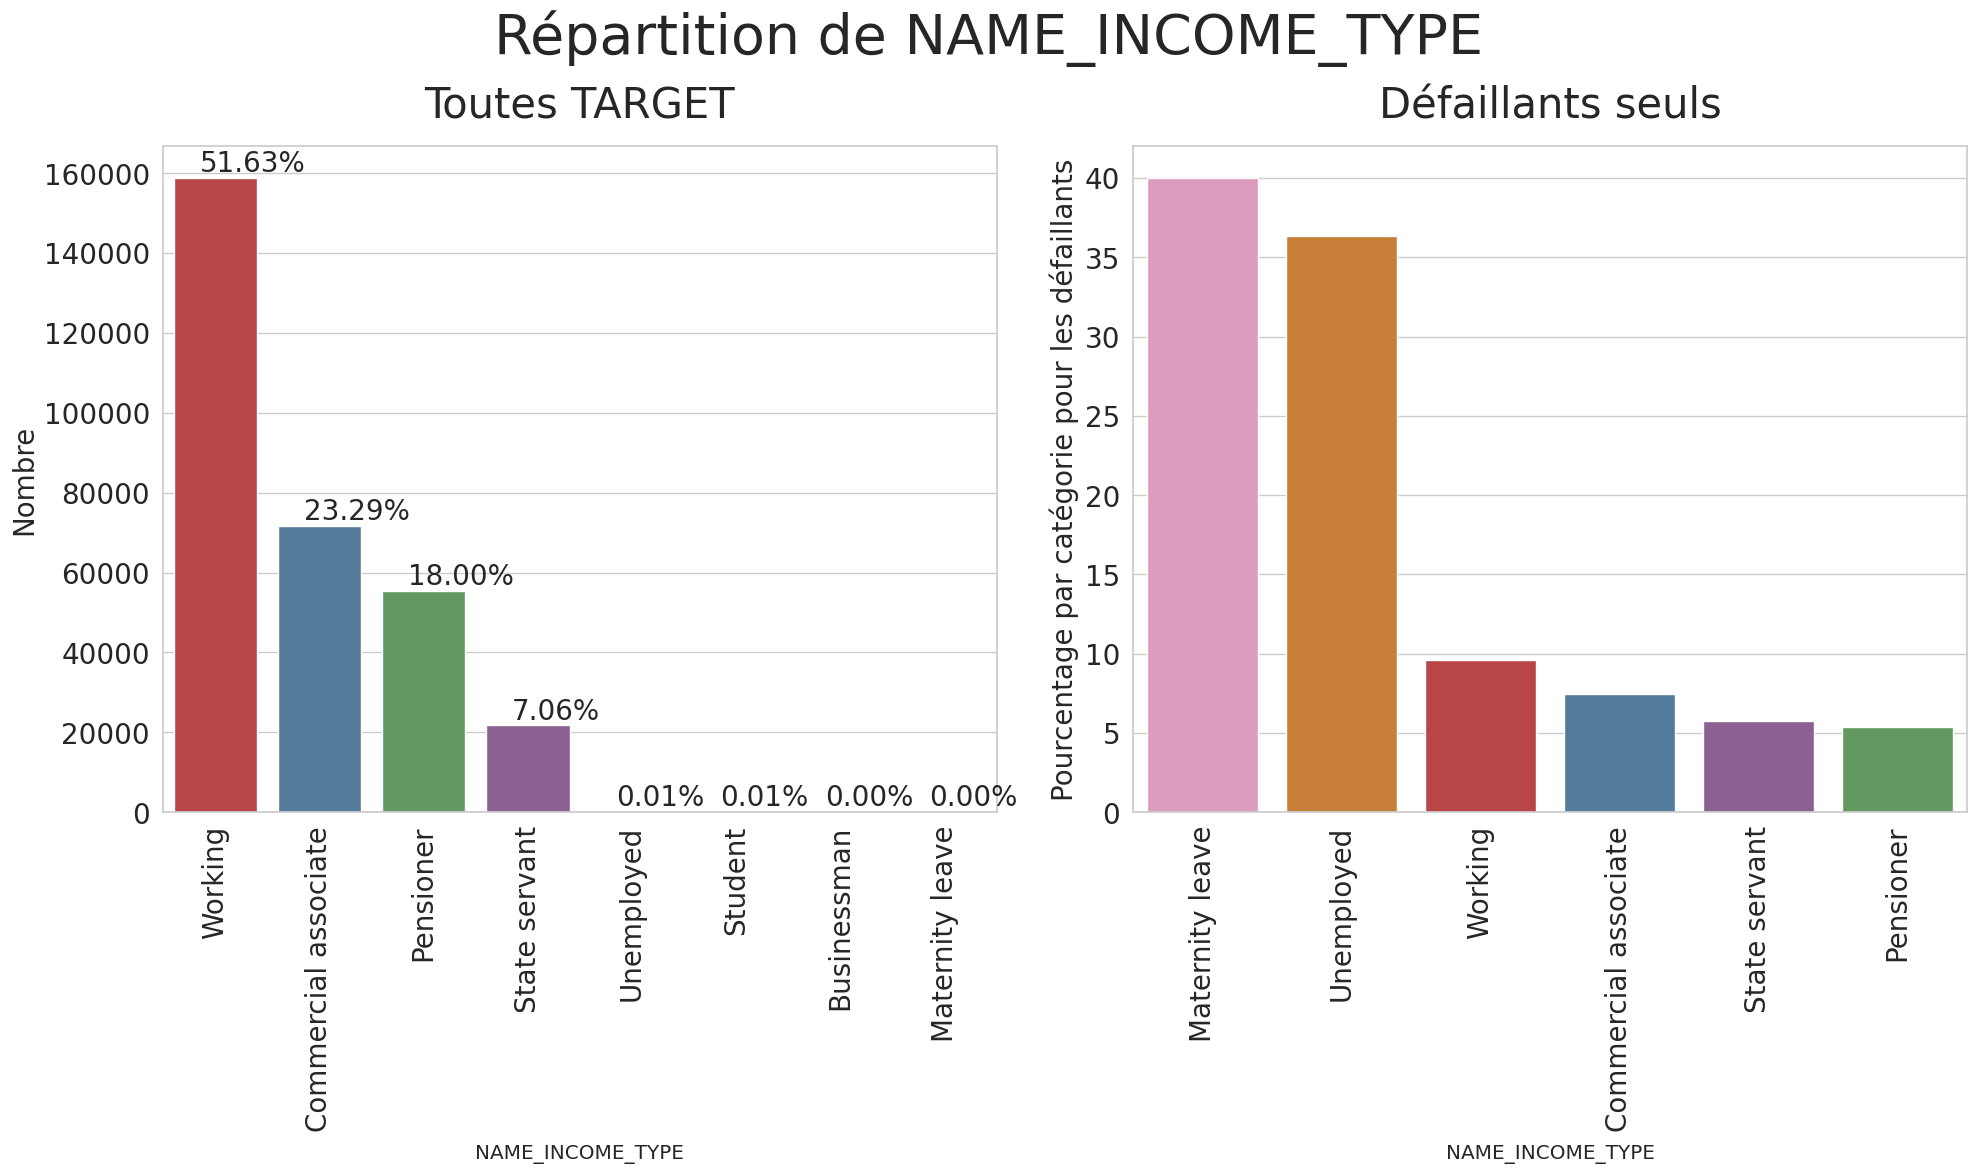

In [35]:
# Let us first see the unique categories of 'NAME_INCOME_TYPE'
eda.print_unique_categories(application_train, 'NAME_INCOME_TYPE',
                            show_counts=True)

# plotting the Bar Plot for the Column
eda.plot_categorical_variables_bar(application_train,
                                   column_name='NAME_INCOME_TYPE',
                                   figsize=(20, 12),
                                   rotation=90, horizontal_adjust=0.25,
                                   fontsize_percent=20,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38', '#e890be'],
                                   palette2=['#e890be', '#df7f20',
                                             '#cb3335', '#477ca8',
                                             '#905998', '#59a257'])

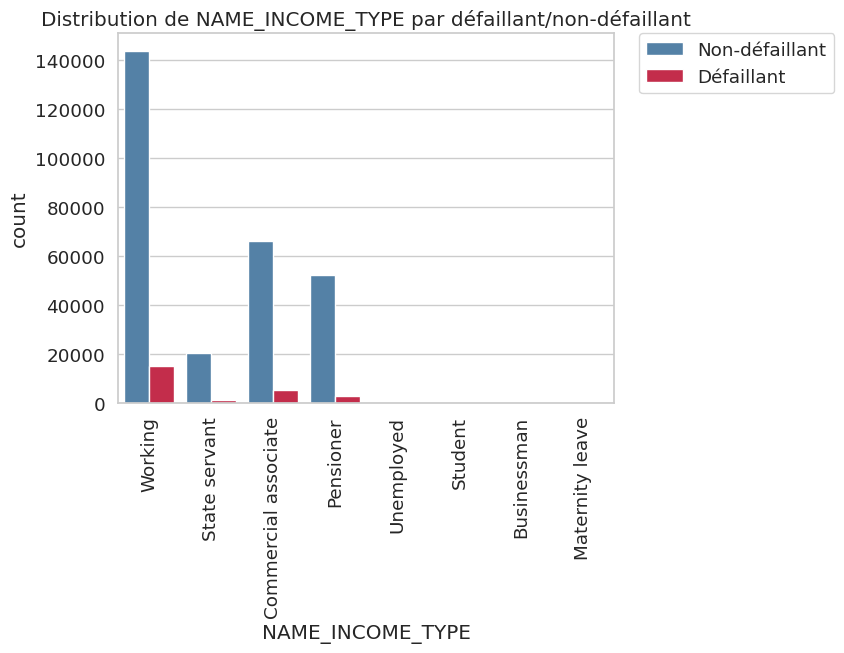

In [36]:
# Distribution par défaillants/non-défaillants
eda.plot_barplot_comp_target(application_train,
                                              'NAME_INCOME_TYPE',
                                              rotation=90)

**Bilan** :
***
- Le premier graphique général montre que :
    - la majorité des demandeurs sont des travailleurs (52%),
    - puis 23% de commerciaux, 18% de retraités et 7 % des vendeurs.
    - très peu de type de revenus passifs : non salariés, étudiants, hommes d'affaires et en congés de maternité : autour de 0%.
- Concernant les défaillants, les pourcentages du graphique général ne sont pas respectés :
    - la majorité des demandeurs ayant le taux de défaillance le plus élevé sont les catégories les plus rares du graphique général : les congés de maternité et les non salariés (près de 40%),
    - puis seulement 10% de la classe majoritaire des travailleurs 
    - et 5% de la classe des commerciaux.
    - Seulement 5% des 7% des retraités ne remboursent pas leurs dettes.

Le type de revenu du demandeur pourra donc avoir une influence sur la défaillance du demandeur.

**Variable NAME_TYPE_SUITE**

Qui accompagnait le demandeur lorsqu'il a demandé le prêt ?

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'NAME_TYPE_SUITE' sont :
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
-------------------------------------------------------------------------------
Répartition dans chaque catégorie :
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
-------------------------------------------------------------------------------
Nombre de catégories uniques pour NAME_TYPE_SUITE = 8


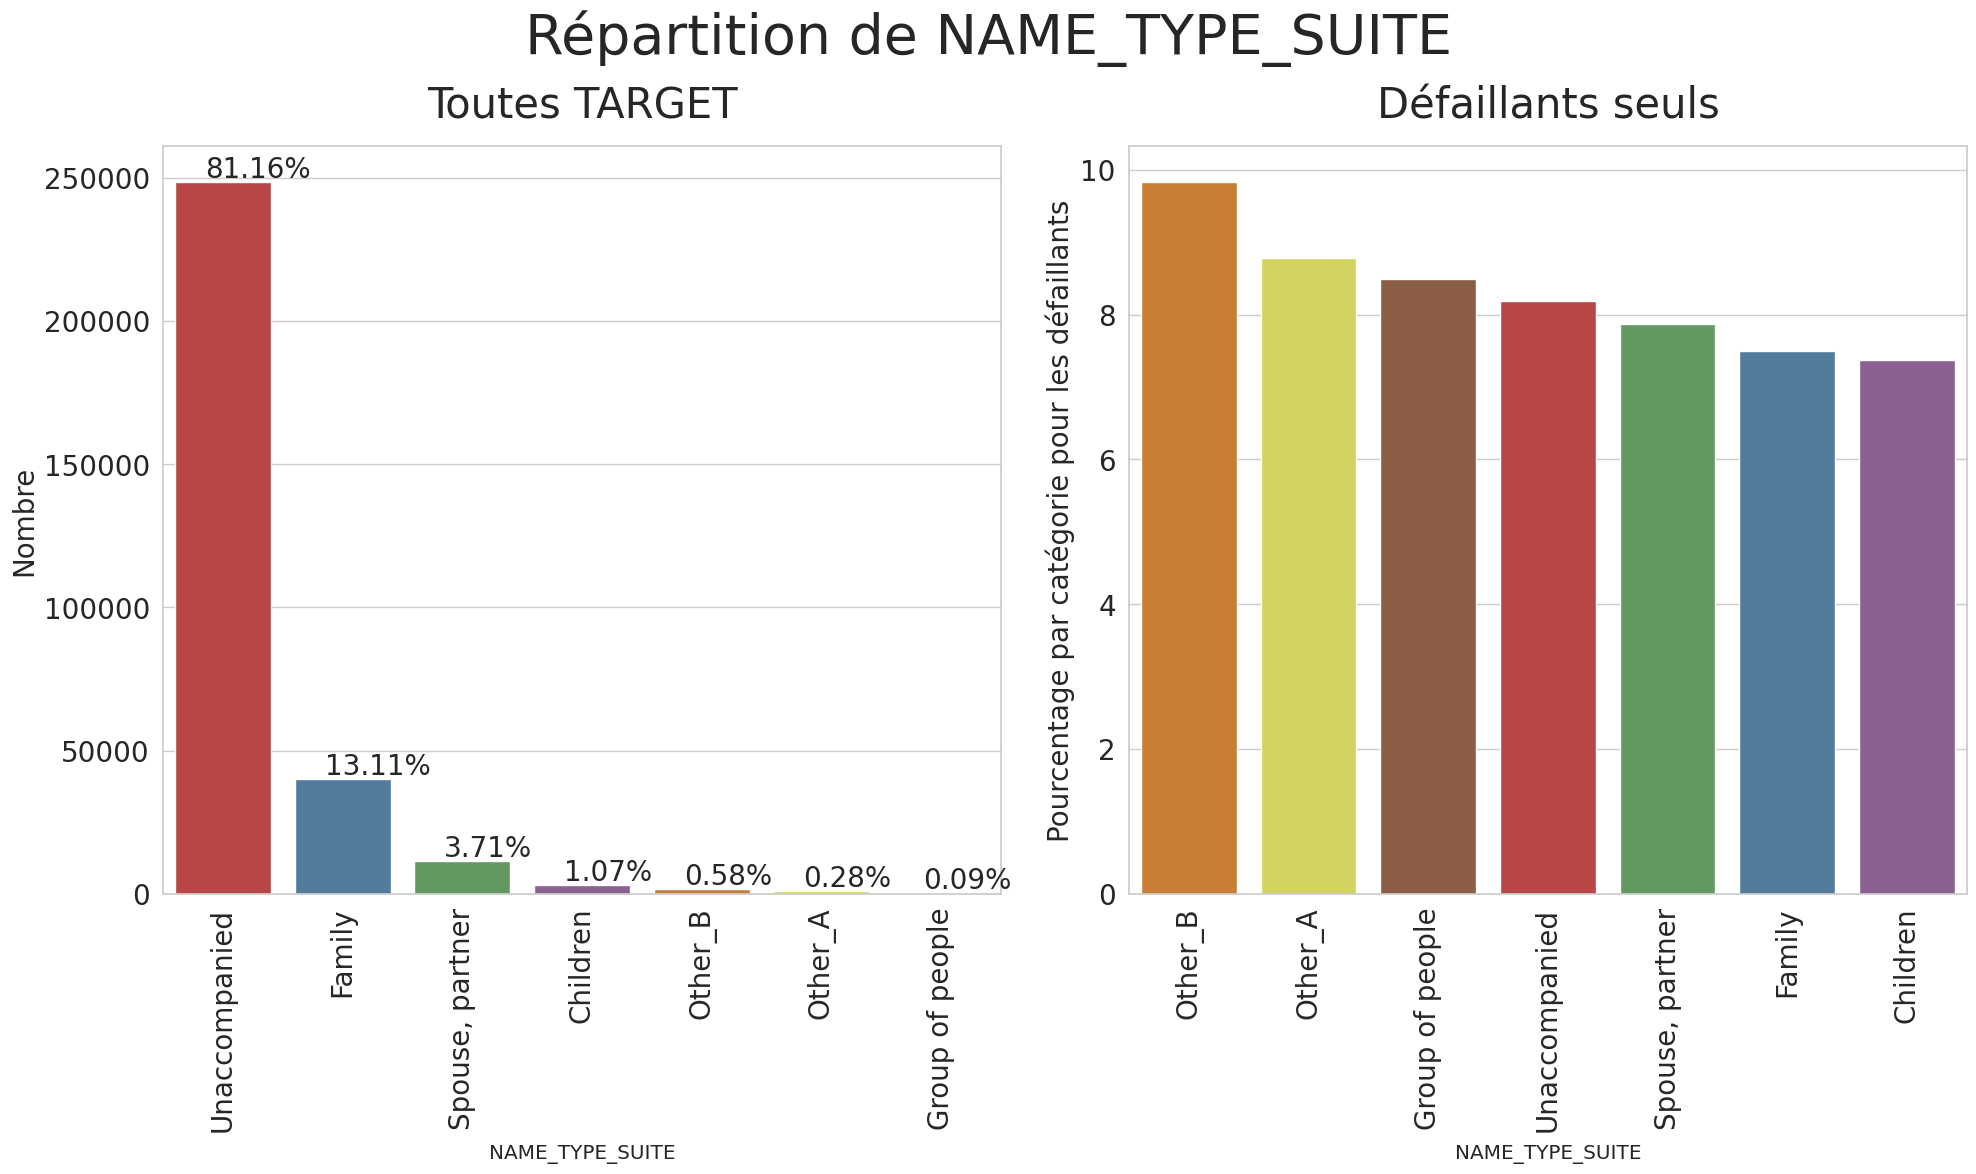

In [37]:
# Let us first see the unique categories of 'NAME_TYPE_SUITE'
eda.print_unique_categories(application_train, 'NAME_TYPE_SUITE',
                            show_counts=True)

# plotting the Bar Plot for the Column
eda.plot_categorical_variables_bar(application_train,
                                   column_name='NAME_TYPE_SUITE',
                                   figsize=(20, 12),
                                   rotation=90, horizontal_adjust=0.25,
                                   fontsize_percent=20,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38'],
                                   palette2=['#df7f20', '#e6e64c',
                                             '#965a38', '#cb3335',
                                             '#59a257', '#477ca8',
                                             '#905998'])

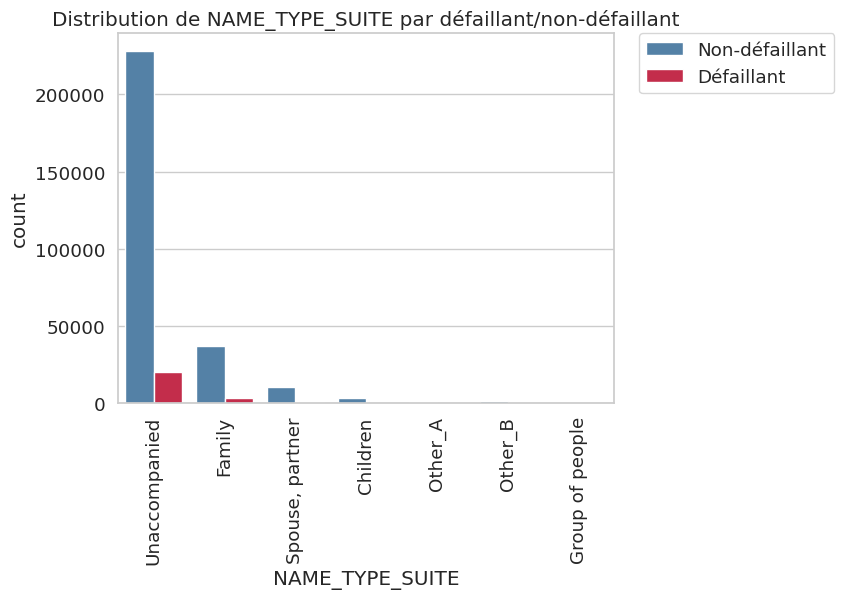

In [38]:
# Distribution par défaillants/non-défaillants
eda.plot_barplot_comp_target(application_train,
                                              'NAME_TYPE_SUITE',
                                              rotation=90)

**Bilan** :
***
- Le premier graphique général montre que :
    - la majorité des demandeurs n'ont pas été accompagnés leur du rendez-vous pour la demande de prêt (81%),
    - puis 13% ont été accompagnés par leur famille,
    - 4% par leur épouse ou conjoint,
    - très peu ont été accompagnés par un enfant (1%), ou d'autres personnes (<0.6% et 0.3% mais comment différencier Other_B de Other_A? pas précisé dans la documentation).
- Concernant les défaillants, les pourcentages du graphique général ne sont pas respectés :
    - les 3 catégories les plus défaillantes sont les 3 catégories représentant moins de 0.6% et 0.3% sur le graphique général :
        - 10% des défaillants ont été accompagnés par les autres personnes Other_B qui ne représentent que 0.6% des classes du graphique général.
        - 8.5% des autres personnes Other_A,
        - et 8% par un groupe de personnes.

L'accompagnateur du demandeur lors du rendez-vous de la demande de prêt pourra donc avoir une influence sur la défaillance du demandeur.

**Variable FLAG_CONT_MOBILE**

Le téléphone portable était-il joignable ? :
- **1** : OUI, 
- et **0** : NON.

Nombre de catégories uniques pour FLAG_CONT_MOBILE = 2


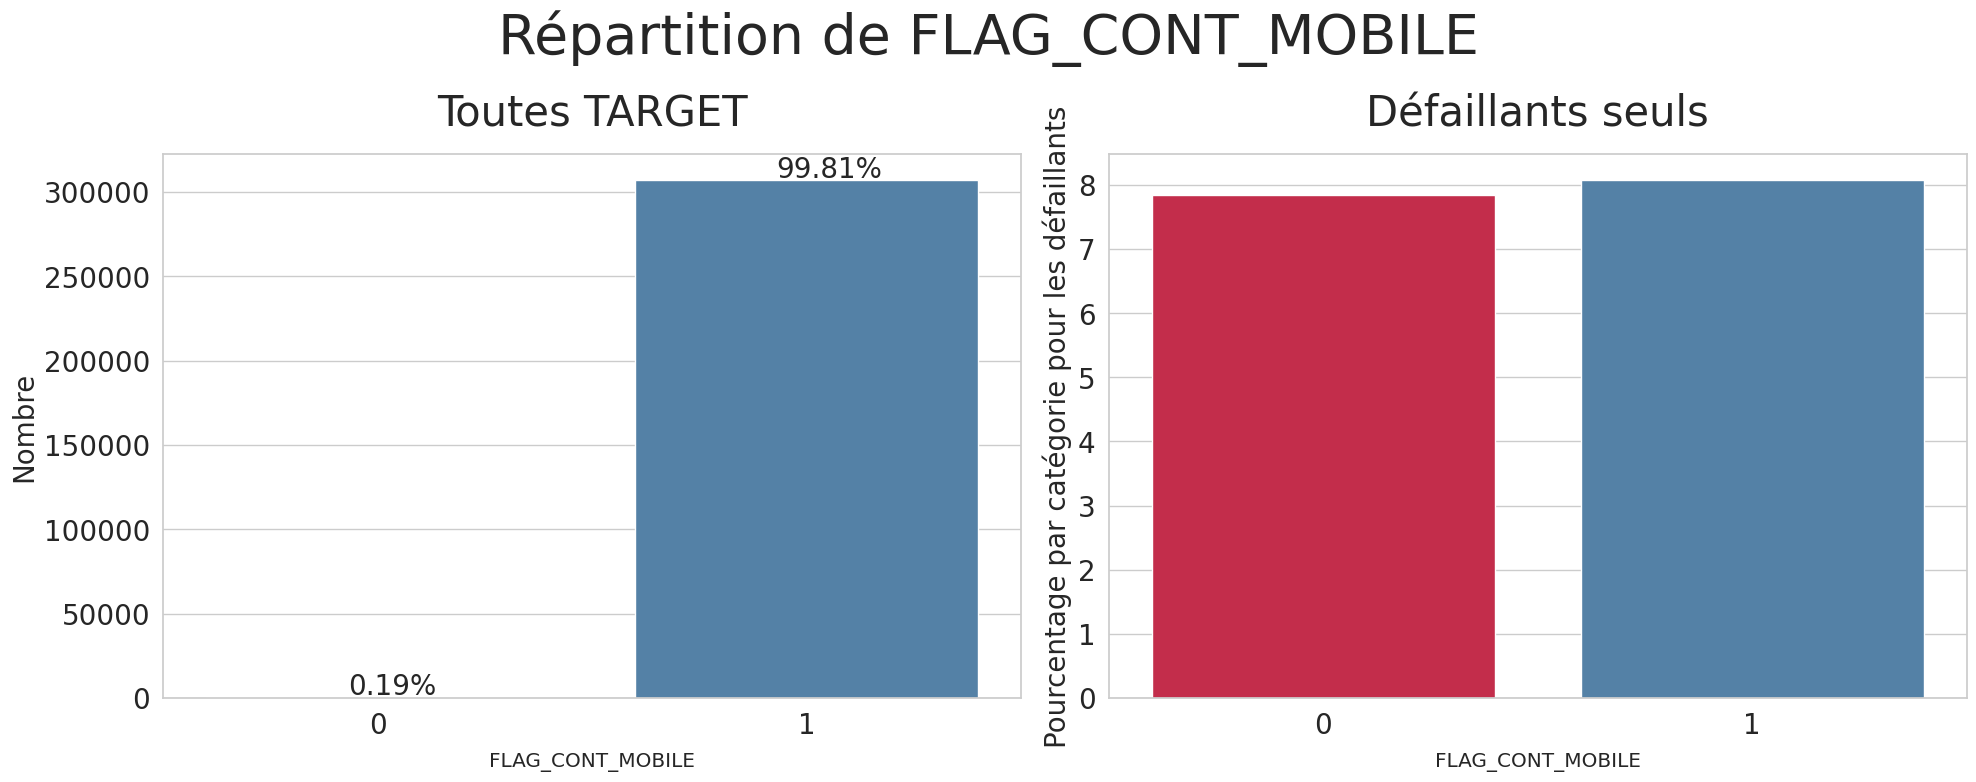

In [39]:
eda.plot_categorical_variables_bar(
    application_train, column_name='FLAG_CONT_MOBILE',
    figsize=(20, 8), horizontal_adjust=0.33, fontsize_percent=20,
    palette1=['Crimson', 'SteelBlue'], palette2=['Crimson', 'SteelBlue'])

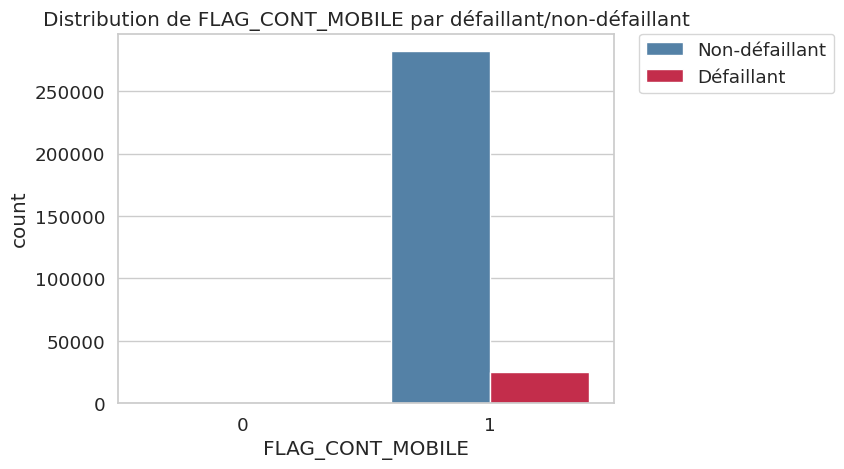

In [40]:
# Distribution par défaillants/non-défaillants
eda.plot_barplot_comp_target(application_train,
                                              'FLAG_CONT_MOBILE')

**Bilan** :
***
- sur l'ensemble des demandeurs, le téléphone portable est joignable à 99,8% mais pour les défaillants le pourcentage passe à 50%.

Cette variable pourra être utile pour départager les défaillants des non-défaillants sur la joignabilité du téléphone portable.

***
<span style='background:green'>**Distribution des variables quantitatives**</span>
***

In [41]:
# Liste des variables quantitatives
cols_num = \
    application_train.select_dtypes(include=[np.number]).columns.to_list()
cols_num

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

**Variable DAYS_BIRTH**
****
- Âge du demandeur en jours au moment de la demande.
- Pour l'ensemble de données donné, l'âge est indiqué en jours, ce qui peut être plus difficile à interpréter. 
- Nous allons donc créer une variable latente pour stocker les âges en années, ce qui sera plus facile à analyser et à interpréter.

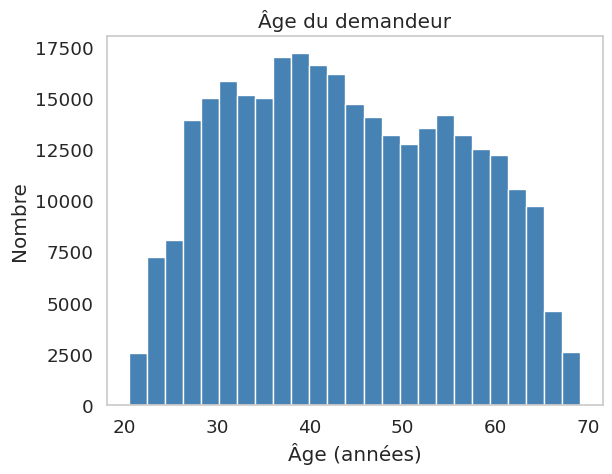

In [42]:
plt.hist(application_train['DAYS_BIRTH']*-1/365, color='SteelBlue',
         bins=25)
plt.title('Âge du demandeur')
plt.xlabel('Âge (années)')
plt.ylabel('Nombre')
plt.grid(False)
plt.show()

In [43]:
# Transformer l'âge en années à partir du nombre de jours
application_train['AGE_YEARS'] = \
    application_train['DAYS_BIRTH'] * -1 / 365

-------------------------------------------------------------------------------
Pecentiles de la variable AGE_YEARS
Pecentile 0 = 20.517808219178082
Pecentile 25 = 34.00821917808219
Pecentile 50 = 43.15068493150685
Pecentile 75 = 53.92328767123288
Pecentile 90 = 60.76986301369863
Pecentile 92 = 61.87397260273973
Pecentile 94 = 62.99452054794521
Pecentile 96 = 64.1945205479452
Pecentile 98 = 65.6027397260274
Pecentile 100 = 69.12054794520547
-------------------------------------------------------------------------------


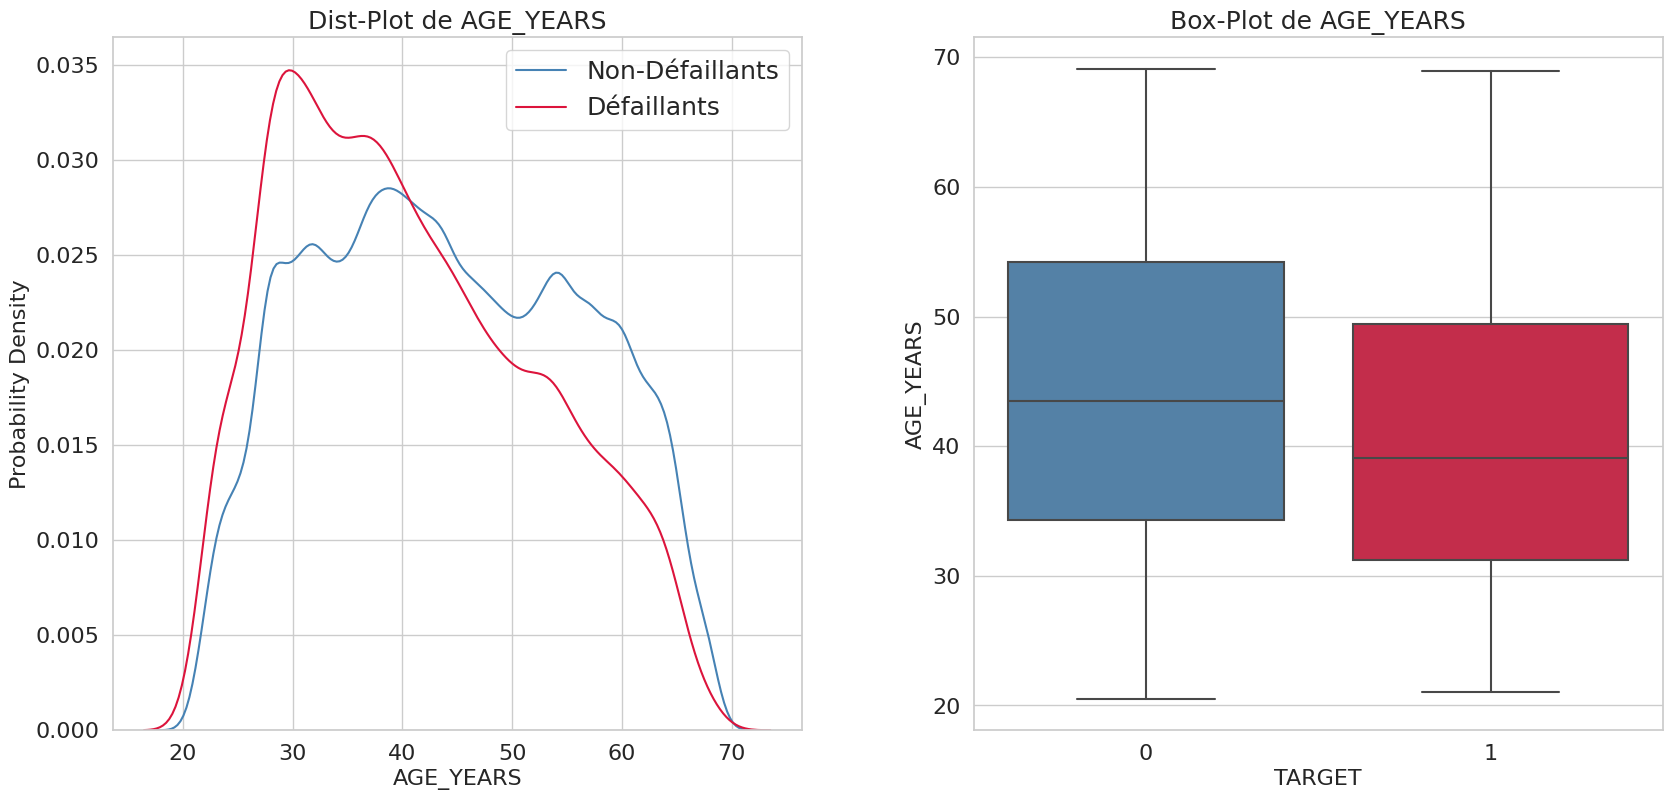

In [44]:
# Affiche les quantiles
eda.print_percentiles(application_train, 'AGE_YEARS')
# Affiche boxplot, distplot pour l'âge
eda.plot_continuous_variables(application_train,
                                               'AGE_YEARS',
                                               plots=['distplot', 'box'])
# Suppression de la variable nouvellement ajoutée
_ = application_train.pop('AGE_YEARS')

Les deux graphiques ci-dessus nous permettent de tirer quelques enseignements importants.

- Dans le distplot, nous pouvons observer le pic d'âge des défaillants se rapproche de 30 ans. De plus, à ce stade, les personnes qui ne sont pas en défaut de paiement ont un PDF assez faible. Une autre chose à noter est que la PDF de l'âge des défaillants commence un peu à gauche de celle des non défaillants, et qu'elle est également un peu plus étirée sur tous les âges. Cela signifie que les défaillants sont généralement plus jeunes que les non-défaillants.
- Le box-plot nous permet également de mieux visualiser la même chose. L'âge des défaillants est généralement inférieur à celui des non-défaillants. Tous les quantiles d'âge des défaillants sont inférieurs à ceux des non-défaillants. La valeur du 75e percentile des non-défaillants est d'environ 54 ans, tandis que celle des défaillants est proche de 49 ans.

Ces observations impliquent que les défaillants sont généralement plus jeunes que les non-défaillants.

**Variables EXT_SOURCES_1, EXT_SOURCES_2, EXT_SOURCES_3**
***
- Il existe trois colonnes EXT_SOURCES, qui contiennent des valeurs comprises entre 0 et 1. 
- Il s'agit de scores normalisés provenant de différentes sources pour lesquels nous n'avons pas plus d'information.

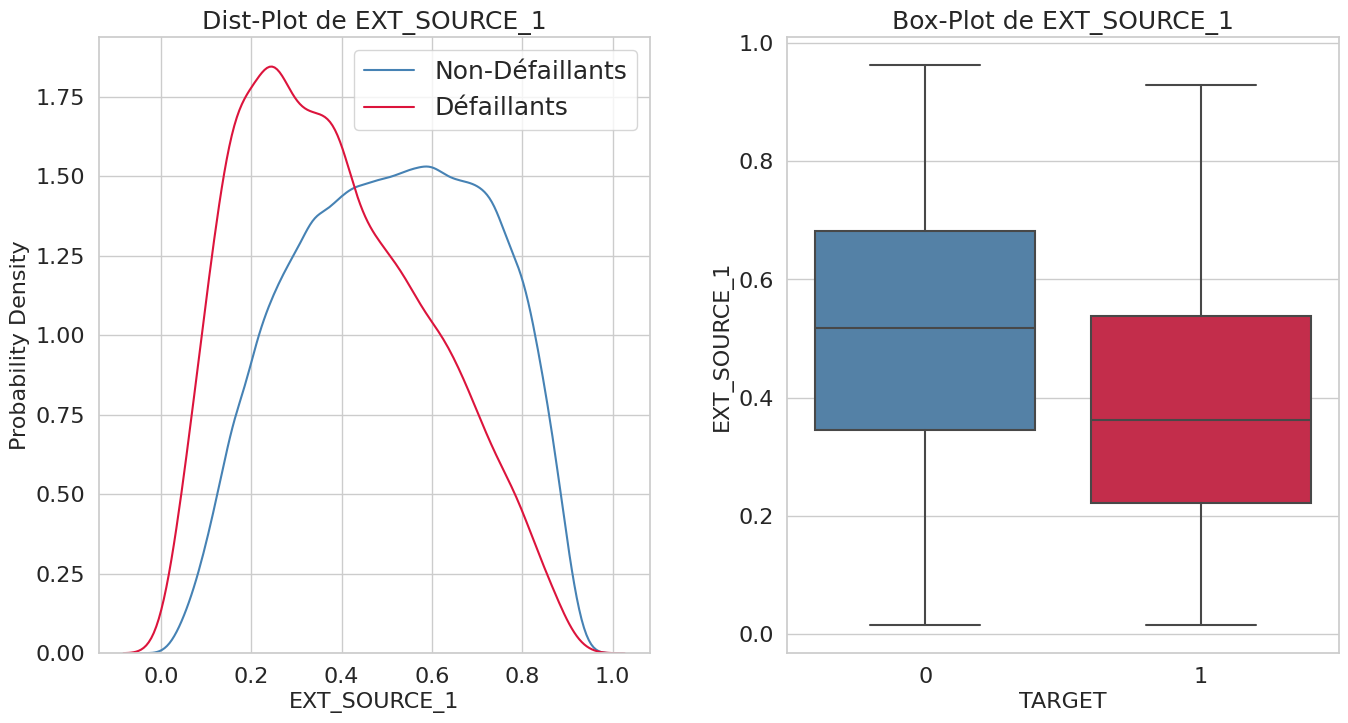

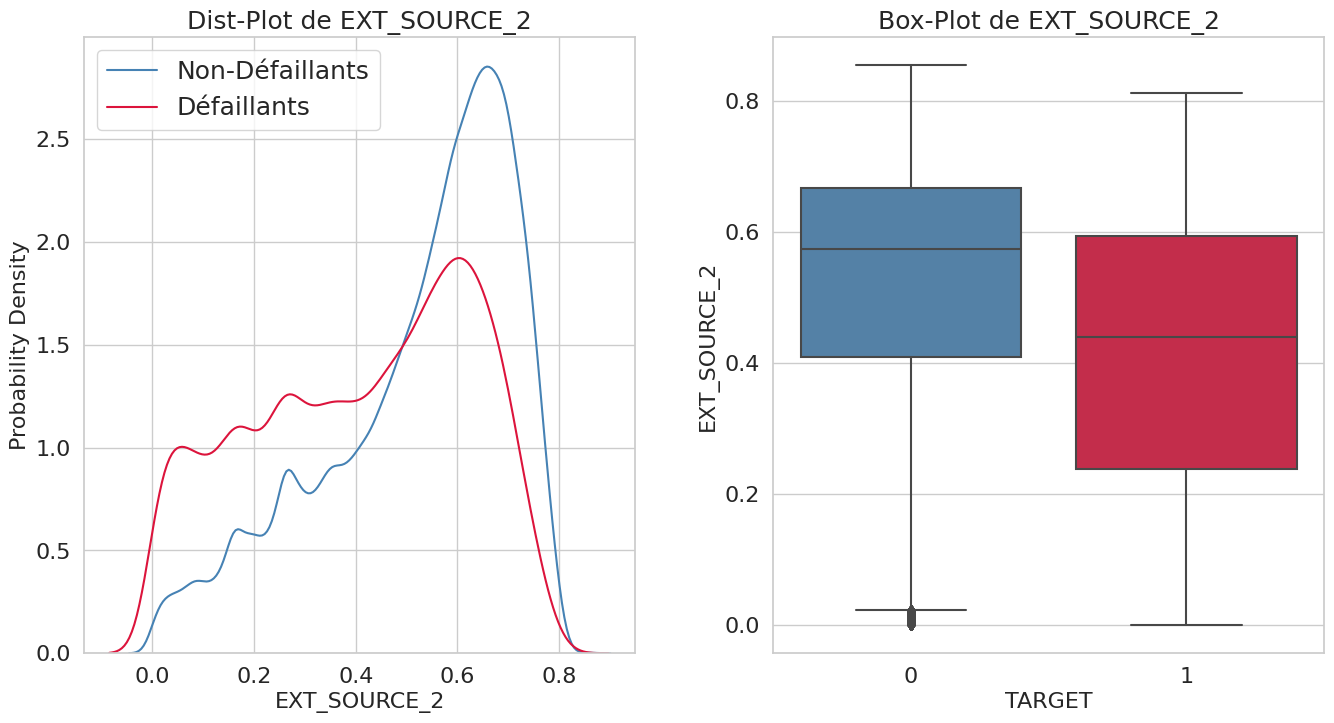

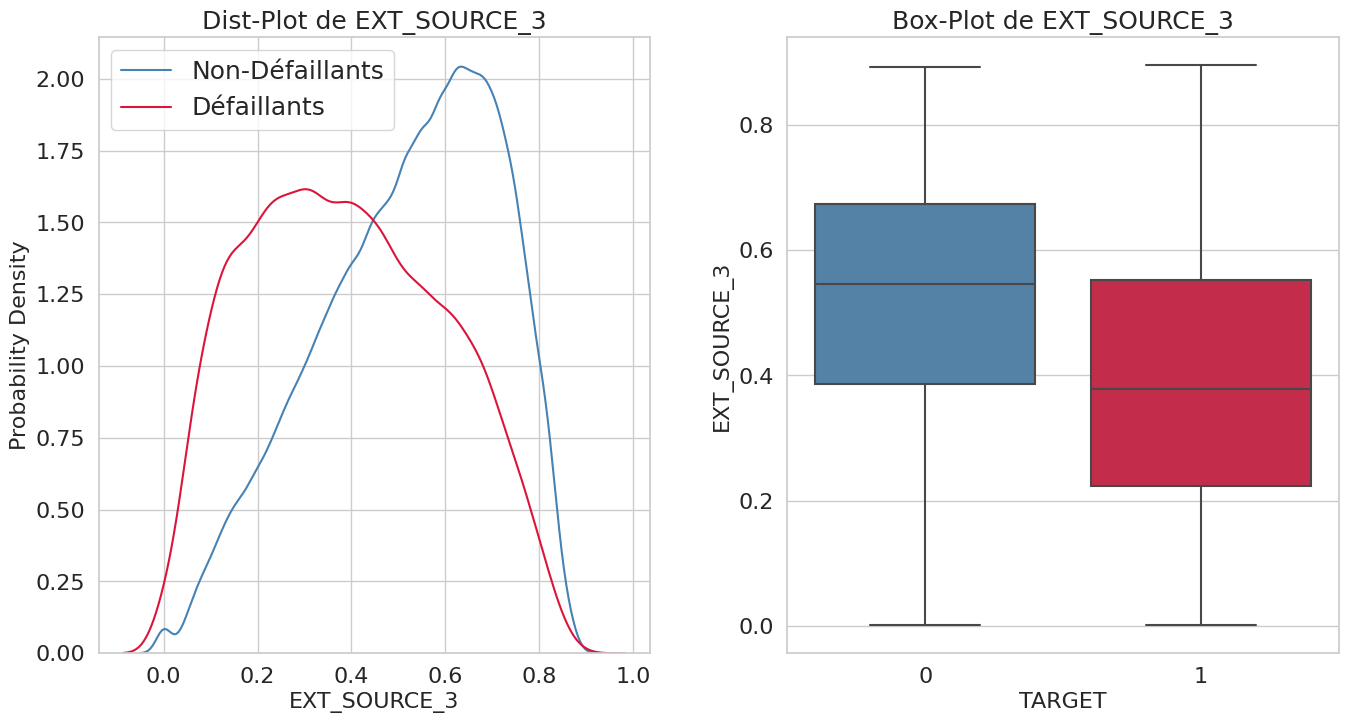

In [45]:
# Distplot et boxplot de EXT_SOURCE_1
eda.plot_continuous_variables(application_train,
                                               'EXT_SOURCE_1',
                                               plots=['distplot', 'box'],
                                               figsize=(16, 8))
# Distplot et boxplot de EXT_SOURCE_2
eda.plot_continuous_variables(application_train,
                                               'EXT_SOURCE_2',
                                               plots=['distplot', 'box'],
                                               figsize=(16, 8))
# Distplot et boxplot de EXT_SOURCE_3
eda.plot_continuous_variables(application_train,
                                               'EXT_SOURCE_3',
                                               plots=['distplot', 'box'],
                                               figsize=(16, 8))

**Bilan** :
***
À partir des trois graphiques ci-dessus, nous pouvons tirer les conclusions suivantes :

- Si nous examinons les box-plots, nous pouvons clairement voir une tendance similaire pour les trois colonnes EXT_SOURCE, à savoir que les valeurs des défaillants ont tendance à avoir des valeurs considérablement plus basses que les non-défaillants.
- Cette tendance peut également être observée avec les PDF. Les non-défaillants montrent un pic plus élevé pour les valeurs élevées de EXT_SOURCE, et les densités de probabilité sont très faibles pour les valeurs faibles. Cela implique que les non-défaillants ont généralement des valeurs élevées pour ces scores.
- Il est intéressant de noter que la valeur médiane des défaillants est presque égale ou inférieure aux valeurs du 25ème percentile des non-défaillants.
- Les variables EXT_SOURCE_1 et EXT_SOURCE_3 tendent à montrer une meilleure discrimination/séparabilité par rapport à la variable EXT_SOURCE_2.

Ces 3 variables semblent être les meilleurs pour séparer linéairement les défaillants et les non-défaillants parmi toutes les variables utilisées jusqu'à présent.

**Variable FLOORSMAX_AVG**
***
Cette variable décrit les scores normalisés de la moyenne du nombre maximum d'étages dans le bâtiment du demandeur.

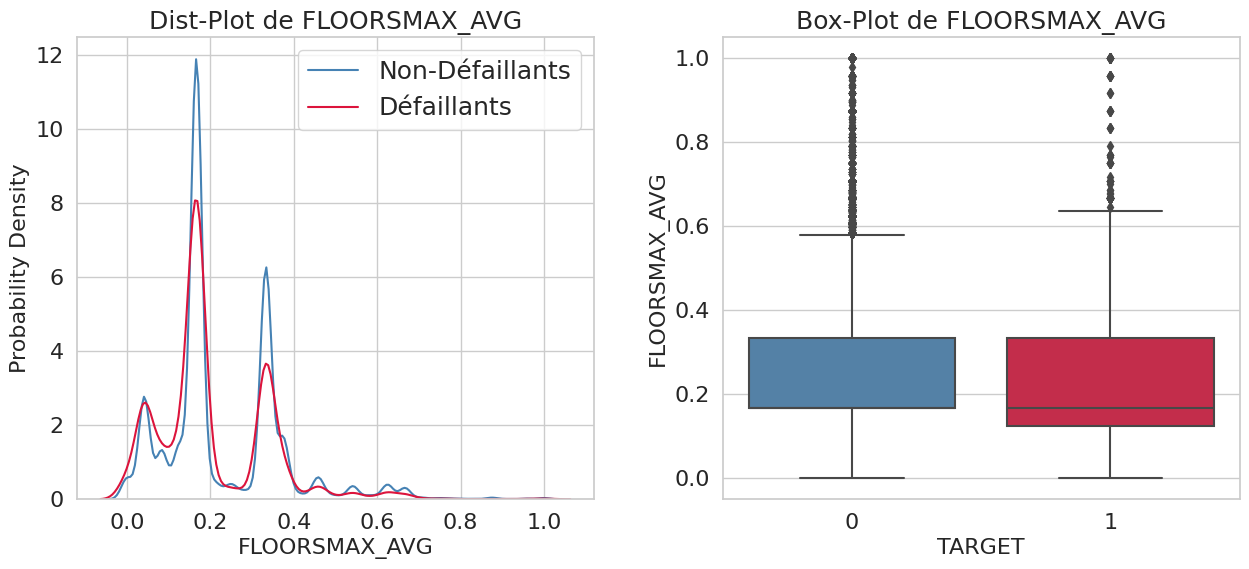

In [46]:
# Boxplot de FLOORSMAX_AVG
eda.plot_continuous_variables(application_train,
                                               'FLOORSMAX_AVG',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

**Bilan**:
***
- Le boxplot montre que les défaillants ont une valeur médiane de la caractéristique FLOORSMAX_AVG inférieure à celle des non-défaillants.
- Les valeurs du 75e percentile des défaillants et des non-défaillants sont plus ou moins les mêmes, mais la valeur du 25e percentile des non-défaillants est presque supérieure à la médiane des défaillants.

Cette variable pourrait être une variable importante pour départager les défaillants des non-défaillants.

**Variable FLOORSMAX_MEDI**
***
Cette variable décrit les scores normalisés de la médiane du nombre maximum d'étages dans le bâtiment du demandeur.

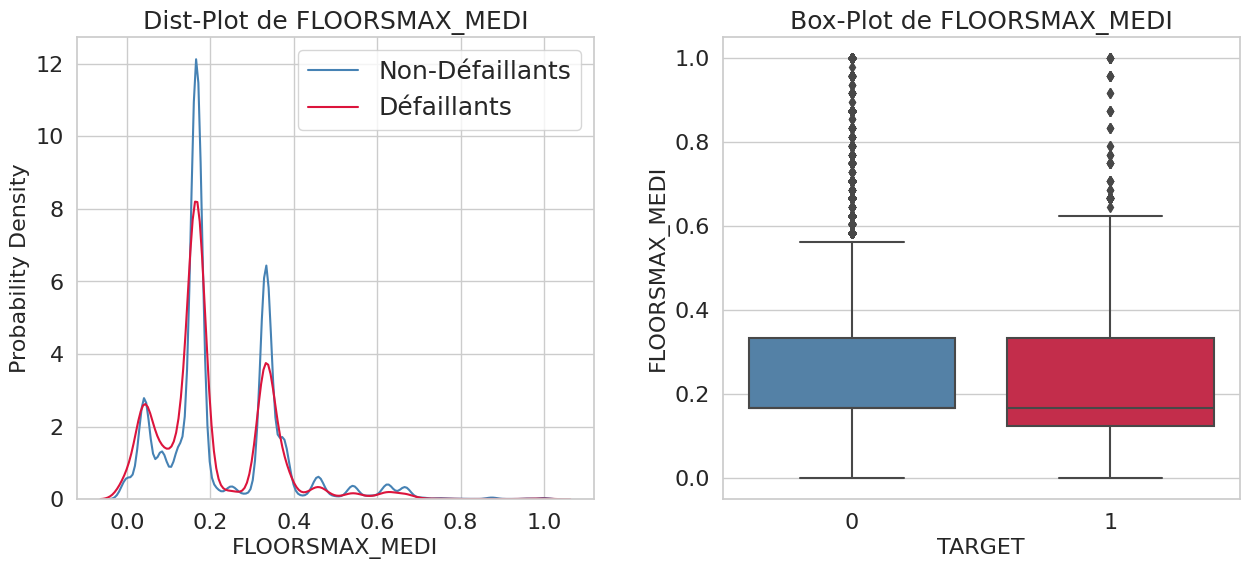

In [47]:
# Boxplot de FLOORSMAX_MEDI
eda.plot_continuous_variables(application_train,
                                               'FLOORSMAX_MEDI',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

**Bilan**:
***
- Le boxplot montre que les défaillants ont une valeur médiane de la caractéristique FLOORSMAX_MEDI inférieure à celle des non-défaillants.
- Les valeurs du 75e percentile des défaillants et des non-défaillants sont plus ou moins les mêmes, mais la valeur du 25e percentile des non-défaillants est presque supérieure à la médiane des défaillants.

Cette variable pourrait être une variable importante pour départager les défaillants des non-défaillants.

**Variable FLOORSMAX_MODE**
***
Cette variable décrit les scores normalisés du mode du nombre maximum d'étages dans le bâtiment du demandeur

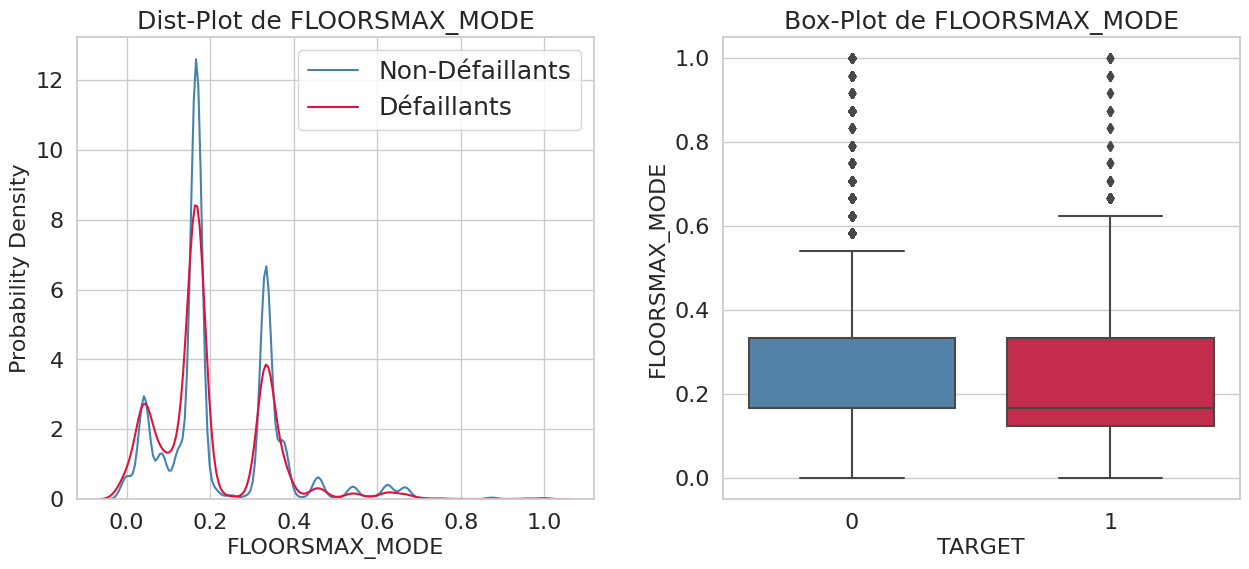

In [48]:
# Boxplot de FLOORSMAX_MODE
eda.plot_continuous_variables(application_train,
                                               'FLOORSMAX_MODE',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

**Bilan**:
***
- Le boxplot montre que les défaillants ont une valeur médiane de la variable FLOORSMAX_MODE inférieure à celle des non-défaillants.
- Les valeurs du 75e percentile des défaillants et des non-défaillants sont plus ou moins les mêmes, mais la valeur du 25e percentile des non-défaillants est presque supérieure à la médiane des défaillants.

Cette variable pourrait être une variable importante pour départager les défaillants des non-défaillants.

En conclusion, nous pouvons dire que  sur les variables(**FLOORSMIN_MODE**, **FLOORSMIN_AVG** et **FLOORSMIN_MEDI**) qui décrivent les scores normalisées restantes seront toutes utiles pour départager les défaillants des non-défaillants. :

**Variable OWN_CAR_AGE**
***
- Âge de la voiture du demandeur.

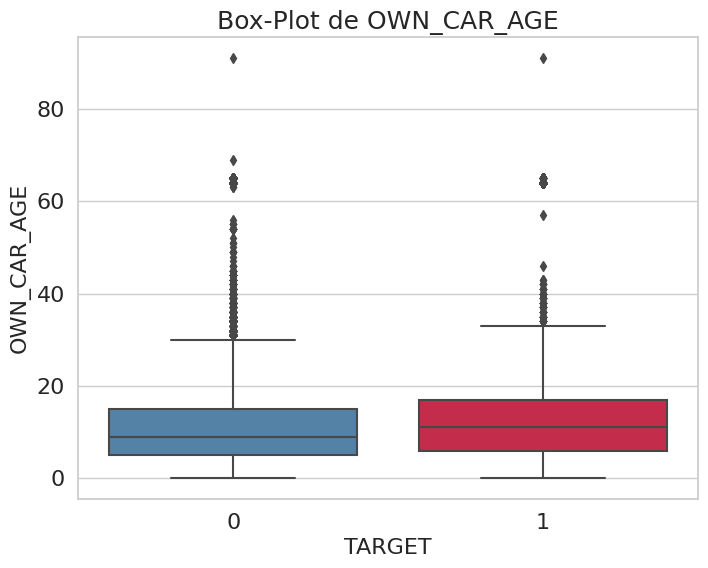

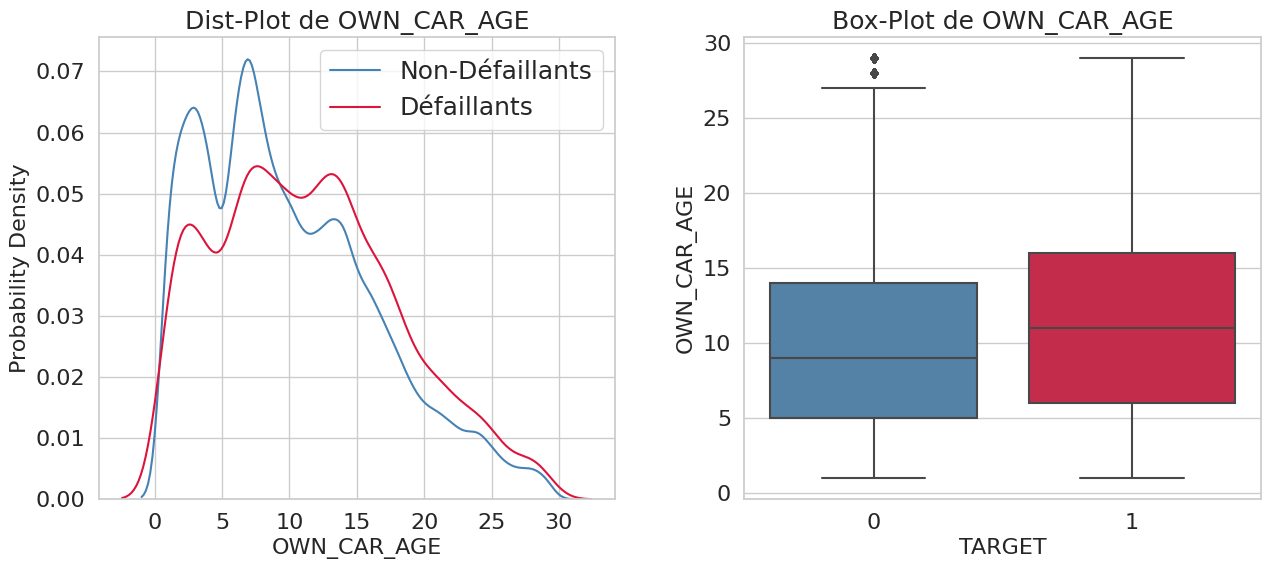

In [49]:
# Boxplot de OWN_CAR_AGE
eda.plot_continuous_variables(application_train,
                                               'OWN_CAR_AGE',
                                               plots=['box'],
                                               figsize=(8, 6))
eda.plot_continuous_variables(application_train,
                                               'OWN_CAR_AGE',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6),
                                               scale_limits=[0, 30])

**Bilan**:
***
- Les défaillants ont des voitures plus anciennes que les non-défaillants.

Cette variable pourra être utile pour départager les défaillants  des non-défaillants.

**Variable DEF_60_CNT_SOCIAL_CIRCLE**
***
Combien d'observations de l'environnement social du demandeur ont fait l'objet d'un défaut de paiement de 60 (jours d'arriérés) DPD.

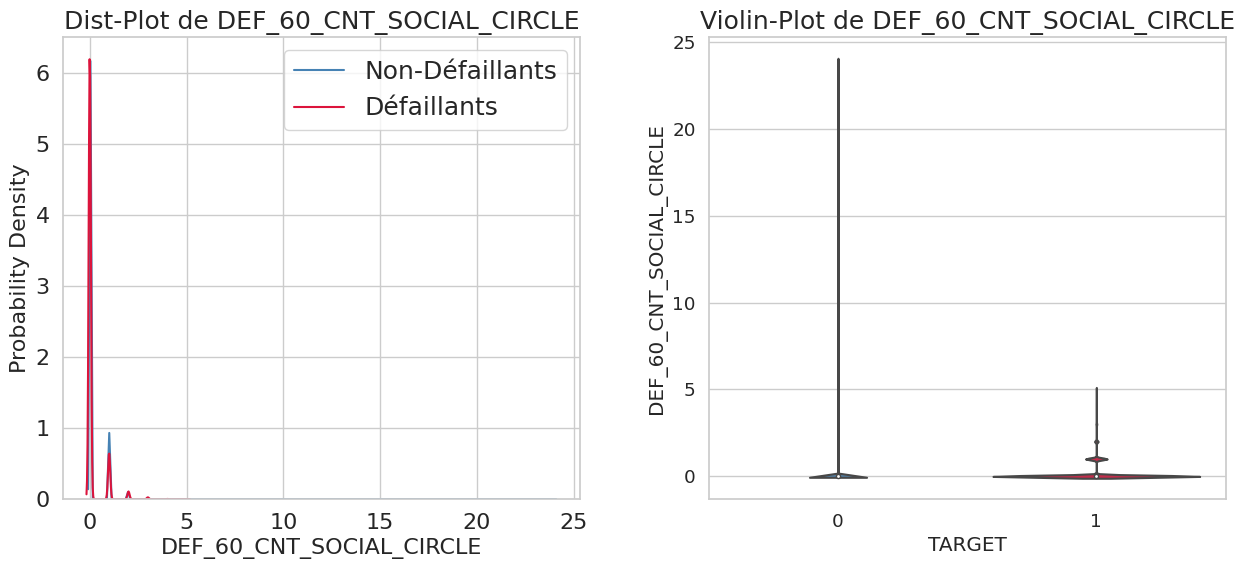

In [50]:
# Violinplot de DEF_60_CNT_SOCIAL_CIRCLE
eda.plot_continuous_variables(application_train,
                                               'DEF_60_CNT_SOCIAL_CIRCLE',
                                               plots=['distplot', 'violin'],
                                               figsize=(15, 6))

**Bilan**:
***
- Les défaillants ont plus de défaut de paiement de jours d'arriérés.

Cette variable pourra être utilisée pour départager les demandeurs défaillants ou non-défaillants.

**Variable DAYS_LAST_PHONE_CHANGE**
***
Combien de jours avant la demande le demaneur a-t-il changé de téléphone ?

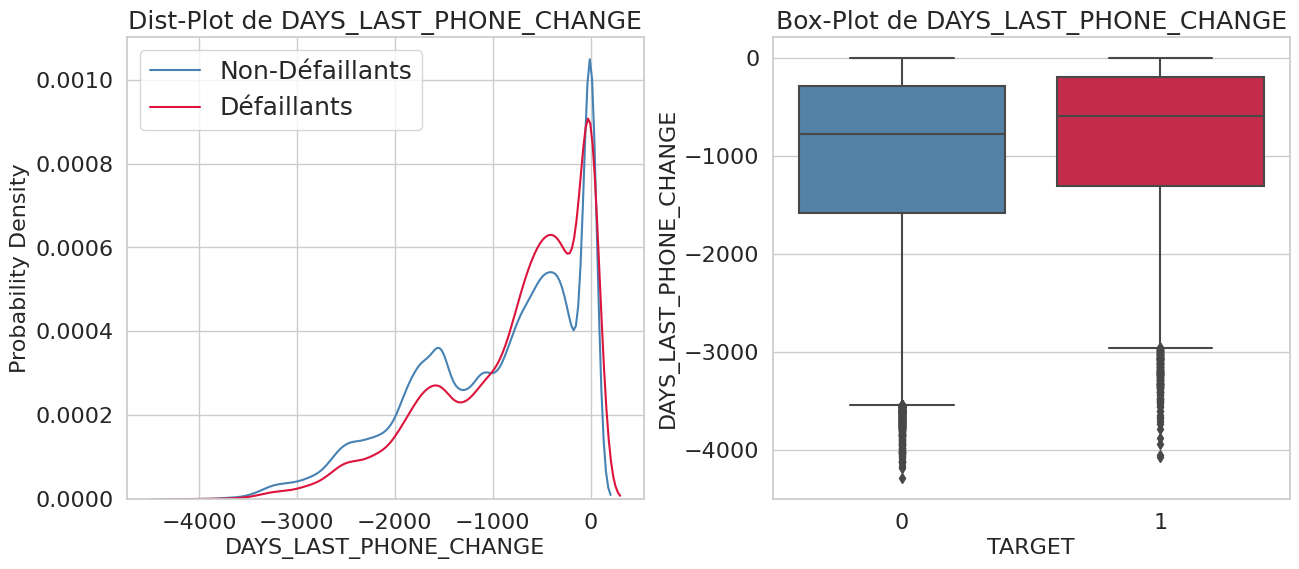

In [51]:
# Boxplot de DAYS_LAST_PHONE_CHANGE
eda.plot_continuous_variables(application_train,
                                               'DAYS_LAST_PHONE_CHANGE',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 6))

**Bilan**:
***
- Les défaillants ont changé de téléphone plus récemment que les non-défaillants, tous les quantiles sont plus hauts pour les défaillants que les non-défaillants.

Cette variable pourra être utile pour départager les demandeurs défaillants ou non-défaillants.

#### <span style= ''>3.1.1 Analyse Multivariée</span>

**Corrélation entre les varibales catégorielles**
***
- Nous allons tracer une carte thermique des valeurs du [coefficient de corrélation Phi-K](https://lemakistatheux.wordpress.com/2013/09/01/le-coefficient-phi-2/) entre les 2 variables.
- Le [coefficient Phi-K](https://en.wikipedia.org/wiki/Phi_coefficient) est similaire au coefficient de corrélation sauf qu'il peut être utilisé avec une paire de caractéristiques catégorielles pour vérifier si une variable montre une sorte d'association avec l'autre variable catégorielle. Sa valeur maximale peut être de 1, ce qui indique une association maximale entre deux variables catégorielles.

-------------------------------------------------------------------------------


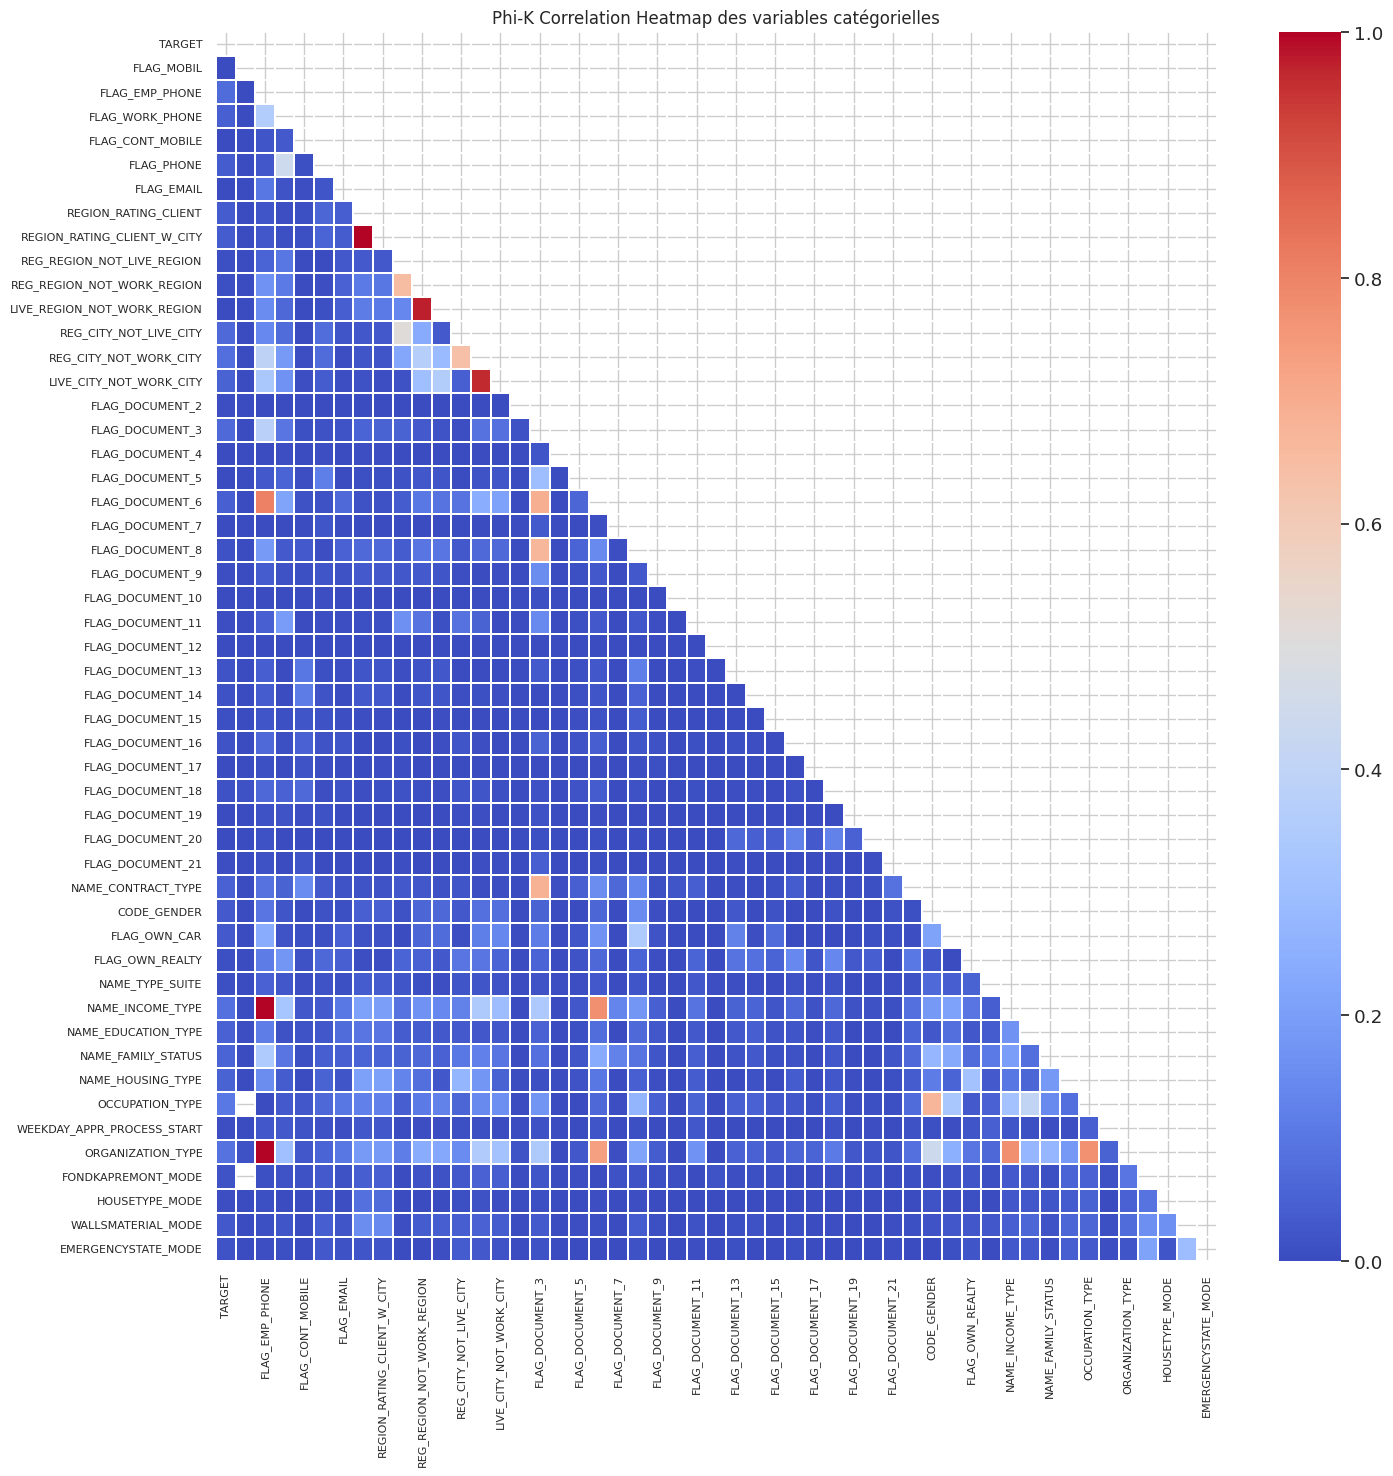

-------------------------------------------------------------------------------
Les catégories présentant les valeurs les plus élevées de la corrélation Phi-K avec la variable cible sont les suivantes :


-------------------------------------------------------------------------------


In [52]:
categorical_columns = ['TARGET', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
                       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
                       'FLAG_EMAIL', 'REGION_RATING_CLIENT',
                       'REGION_RATING_CLIENT_W_CITY',
                       'REG_REGION_NOT_LIVE_REGION',
                       'REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
                       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'] \
    + ['FLAG_DOCUMENT_' + str(i) for i in range(2, 22)] \
    + application_train.dtypes[application_train.dtypes == 'object'] \
    .index.tolist()
eda.plot_phik_matrix(application_train,
                                      categorical_columns,
                                      figsize=(15, 15), fontsize=8,
                                      cmap='coolwarm')

**Bilan** :
***
- La carte thermique de la corrélation Phi-K ci-dessus montre que la plupart des variables catégorielles ne sont pas corrélées entre elles, mais que certaines d'entre elles présentent une forte corrélation.
- Certaines des paires de catégories fortement corrélées sont :
    - REGION_RATING_CLIENT_W_CITY et REGION_RATING_CLIENT - Ceci est compréhensible car elles racontent plus ou moins une histoire similaire.
    - LIVE_REGION_NOT_WORK_REGION et REG_REGION_NOT_WORK_REGION
    - NAME_INCOME_TYPE, ORGANIZATION_TYPE et FLAG_EMP_PHONE
- Nous pouvons également observer une certaine corrélation entre le type d'organisation et le type de revenu d'un demandeur. 
- De même, nous constatons une corrélation entre le type de profession et le type d'organisation.
- Nous constatons que les catégories :
    - OCCUPATION_TYPE,
    - ORGANIZATION_TYPE,
    - NAME_INCOME_TYPE,
    - et REG_CITY_NOT_WORK_CITY
    sont parmi les catégories les plus fortement corrélées avec la variable TARGET. Elles peuvent être importantes dans la tâche de classification et nécessiteraient une analyse EDA plus approfondie.

**Corrélations entre les varibales numériques**
***
**Matrice de corrélation**
- Nous allons tracer une carte thermique de la corrélation de chaque variable numérique par rapport aux autres variables. 
- Nous avons exclu la variable SK_ID_CURR, car elle n'est pas pertinente.
- Cette carte thermique nous permettra d'identifier les variables numériques fortement corrélées et nous aidera également à identifier les variable fortement corrélées avec la variable cible.

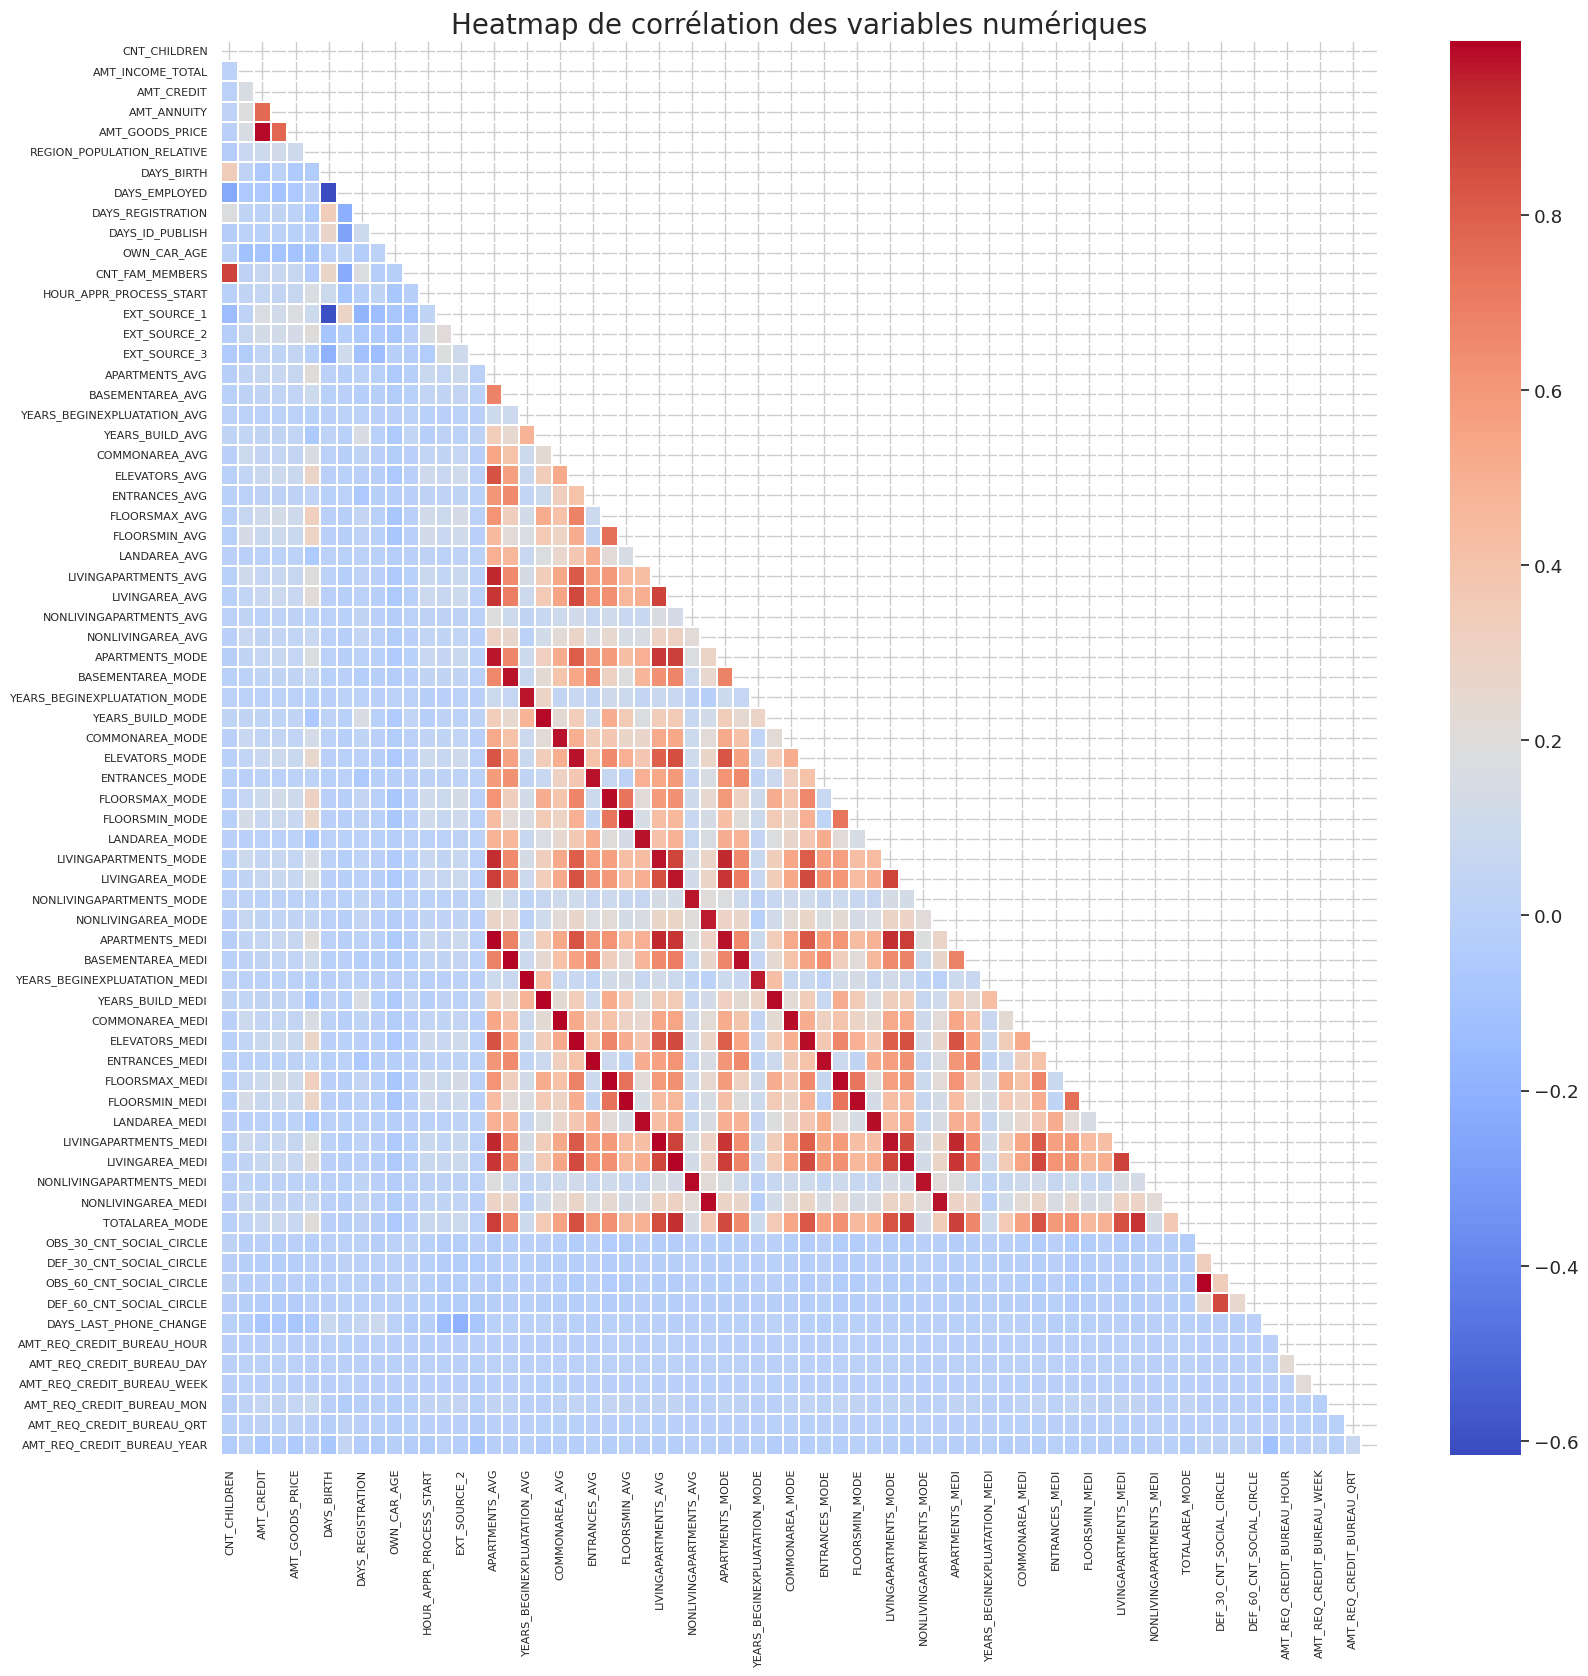

In [53]:
columns_to_drop = ['SK_ID_CURR'] + list(set(categorical_columns)
                                        - set(['TARGET']))
corr_mat = eda.correlation_matrix(application_train,
                                                   columns_to_drop,
                                                   figsize=(17, 17),
                                                   fontsize=8,
                                                   cmap='coolwarm')
corr_mat.plot_correlation_matrix()

In [54]:
# Voir les colonnes supérieures avec la plus haute corrélation phik avec
# la variable cible dans la table application_train
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 79)
titre1 = 'Les variables ayant les valeurs les plus élevées de Phik'
print(titre1 + '-corrélation avec la variable cible sont les suivantes :')
display(top_corr_target_df.style.hide())
print("-"*79)

interval columns not set, guessing: ['TARGET', 'CNT_CHILDREN']
interval columns not set, guessing: ['TARGET', 'AMT_INCOME_TOTAL']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT']
interval columns not set, guessing: ['TARGET', 'AMT_ANNUITY']
interval columns not set, guessing: ['TARGET', 'AMT_GOODS_PRICE']
interval columns not set, guessing: ['TARGET', 'REGION_POPULATION_RELATIVE']
interval columns not set, guessing: ['TARGET', 'DAYS_BIRTH']
interval columns not set, guessing: ['TARGET', 'DAYS_EMPLOYED']
interval columns not set, guessing: ['TARGET', 'DAYS_REGISTRATION']
interval columns not set, guessing: ['TARGET', 'DAYS_ID_PUBLISH']
interval columns not set, guessing: ['TARGET', 'OWN_CAR_AGE']
interval columns not set, guessing: ['TARGET', 'CNT_FAM_MEMBERS']
interval columns not set, guessing: ['TARGET', 'HOUR_APPR_PROCESS_START']
interval columns not set, guessing: ['TARGET', 'EXT_SOURCE_1']
interval columns not set, guessing: ['TARGET', 'EXT_SOURCE_2']
interval columns 

-------------------------------------------------------------------------------


**Bilan** :
***
- La carte thermique montre bien la valeur ou le niveau de corrélation que chaque variable particulière a avec toutes les autres caractéristiques.
- On peut observer que la plupart de la carte thermique contient une couleur bleue, ce qui indique une très faible valeur de corrélation. Cela implique que la plupart des caractéristiques ne sont effectivement pas corrélées aux autres.
- Cependant, nous pouvons voir des teintes contrastées au milieu de la carte thermique. Ces nuances représentent une valeur élevée de corrélation entre les caractéristiques. Ce sont les caractéristiques qui sont liées aux statistiques des appartements.
- Si nous regardons les variables de l'application_train, nous pouvons clairement voir que les statistiques des appartements sont données en termes de Moyenne, Médiane et Mode, donc on peut s'attendre à ce que la moyenne, la médiane et le mode soient corrélés entre eux. Il convient également de noter que les variables d'une catégorie particulière, par exemple la moyenne, sont également corrélées avec d'autres variables moyennes, telles que le nombre d'ascenseurs, la surface habitable, la surface non habitable, la surface du sous-sol, etc.
- Nous constatons également une forte corrélation entre :
    - AMT_GOODS_PRICE et AMT_CREDIT, 
    - et entre DAYS_EMPLOYED et DAYS_BIRTH.
- Nous ne voulons pas de variables fortement corrélées car elles augmentent la complexité temporelle du modèle sans lui apporter beaucoup de valeur. Par conséquent, nous supprimons les variables intercorrélées.
- Parmi toutes les variables, nous constatons une corrélation élevée pour les variables EXT_SOURCE par rapport à la variable cible. Celles-ci peuvent être importantes pour notre tâche de classification.

### <span style= ''>3.2 Fichier application_test.csv</span>

**Description**
***
- Le fichier **application_test.csv** est constituée de **données statiques relatives aux emprunteurs sans les étiquettes**. 
- Chaque ligne représente une demande de prêt.
- Le dataframe application_test.csv contient l'ensemble de données de test, et est similaire à l'application_train.csv, sauf que la colonne TARGET a été omise, qui doit être prédite à l'aide de modèles prédictifs statistiques et d'apprentissage automatique.

**Compréhension des variables**

In [55]:
eda.afficher_stats_basic(application_test)

-------------------------------------------------------------------------------
Le jeu de données contient 48744 lignes et 121 variables.
-------------------------------------------------------------------------------
Numbre de valeurs dupliquées dans application_train : 0
-------------------------------------------------------------------------------
Contenu des 3 premières lignes :


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      100001         Cash loans           F            N               Y             0          135000.0    568800.0      20560.5         450000.0   Unaccompanied          Working               Higher education            Married  House / apartment                      0.0188      -19241   
1      100005         Cash loans           M            N               Y             0           99000.0    222768.0      17370.0         180000.0   Unaccompanied          Working  Secondary / secondary special            Married  House / apartment                      0.0358      -18064   
2      100013         Cash loans           M            Y               Y             0          202500.0    663264.0      69777.0         630000.0             NaN          Working               Higher education            Married  House / apartment                      0.0191      -20038   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0          -2329            -5170.0             -812          NaN           1               1                0                 1           0           1                 NaN              2.0                     2                            2                    TUESDAY                       18   
1          -4469            -9118.0            -1623          NaN           1               1                0                 1           0           0  Low-skill Laborers              2.0                     2                            2                     FRIDAY                        9   
2          -4458            -2175.0            -3503          5.0           1               1                0                 1           0           0             Drivers              2.0                     2                            2                     MONDAY                       14   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0                           0                           0                            0                       0                       0                        0       Kindergarten        0.7526        0.7897        0.1595           0.066             0.059                       0.9732   
1                           0                           0                            0                       0                       0                        0      Self-employed        0.5650        0.2917        0.4330             NaN               NaN                          NaN   
2                           0                           0                            0                       0                       0                        0  Transport: type 3           NaN        0.6998        0.6110             NaN               NaN                          NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  \
0              NaN             NaN            NaN         0.1379          0.125            NaN           NaN                   NaN          0.0505                      NaN                NaN           

In [56]:
#Types des variabes 
application_test.dtypes

SK_ID_CURR                        int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [57]:
# résumé des varibales 

application_test.describe(include ='all').T

count unique                            top   freq         mean          std       min        25%       50%       75%        max
SK_ID_CURR                    48744.0    NaN                            NaN    NaN  277796.6763  103169.5473  100001.0  188557.75  277549.0  367555.5   456250.0
NAME_CONTRACT_TYPE              48744      2                     Cash loans  48305          NaN          NaN       NaN        NaN       NaN       NaN        NaN
CODE_GENDER                     48744      2                              F  32678          NaN          NaN       NaN        NaN       NaN       NaN        NaN
FLAG_OWN_CAR                    48744      2                              N  32311          NaN          NaN       NaN        NaN       NaN       NaN        NaN
FLAG_OWN_REALTY                 48744      2                              Y  33658          NaN          NaN       NaN        NaN       NaN       NaN        NaN
CNT_CHILDREN                  48744.0    NaN                            NaN    NaN       0.3971        0.709       0.0        0.0       0.0       1.0       20.0
AMT_INCOME_TOTAL              48744.0    NaN                            NaN    NaN  178431.8059  101522.5915   26941.5   112500.0  157500.0  225000.0  4410000.0
AMT_CREDIT                    48744.0    NaN                            NaN    NaN  516740.4356  365397.0042   45000.0   260640.0  450000.0  675000.0  2245500.0
AMT_ANNUITY                   48720.0    NaN                            NaN    NaN   29426.2402   16016.3683    2295.0    17973.0   26199.0   37390.5   180576.0
AMT_GOODS_PRICE               48744.0    NaN                            NaN    NaN  462618.8405   336710.215   45000.0   225000.0  396000.0  630000.0  2245500.0
NAME_TYPE_SUITE                 47833      7                  Unaccompanied  39727          NaN          NaN       NaN        NaN       NaN       NaN        NaN
NAME_INCOME_TYPE                48744      7                        Working  24533          NaN          NaN       NaN        NaN       NaN       NaN        NaN
NAME_EDUCATION_TYPE             48744      5  Secondary / secondary special  33988          NaN          NaN       NaN        NaN       NaN       NaN        NaN
NAME_FAMILY_STATUS              48744      5                        Married  32283          NaN          NaN       NaN        NaN       NaN       NaN        NaN
NAME_HOUSING_TYPE               48744      6              House / apartment  43645          NaN          NaN       NaN        NaN       NaN       NaN        NaN
REGION_POPULATION_RELATIVE    48744.0    NaN                            NaN    NaN       0.0212       0.0144    0.0003       0.01    0.0188    0.0287     0.0725
DAYS_BIRTH                    48744.0    NaN                            NaN    NaN  -16068.0846    4325.9004  -25195.0   -19637.0  -15785.0  -12496.0    -7338.0
DAYS_EMPLOYED                 48744.0    NaN                            NaN    NaN   67485.3663  144348.5071  -17463.0    -2910.0   -1293.0    -296.0   365243.0
DAYS_REGISTRATION             48744.0    NaN                            NaN    NaN   -4967.6527     3552.612  -23722.0   -7459.25   -4490.0   -1901.0        0.0
DAYS_ID_PUBLISH               48744.0    NaN                            NaN    NaN   -3051.7129    1569.2767   -6348.0    -4448.0   -3234.0   -1706.0        0.0
OWN_CAR_AGE                   16432.0    NaN                            NaN    NaN       11.786      11.4629       0.0        4.0       9.0      15.0       74.0
FLAG_MOBIL                    48744.0    NaN                            NaN    NaN          1.0       0.0045       0.0        1.0       1.0       1.0        1.0
FLAG_EMP_PHONE                48744.0    NaN                            NaN    NaN       0.8097       0.3925       0.0        1.0       1.0       1.0        1.0
FLAG_WORK_PHONE               48744.0    NaN                            NaN    NaN       0.2047       0.4035       0.0        0.0       0.0       0.0        1.0
FLAG_CO

**Bilan** :
***
- Le fichier application_test.csv contient environ **487000 enregistrements** et **121 variables**. 
- Ces variables sont exactement celles qui se trouvent dans le fichier application_train.csv, sauf qu'il s'agit des données de formation.
- Il y a 487000 SK_ID_CURR uniques qui représentent des demandes de prêt uniques.
- La colonne TARGET a été omise et doit être prédite à l'aide de modèles statistiques prédictifs et de modèles d'apprentissage automatique.

**Les valeurs Manquantes**

Nombre de variables avec valeurs manquantes : 64


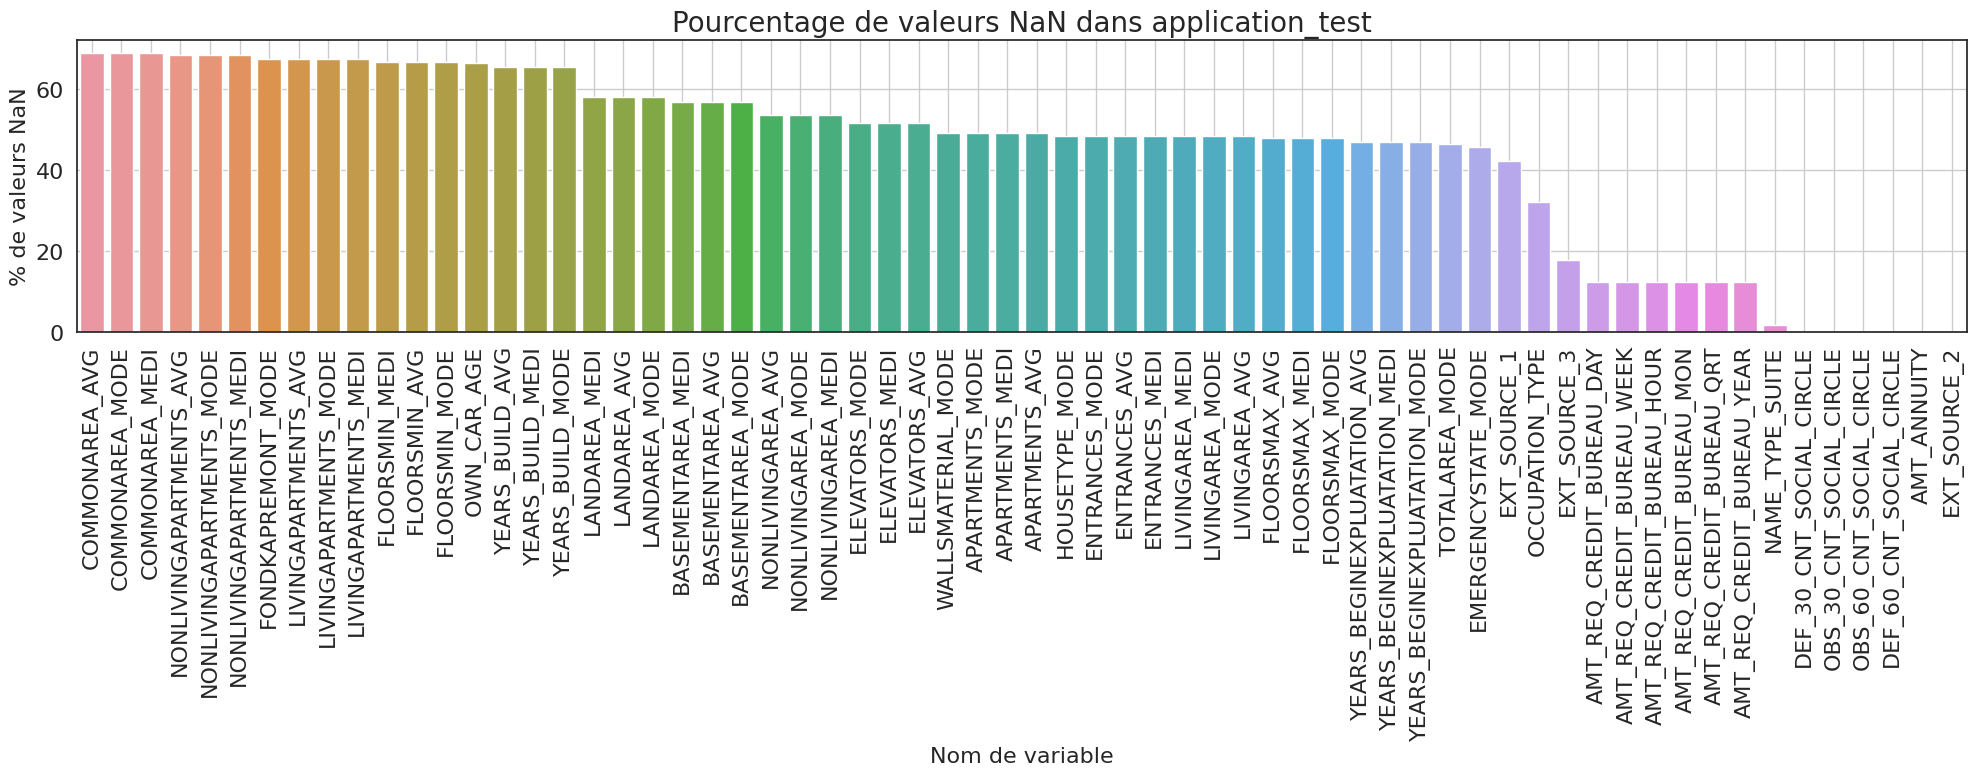

In [58]:
# Réprésentation visuelle des valeurs manquantes
df_nan_test = eda.nan_df_create(application_test)
eda.plot_nan_percent(df_nan_test, 'application_test',
                                      grid=True)

**Bilan** :
***
- Le nombre de variables avec des valeurs NaN est très similaire (64) à celui de l'application_train.
- Les pourcentages de valeurs NaN sont également assez similaires à ceux présents dans le jeu de données d'entraînement (train set). Cela signifie que les ensembles d'entraînement (train set) et de test (test set) ont une distribution assez similaire.

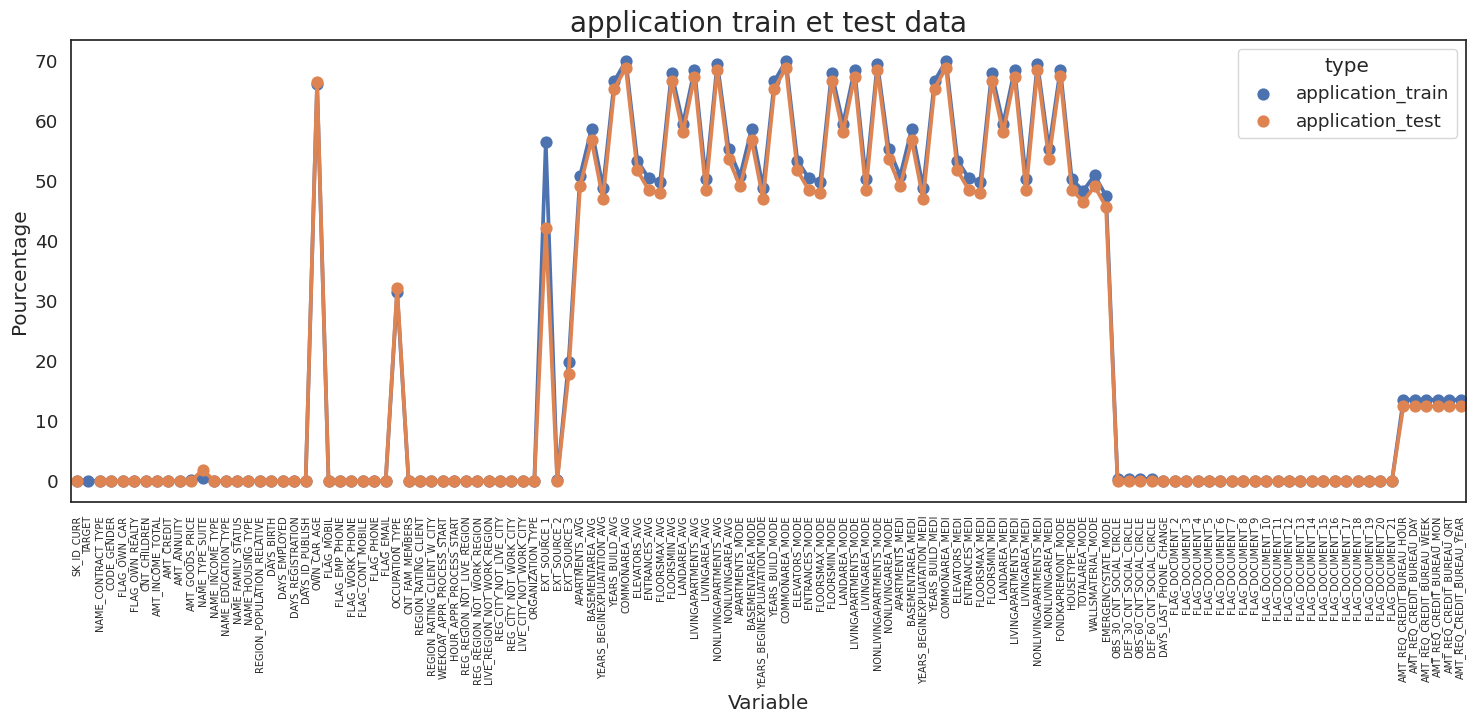

In [59]:
# Comparaison des pourcentages de NaN pour les application_train
# et application_test
fig = plt.figure(figsize=(18, 6))

miss_train = pd.DataFrame((application_train.isnull().sum()) * 100 /
                          application_train.shape[0]).reset_index()
miss_test = pd.DataFrame((application_test.isnull().sum()) * 100 /
                         application_test.shape[0]).reset_index()
miss_train['type'] = 'application_train'
miss_test['type'] = 'application_test'
missing = pd.concat([miss_train, miss_test], axis=0)
ax = sns.pointplot(x='index', y=0, data=missing, hue='type')
plt.xticks(rotation=90, fontsize=7)
var = 'Pourcentage de valeurs manquantes dans '
plt.title('application train et test data', fontsize=20)
plt.ylabel('Pourcentage')
plt.xlabel('Variable')
plt.show()

### <span style= ''>3.3 Fichier bureau.csv</span>

**Description**
***
- Ce fichier **bureau.csv** comprend tous les **antécédents de crédit antérieurs du demandeur auprès d'institutions financières autres que le Home Credit Group**, qui ont été signalés par le bureau de crédit.

**Compréhension des variables**

In [60]:
bureau.name = 'bureau'
application_train.name = 'application_train'
application_test.name = 'application_test'
eda.afficher_stats_basic_all(bureau, application_train,
                             application_test, 'SK_ID_BUREAU')

-------------------------------------------------------------------------------
Le jeu de données contient 1716428 lignes et 17 variables.
-------------------------------------------------------------------------------
Nombre de valeurs uniques SK_ID_BUREAU dans bureau.csv : 1716428
Nombre de valeurs uniques SK_ID_CURR dans bureau.csv : 305811
Nombre de valeurs communes SK_ID_CURR dans application_train.csv et bureau.csv : 263491
Nombre de valeurs communes SK_ID_CURR dans application_train.csv et bureau.csv : 42320
-------------------------------------------------------------------------------
Numbre de valeurs dupliquées dans bureau.csv : 0
-------------------------------------------------------------------------------
Contenu des 3 premières lignes :


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  DAYS_CREDIT_UPDATE  \
0      215354       5714462        Closed      currency 1         -497                   0               -153.0             -153.0                     NaN                   0         91323.0                  0.0                   NaN                     0.0  Consumer credit                -131   
1      215354       5714463        Active      currency 1         -208                   0               1075.0                NaN                     NaN                   0        225000.0             171342.0                   NaN                     0.0      Credit card                 -20   
2      215354       5714464        Active      currency 1         -203                   0                528.0                NaN                     NaN                   0        464323.5                  NaN                   NaN                     0.0  Consumer credit                 -16   
3      215354       5714465        Active      currency 1         -203                   0                  NaN                NaN                     NaN                   0         90000.0                  NaN                   NaN                     0.0      Credit card                 -16   
4      215354       5714466        Active      currency 1         -629                   0               1197.0                NaN                 77674.5                   0       2700000.0                  NaN                   NaN                     0.0  Consumer credit                 -21   

   AMT_ANNUITY  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [61]:
# Types des variables 
bureau.dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

In [62]:
# Résumé des variables 
bureau.describe(include = 'all').T

count unique              top     freq         mean          std         min         25%        50%         75%          max
SK_ID_CURR              1716428.0    NaN              NaN      NaN  278214.9336  102938.5581    100001.0   188866.75   278055.0    367426.0     456255.0
SK_ID_BUREAU            1716428.0    NaN              NaN      NaN  5924434.489  532265.7286   5000000.0  5463953.75  5926303.5  6385681.25    6843457.0
CREDIT_ACTIVE             1716428      4           Closed  1079273          NaN          NaN         NaN         NaN        NaN         NaN          NaN
CREDIT_CURRENCY           1716428      4       currency 1  1715020          NaN          NaN         NaN         NaN        NaN         NaN          NaN
DAYS_CREDIT             1716428.0    NaN              NaN      NaN   -1142.1077     795.1649     -2922.0     -1666.0     -987.0      -474.0          0.0
CREDIT_DAY_OVERDUE      1716428.0    NaN              NaN      NaN       0.8182      36.5444         0.0         0.0        0.0         0.0       2792.0
DAYS_CREDIT_ENDDATE     1610875.0    NaN              NaN      NaN     510.5174    4994.2198    -42060.0     -1138.0     -330.0       474.0      31199.0
DAYS_ENDDATE_FACT       1082775.0    NaN              NaN      NaN   -1017.4371     714.0106    -42023.0     -1489.0     -897.0      -425.0          0.0
AMT_CREDIT_MAX_OVERDUE   591940.0    NaN              NaN      NaN    3825.4177  206031.6062         0.0         0.0        0.0         0.0  115987185.0
CNT_CREDIT_PROLONG      1716428.0    NaN              NaN      NaN       0.0064       0.0962         0.0         0.0        0.0         0.0          9.0
AMT_CREDIT_SUM          1716415.0    NaN              NaN      NaN  354994.5919  1149811.344         0.0     51300.0   125518.5    315000.0  585000000.0
AMT_CREDIT_SUM_DEBT     1458759.0    NaN              NaN      NaN    137085.12   677401.131 -4705600.32         0.0        0.0     40153.5  170100000.0
AMT_CREDIT_SUM_LIMIT    1124648.0    NaN              NaN      NaN     6229.515   45032.0315 -586406.115         0.0        0.0         0.0   4705600.32
AMT_CREDIT_SUM_OVERDUE  1716428.0    NaN              NaN      NaN      37.9128      5937.65         0.0         0.0        0.0         0.0    3756681.0
CREDIT_TYPE               1716428     15  Consumer credit  1251615          NaN          NaN         NaN         NaN        NaN         NaN          NaN
DAYS_CREDIT_UPDATE      1716428.0    NaN              NaN      NaN    -593.7483     720.7473    -41947.0      -908.0     -395.0       -33.0        372.0
AMT_ANNUITY              489637.0    NaN              NaN      NaN   15712.7577  325826.9491         0.0         0.0        0.0     13500.0  118453423.5

**Bilan** :
***
- Le fichier bureau.csv contient près de 1,7 millions de points de données, avec 17 variables. 
- Parmi ces 17 variables, deux sont SK_ID_CURR et SK_ID_BUREAU.
    - SK_ID_BUREAU est l'identifiant du prêt précédent du demandeur auprès d'autres institutions financières. Il peut y avoir plusieurs prêts antérieurs correspondant à un seul SK_ID_CURR, ce qui dépend des habitudes d'emprunt du demandeur.
    - SK_ID_CURR est l'identifiant du prêt actuel du demandeur auprès de Home Credit.
- Le reste des variables contient d'autres statistiques telles que DAYS_CREDIT, AMT_CREDIT_SUM, CREDIT_TYPE, etc.
- Il y a 305000 SK_ID_CURR uniques dans le fichier bureau, parmi lesquels :
    - Il y a 263000 SK_ID_CURR dans le fichier  bureau qui sont présents dans application_train sur un total de 307000 de SK_ID_CURR uniques d'application_train. Cela signifie que certains des demandeurs dans la demande de prêt actuelle avec Home Credit Group n'ont pas d'antécédents de crédit avec le département du bureau de crédit.
- De même, il y a 42300 SK_ID_CURR dans le fichier bureau qui sont présents dans application_test, sur un total de 48000 de SK_ID_CURR uniques de application_test.

**Valeurs manquantes**

Nombre de variables avec valeurs manquantes : 7


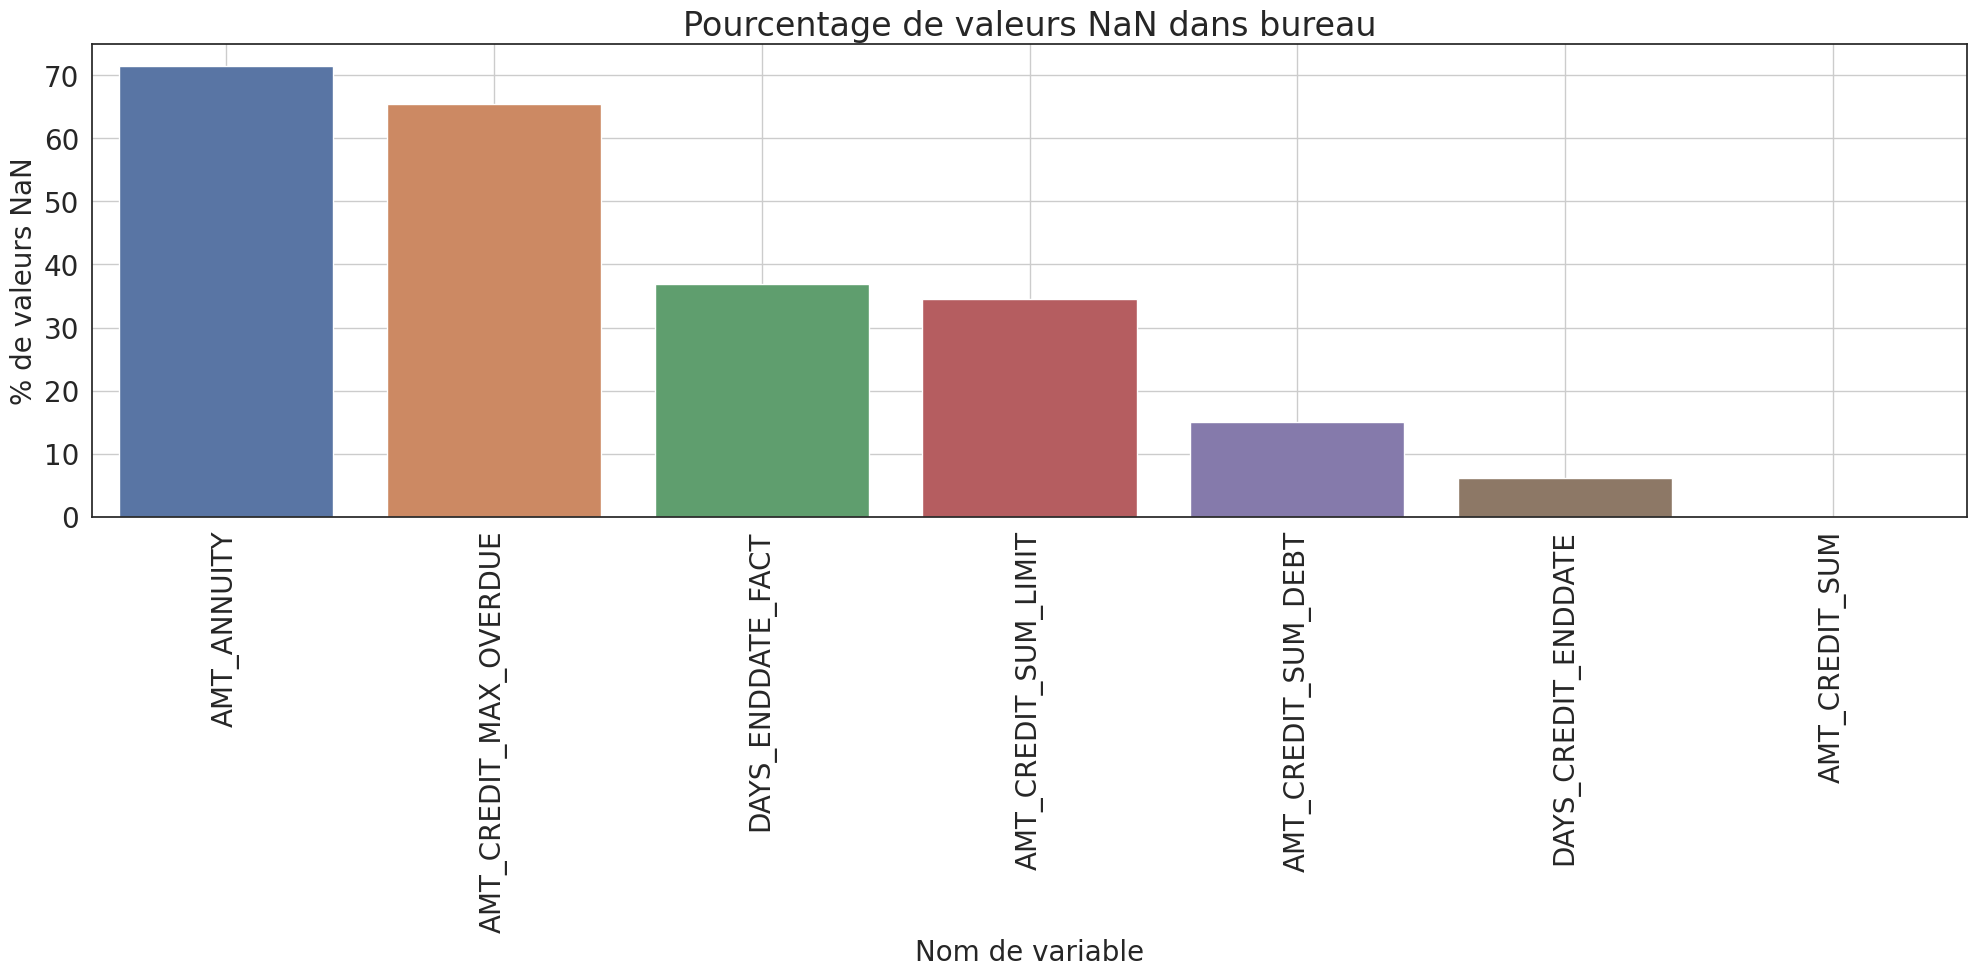

In [63]:
# Réprésentation visuelle des valeurs manquantes
df_nan_bureau = eda.nan_df_create(bureau)
eda.plot_nan_percent(df_nan_bureau, 'bureau',
                                      grid=True, fontsize=20,
                                      figsize=(20, 10))

**Bilan** :
***
- Sur les 17 variables, 7 contiennent des valeurs NaN.
- Les valeurs NaN les plus élevées sont observées avec la variable AMT_ANNUITY qui a plus de 70% de valeurs manquantes.

**Préparation du dataframe de travail**

In [64]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
print('Création dataframe de travail : merge TARGET avec dataframe bureau')
bureau_merged = application_train.iloc[:, :2].merge(bureau,
                                                    on='SK_ID_CURR',
                                                    how='left')
print("-"*79)

-------------------------------------------------------------------------------
Création dataframe de travail : merge TARGET avec dataframe bureau
-------------------------------------------------------------------------------


#### <span style= ''>3.3.1 Analyse Univariée</span>

Nous allons maintenant représenter graphiquement certaines des variables catégorielles du dataframe bureau, et voir leur impact sur la variable cible.

In [65]:
# Liste des variables qualitatives
cols_cat_bureau = \
    bureau.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_bureau

['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

**Variable CREDIT_ACTIVE**
***
Cette variable décrit l'état du prêt précédent rapporté par le bureau de crédit.

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'CREDIT_ACTIVE' sont :
['Closed' 'Active' nan 'Sold' 'Bad debt']
-------------------------------------------------------------------------------
Répartition dans chaque catégorie :
CREDIT_ACTIVE
Closed      917733
Active      541919
Sold          5653
Bad debt        20
Name: count, dtype: int64
-------------------------------------------------------------------------------
Nombre de catégories uniques pour CREDIT_ACTIVE = 5


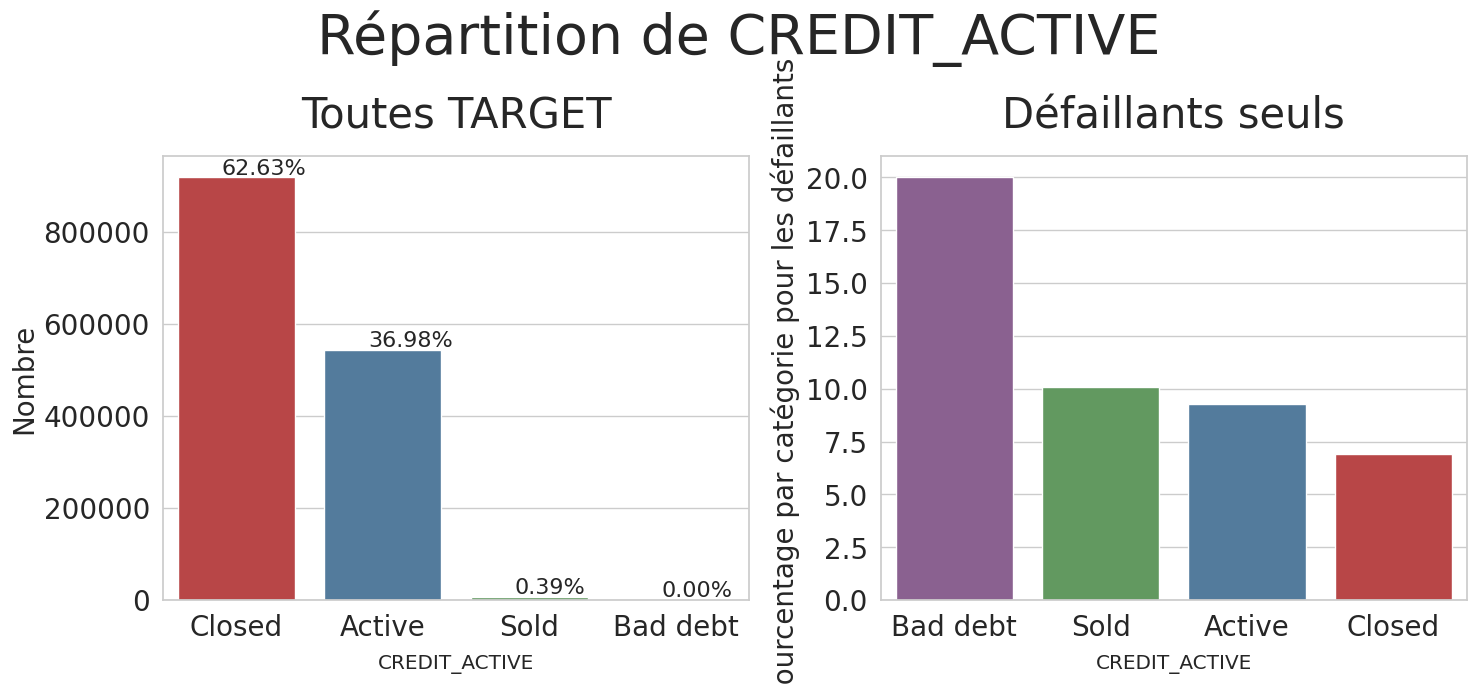

In [66]:
# Let us first see the unique categories of 'CREDIT_ACTIVE'
eda.print_unique_categories(bureau_merged,
                                             'CREDIT_ACTIVE',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda.plot_categorical_variables_bar(bureau_merged, column_name='CREDIT_ACTIVE',
                                   horizontal_adjust=0.3,
                                   figsize=(15, 7), fontsize_percent=16,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998'],
                                   palette2=['#905998', '#59a257',
                                             '#477ca8', '#cb3335'])

**Bilan** :
***
À partir du graphique ci-dessus, nous pouvons tirer les conclusions suivantes :

- Dans le premier sous-graphe, nous voyons que la majorité des prêts antérieurs d'autres institutions financières sont des prêts fermés (62,63%), suivis par 36,98% de prêts actifs. Les prêts vendus et les prêts pour créances douteuses sont très peu nombreux.
- Si nous examinons le pourcentage de défaillants par catégorie, nous constatons qu'environ 20 % des personnes ayant des créances douteuses ont fait défaut, ce qui représente le taux de défaillance le plus élevé. Cette catégorie est suivie par les prêts vendus et les prêts actifs. Le taux de défaillance le plus faible concerne les prêts fermés, qui témoignent d'un bon historique du demandeur. La courbe observée ici est donc tout à fait logique et attendue.

***Note*** :
***
Les 'Bad credit loans' sont destinés aux personnes dont le dossier de crédit est loin d'être irréprochable ou qui ont peu ou pas d'antécédents de crédit. Ces prêts ont généralement des taux d'intérêt plus élevés et des restrictions plus importantes que les autres prêts, car cela permet aux prêteurs de réduire le risque que vous ne les remboursiez pas. Cependant, ils peuvent être utiles s'ils sont gérés de manière responsable.

**Variable CREDIT_CURRENCY**
***
Cette variable décrit devise recodée du crédit du bureau de crédit.

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'CREDIT_CURRENCY' sont :
['currency 1' nan 'currency 2' 'currency 3' 'currency 4']
-------------------------------------------------------------------------------


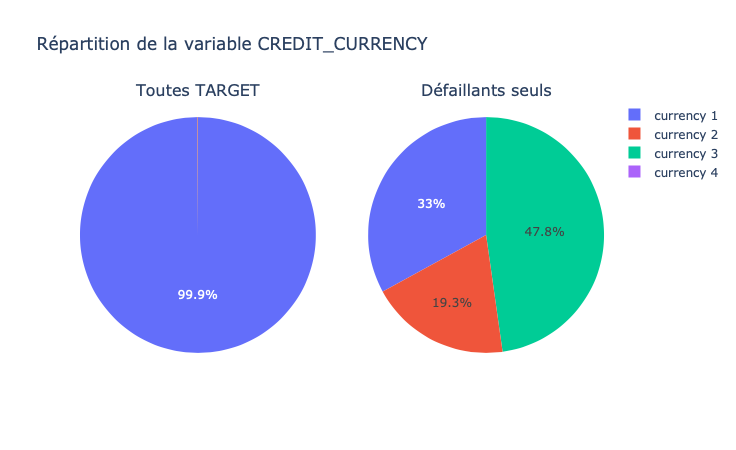

In [67]:
# Let us first see the unique categories of 'CREDIT_CURRENCY'
eda.print_unique_categories(bureau_merged,
                                             'CREDIT_CURRENCY')

# Plotting the Pie Plot for the Column
eda.plot_categorical_variables_pie(bureau_merged,
                                   column_name='CREDIT_CURRENCY')

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'CREDIT_CURRENCY' sont :
['currency 1' nan 'currency 2' 'currency 3' 'currency 4']
-------------------------------------------------------------------------------
Répartition dans chaque catégorie :
CREDIT_CURRENCY
currency 1    1464094
currency 2       1072
currency 3        150
currency 4          9
Name: count, dtype: int64
-------------------------------------------------------------------------------
Nombre de catégories uniques pour CREDIT_CURRENCY = 5


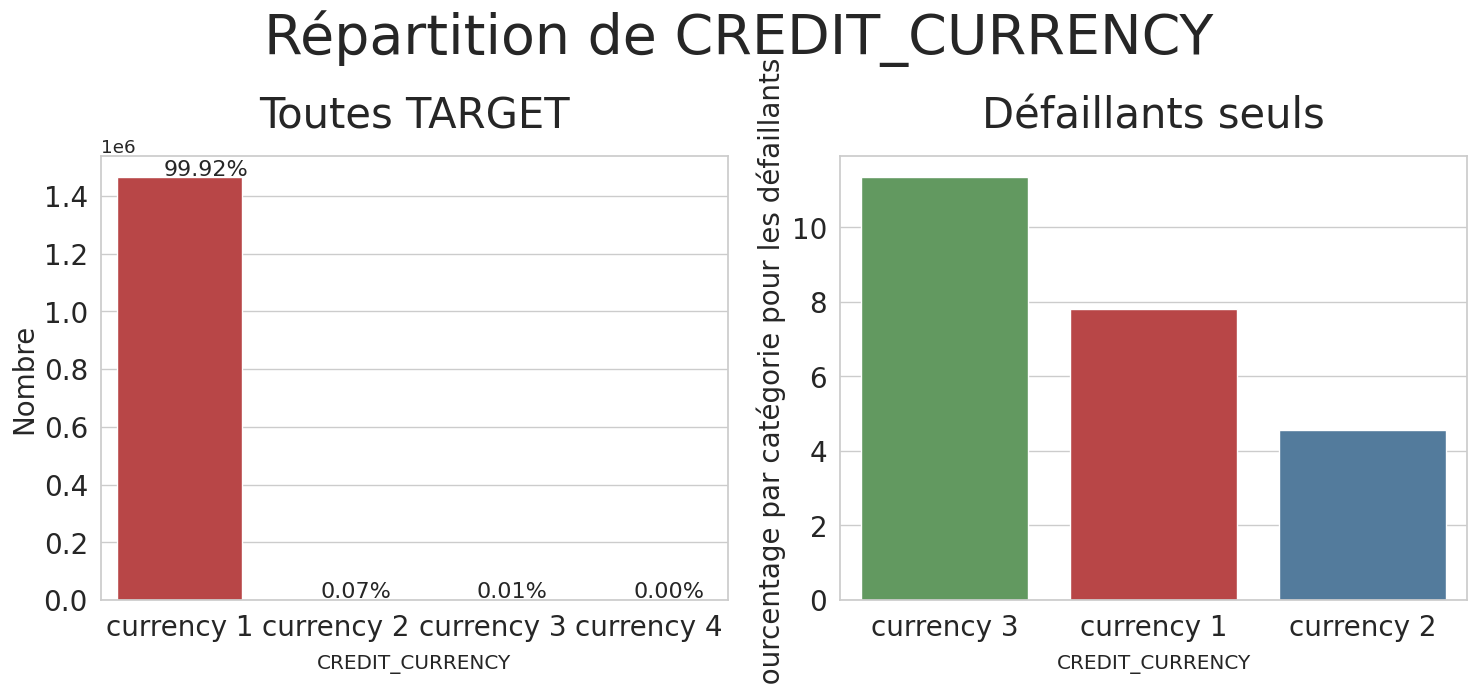

In [68]:
# Let us first see the unique categories of 'CREDIT_CURRENCY'
eda.print_unique_categories(bureau_merged,
                                             'CREDIT_CURRENCY',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda.plot_categorical_variables_bar(bureau_merged,
                                   column_name='CREDIT_CURRENCY',
                                   horizontal_adjust=0.3,
                                   figsize=(15, 7), fontsize_percent=16,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998'],
                                   palette2=['#59a257', '#cb3335',
                                             '#477ca8'])

**Bilan** :
***
À partir du graphique ci-dessus, nous pouvons tirer les conclusions suivantes :

- Dans le premier sous-graphe, nous voyons que la majorité des devises utilisées sont 'currency_1'.
- Si nous examinons le pourcentage de défaillants par catégorie, nous constatons qu'environ 11,5 % des personnes ayant des prêts avec la devise 'currency_3' ont été défaillants, ce qui représente le taux de défaillance le plus élevé. Cette catégorie est suivie par les devises currency_1 (8%) et currency_2 (4%). 

Les personnes utilisant les devises currency_2 et currency_3 ont plus de possibilités d'être défaillants.

**Variable CREDIT_TYPE**
***
Cette variable décrit le type de crédit au bureau de crédit (exemple :voiture, argent liquide...).

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'CREDIT_TYPE' sont :
['Credit card' 'Consumer credit' nan 'Loan for business development'
 'Microloan' 'Mortgage' 'Car loan'
 'Loan for working capital replenishment' 'Another type of loan'
 'Unknown type of loan' 'Loan for the purchase of equipment'
 'Cash loan (non-earmarked)' 'Real estate loan' 'Interbank credit'
 'Loan for purchase of shares (margin lending)' 'Mobile operator loan']
-------------------------------------------------------------------------------
Nombre de catégories uniques pour CREDIT_TYPE = 16


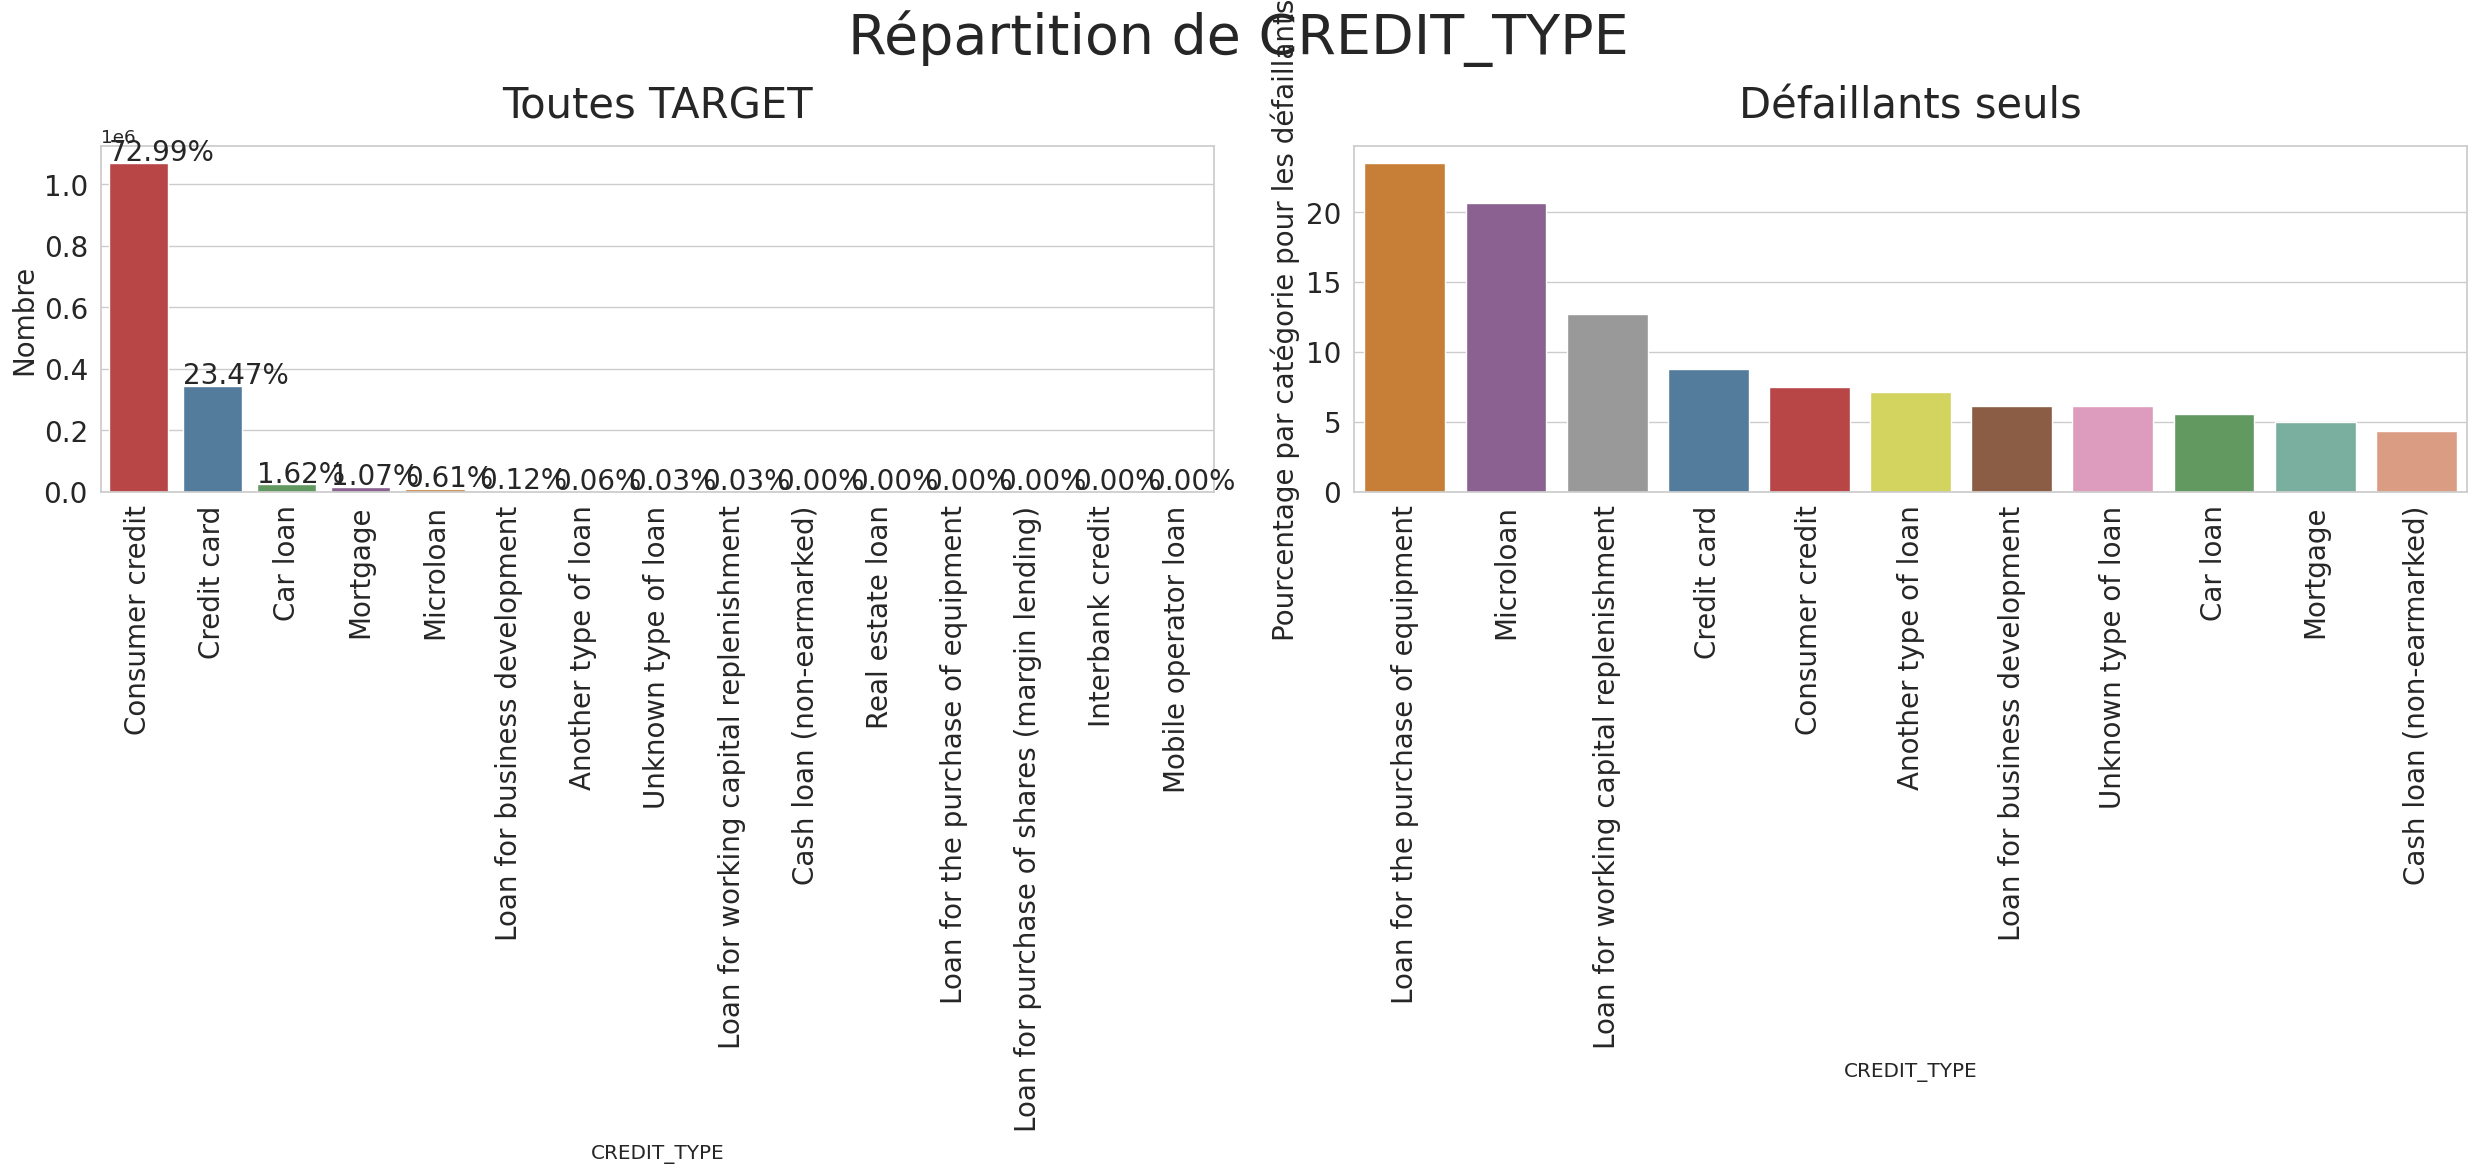

In [69]:
# Let us first see the unique categories of 'CREDIT_TYPE'
eda.print_unique_categories(bureau_merged,
                                             'CREDIT_TYPE')

# Plotting the Bar Plot for the Column
eda.plot_categorical_variables_bar(bureau_merged,
                                   column_name='CREDIT_TYPE',
                                   figsize=(25, 12), rotation=90,
                                   fontsize_percent=20,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38', '#e890be',
                                             '#999999', '#72b6a1',
                                             '#e99675', '#95a3c3',
                                             '#db96c0', '#a2c865',
                                             '#e5c949'],
                                   palette2=['#df7f20', '#905998',
                                             '#999999', '#477ca8',
                                             '#cb3335', '#e6e64c',
                                             '#965a38', '#e890be',
                                             '#59a257', '#72b6a1',
                                             '#e99675'])

**Bilan** :
***
À partir du graphique ci-dessus, nous pouvons tirer les conclusions suivantes :

- Dans le premier sous-graphe, nous voyons que la majorité des types de prêts des prêts à la consommation ou des cartes de crédit.
- Les défaillants ont recours à d'autres types de crédits : 30% pour l'achat de matériel, 20% pour des micro-crédits et 12,5% pour la reconstitution du fonds de roulement. 

Peut-on en déduire que les défaillants sont plus des auto-entreprenants qui remplacent du matériel et ont besoin de trésorerie pour payer les fournisseurs?

**Distribution des variables quantitatives**

In [70]:
# Liste des variables quantitatives
cols_num_bureau = \
    bureau.select_dtypes(include=[np.number]).columns.to_list()
cols_num_bureau

['SK_ID_CURR',
 'SK_ID_BUREAU',
 'DAYS_CREDIT',
 'CREDIT_DAY_OVERDUE',
 'DAYS_CREDIT_ENDDATE',
 'DAYS_ENDDATE_FACT',
 'AMT_CREDIT_MAX_OVERDUE',
 'CNT_CREDIT_PROLONG',
 'AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_LIMIT',
 'AMT_CREDIT_SUM_OVERDUE',
 'DAYS_CREDIT_UPDATE',
 'AMT_ANNUITY']

**Variable DAYS_CREDIT**
***
- Cette variable décrit le nombre de jours avant la demande actuelle, lorsque le demaneur a fait une demande de crédit au bureau de crédit.
- Pour faciliter l'interprétation, nous allons convertir ces jours en années.

-------------------------------------------------------------------------------
Pecentiles de la variable YEARS_CREDIT
Pecentile 0 = 0.0
Pecentile 25 = 1.2876712328767124
Pecentile 50 = 2.6986301369863015
Pecentile 75 = 4.578082191780822
Pecentile 90 = 6.706849315068493
Pecentile 92 = 6.945205479452055
Pecentile 94 = 7.183561643835616
Pecentile 96 = 7.4301369863013695
Pecentile 98 = 7.712328767123288
Pecentile 100 = 8.005479452054795
-------------------------------------------------------------------------------


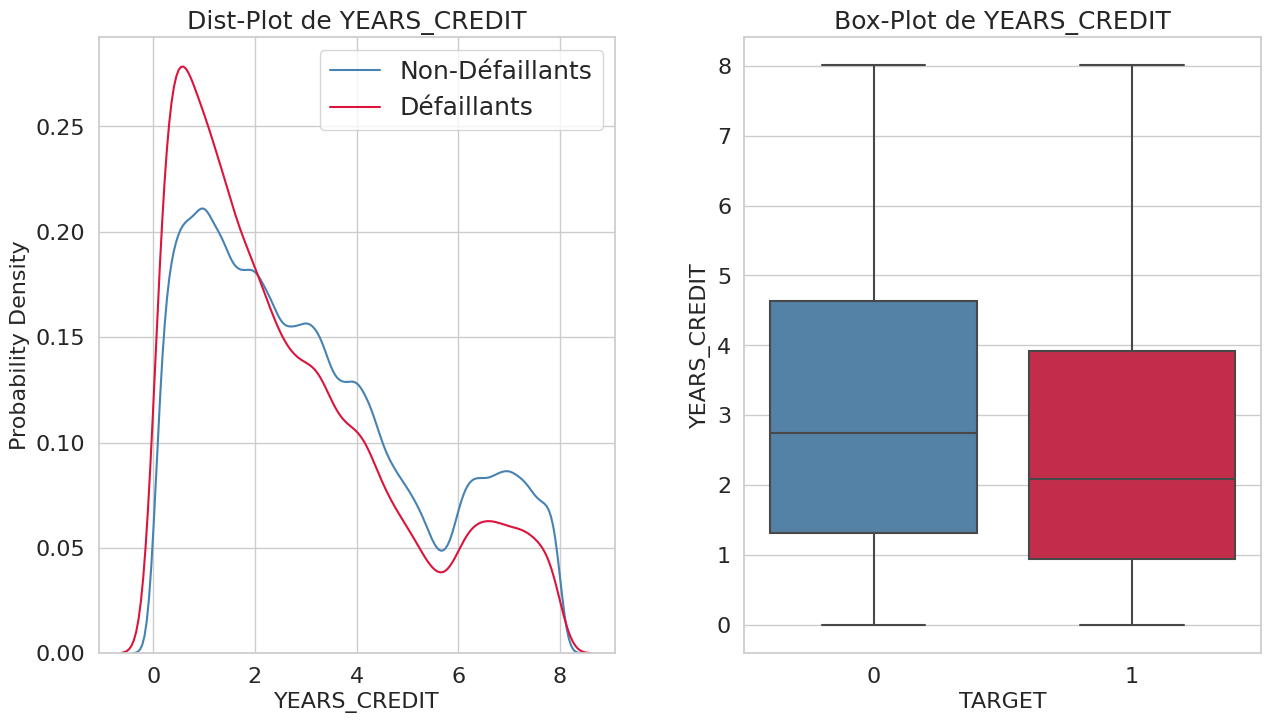

In [71]:
# Transformer en années à partir du nombre de jours
bureau_merged['YEARS_CREDIT'] = \
    bureau_merged['DAYS_CREDIT'] * -1 / 365
# Affiche les quantiles
eda.print_percentiles(bureau_merged, 'YEARS_CREDIT')
# Affiche boxplot, distplot
eda.plot_continuous_variables(bureau_merged,
                                               'YEARS_CREDIT',
                                               plots=['distplot', 'box'],
                                               figsize=(15, 8))
# Suppression de la variable nouvellement ajoutée
_ = bureau_merged.pop('YEARS_CREDIT')

**Bilan** :
***
A partir des graphiques ci-dessus, nous voyons que :

- D'après le PDF, nous constatons que les défaillants ont tendance à avoir des pics plus élevés que les non-défaillants lorsque le nombre d'années est inférieur. Cela implique que les demandeurs qui ont fait une demande de prêt au Bureau de crédit récemment ont montré une plus grande tendance à la défaillance que ceux qui ont fait une demande il y a longtemps. Le PDF des défaillants est également un peu plus à gauche que celui des non-défaillants.
- Sur le boxplot, nous voyons que les défaillants ont généralement moins d'années de crédit que les non-défaillants.

**Variable DAYS_CREDIT_ENDDATE**
***
Cette variable indique la durée restante du crédit du Bureau de crédit au moment de la demande de prêt en crédit immobilier.

-------------------------------------------------------------------------------
Pecentiles de la variable DAYS_CREDIT_ENDDATE
Pecentile 0 = -42060.0
Pecentile 2 = -2487.0
Pecentile 4 = -2334.0
Pecentile 6 = -2202.0
Pecentile 8 = -2073.9199999999983
Pecentile 10 = -1939.0
Pecentile 25 = -1144.0
Pecentile 50 = -334.0
Pecentile 75 = 473.0
Pecentile 100 = 31199.0
-------------------------------------------------------------------------------


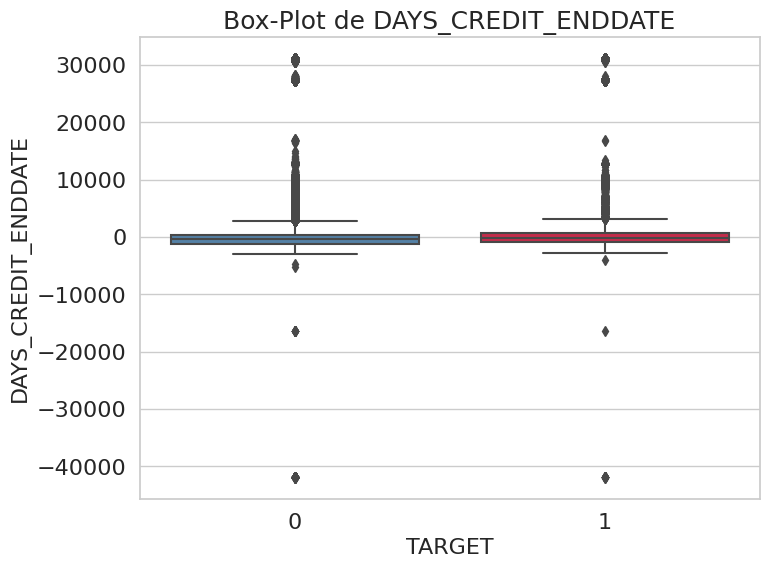

In [72]:
# Affiche les quantiles
eda.print_percentiles(bureau_merged, 'DAYS_CREDIT_ENDDATE',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche boxplot
eda.plot_continuous_variables(bureau_merged,
                                               'DAYS_CREDIT_ENDDATE',
                                               plots=['box'], figsize=(8, 6))

**Bilan** :
***
- À partir des valeurs de quantile ci-dessus, et en regardant le boxplot, nous constatons qu'il semble y avoir une valeur erronée pour DAYS_CREDIT_ENDDATE, où la valeur du 0e quantile remonte jusqu'à 42060 jours ou 115 ans. Cela n'a pas beaucoup de sens car cela implique que le précédent prêt du demandeur remonte à 115 ans. 
- Il pourrait également s'agir d'un prêt hérité, mais nous ne pouvons pas nous prononcer à ce sujet.

Nous essaierons d'éliminer ces valeurs lors de l'étape de prétraitement des données.

**Variable DAYS_ENDDATE_FACT**
***
- Cette variable indique le nombre de jours depuis lesquels le crédit du Bureau de Credit a été clôturé au moment de la demande de prêt du crédit immobilier. 
- Ces valeurs ne concernent que les crédits fermés.

-------------------------------------------------------------------------------
Pecentiles de la variable DAYS_ENDDATE_FACT
Pecentile 0 = -42023.0
Pecentile 2 = -2561.0
Pecentile 4 = -2450.0
Pecentile 6 = -2351.0
Pecentile 8 = -2265.0
Pecentile 10 = -2173.0
Pecentile 25 = -1503.0
Pecentile 50 = -900.0
Pecentile 75 = -427.0
Pecentile 100 = 0.0
-------------------------------------------------------------------------------


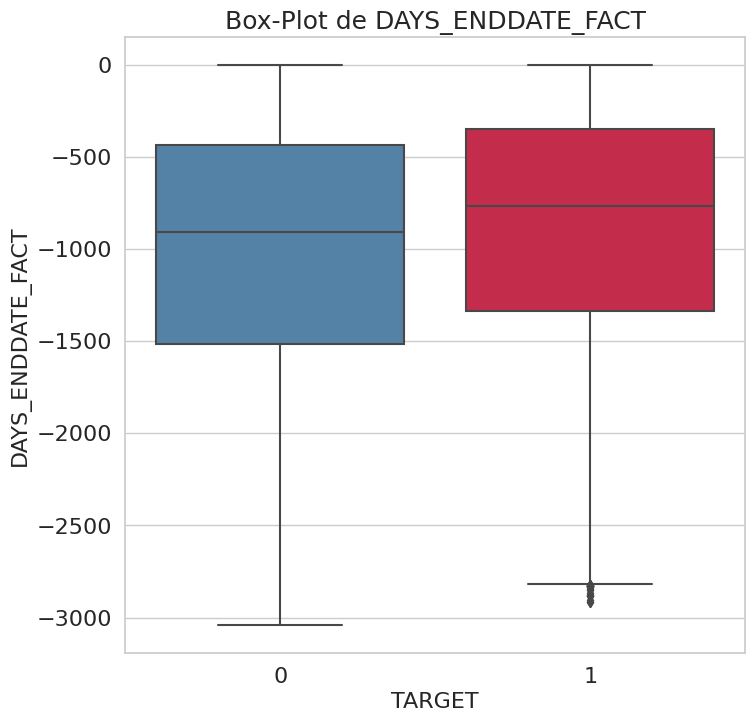

In [73]:
# Affiche les quantiles
eda.print_percentiles(bureau_merged, 'DAYS_ENDDATE_FACT',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche boxplot
eda.plot_continuous_variables(bureau_merged,
                                               'DAYS_ENDDATE_FACT',
                                               plots=['box'],
                                               figsize=(8, 8),
                                               scale_limits=[-40000, 0])

**Bilan** :
***
- Tout comme la colonne précédente, nous constatons que le 0e quantile de cette variable semble également erroné, soit 42023 jours ou ~115 ans. Nous devrions supprimer ces valeurs, car elles n'ont pas beaucoup de sens.
- Sur le boxplot, nous voyons que les défaillants ont tendance à avoir un nombre de jours inférieur depuis que leur crédit au Bureau du Crédit a pris fin. 
- Les non-défaillants ont généralement leur crédit précédent terminé plus longtemps avant que les défaillants.

#### <span style= ''>3.3.2 Analyse Multivariée</span>

**Corrélation entre mes variables catégorielles**

-------------------------------------------------------------------------------


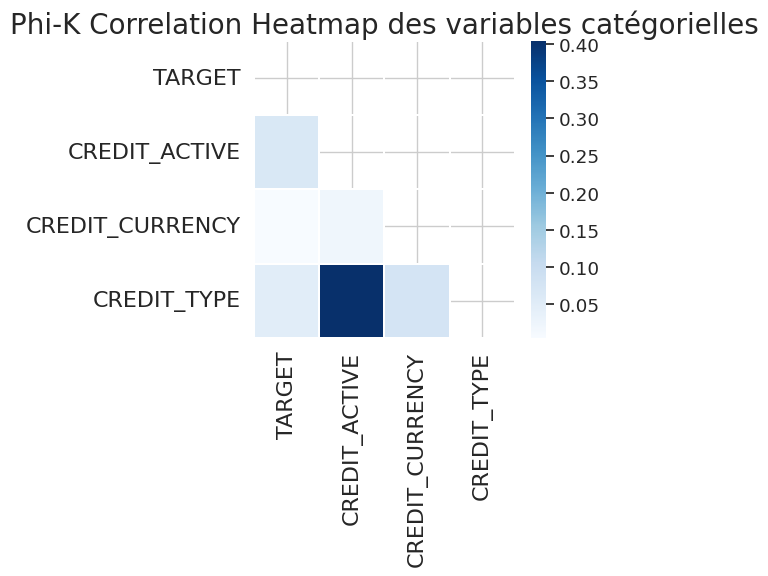

-------------------------------------------------------------------------------
Les catégories présentant les valeurs les plus élevées de la corrélation Phi-K avec la variable cible sont les suivantes :


-------------------------------------------------------------------------------


In [74]:
cols_for_phik = ['TARGET', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
                 'CREDIT_TYPE']
eda.plot_phik_matrix(bureau_merged, cols_for_phik,
                                      figsize=(6, 6), fontsize=16)

**Bilan** :
***
La carte thermique ci-dessus montre les valeurs de corrélation Phi-K entre les valeurs catégorielles.

- D'après le coefficient de corrélation Phi-K, nous voyons que la variable CREDIT_TYPE présente une certaine association avec la variable CREDIT_ACTIVE.
- Nous voyons que les variables catégorielles n'ont pas vraiment une association élevée avec la variable TARGET, en particulier la caractéristique CREDIT_CURRENCY.

**Corrélation entre les variables numériques**

In [75]:
categorical_columns = ['SK_ID_CURR', 'SK_ID_BUREAU']

In [76]:
#data_for_phik = bureau_merged[categorical_columns].astype('object')
#phik_matrix = data_for_phik.phik_matrix()

### <span style= ''>3.4 Fichier bureau_balance.csv</span>

- Ce fichier **bureau_balance.csv** est constitué du solde mensuel de chaque crédit pour chacun des crédits précédents que le demandeur a eu avec des institutions financières autres que Home Credit.

In [77]:
eda.afficher_stats_basic(bureau_balance, 'bureau_balance')

-------------------------------------------------------------------------------
Le jeu de données contient 27299925 lignes et 3 variables.
-------------------------------------------------------------------------------
Numbre de valeurs dupliquées dans bureau_balance : 0
-------------------------------------------------------------------------------
Contenu des 3 premières lignes :


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C

In [78]:
print("-"*79)
val = len(bureau_balance.SK_ID_BUREAU.unique())
print(f'Nombre de valeurs uniques SK_ID_BUREAU : {val}')
print('-'*79)
val1 = len(bureau_balance.STATUS.unique())
val2 = bureau_balance.STATUS.unique()
print(f'Nombre de valeurs uniques STATUS : {val1}')
print(f"Liste des valeurs uniques de STATUS :\n{val2}")
print('-'*79)
val3 = np.abs(bureau_balance.MONTHS_BALANCE.min())
print(f"Nombre maximal de mois pour le solde des mois : {val3}")
print('-'*79)

-------------------------------------------------------------------------------
Nombre de valeurs uniques SK_ID_BUREAU : 817395
-------------------------------------------------------------------------------
Nombre de valeurs uniques STATUS : 8
Liste des valeurs uniques de STATUS :
['C' '0' 'X' '1' '2' '3' '5' '4']
-------------------------------------------------------------------------------
Nombre maximal de mois pour le solde des mois : 96
-------------------------------------------------------------------------------


In [79]:
# Type des variables
bureau_balance.dtypes

SK_ID_BUREAU       int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [80]:
# Description des variables 
bureau_balance.describe(include = 'all').T

count unique  top      freq         mean          std        min        25%        50%        75%        max
SK_ID_BUREAU    27299925.0    NaN  NaN       NaN  6036297.333  492348.8569  5001709.0  5730933.0  6070821.0  6431951.0  6842888.0
MONTHS_BALANCE  27299925.0    NaN  NaN       NaN     -30.7417      23.8645      -96.0      -46.0      -25.0      -11.0        0.0
STATUS            27299925      8    C  13646993          NaN          NaN        NaN        NaN        NaN        NaN        NaN

**Bilan** :
***
- Le fichier bureau_balance.csv contient environ 27,29 millions de lignes et 3 variables.
- Ce fichier contient le statut mensuel de chacun des prêts précédents pour un demandeur particulier, rapporté par le département du Bureau de crédit.
- Il y a 8 valeurs uniques pour le STATUS qui sont codées. Chacune d'entre elles a une signification particulière :
    - C signifie fermé,
    - X signifie statut inconnu,
    - 0 signifie pas de DPD,
    - 1 signifie DPD maximal pendant le mois entre 1-30,
    - 2 signifie DPD 31-60,...
    - 5 signifie DPD 120+ ou vendu ou radié.
- Le solde du mois le plus ancien que nous avons est le statut de 96 mois en arrière, c'est-à-dire que le statut a été fourni jusqu'à 8 ans d'historique pour les prêts pour lesquels ils existent.

**Valeurs manquantes**

In [81]:
# Réprésentation visuelle des valeurs manquantes
df_nan_bureau_bal = eda.nan_df_create(bureau_balance)
eda.plot_nan_percent(df_nan_bureau_bal, 'bureau_balance',
                                      grid=True, fontsize=20,
                                      figsize=(20, 10))

Le dataframe bureau_balance ne contient pas de valeurs manquantes.


**Bilan** :
***
- Aucune donnée manquante.

**Préparation du dataframe de travail**

In [82]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
print('Création dataframe de travail : merge TARGET avec dataframe bureau')
bureau_merged = application_train.iloc[:, :2].merge(bureau,
                                                    on='SK_ID_CURR',
                                                    how='left')
print("-"*79)

-------------------------------------------------------------------------------
Création dataframe de travail : merge TARGET avec dataframe bureau
-------------------------------------------------------------------------------


#### <span style= ''>3.4.1 Analyse Univariée</span>

Nous allons maintenant représenter graphiquement certaines des variables catégorielles du dataframe bureau_balance, et voir leur impact sur la variable cible.

In [83]:
# Liste des variables qualitatives
cols_cat_bureau_bal = \
    bureau_balance.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_bureau_bal

['STATUS']

**variable STATUS**

Statut du prêt du Bureau du crédit durant le mois (actif ou fermé ou DPD0-30... :
- C signifie fermé,
- X signifie état inconnu,
- 0 signifie pas de DPD,
- 1 signifie DPD maximal durant le mois entre 1-30,
- 2 signifie DPD 31-60...,
- 5 signifie DPD 120+ ou vendu ou amorti.

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'STATUS' sont :
['C' '0' 'X' '1' '2' '3' '5' '4']
-------------------------------------------------------------------------------
Répartition dans chaque catégorie :
STATUS
C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: count, dtype: int64
-------------------------------------------------------------------------------
Nombre de catégories uniques pour STATUS = 8


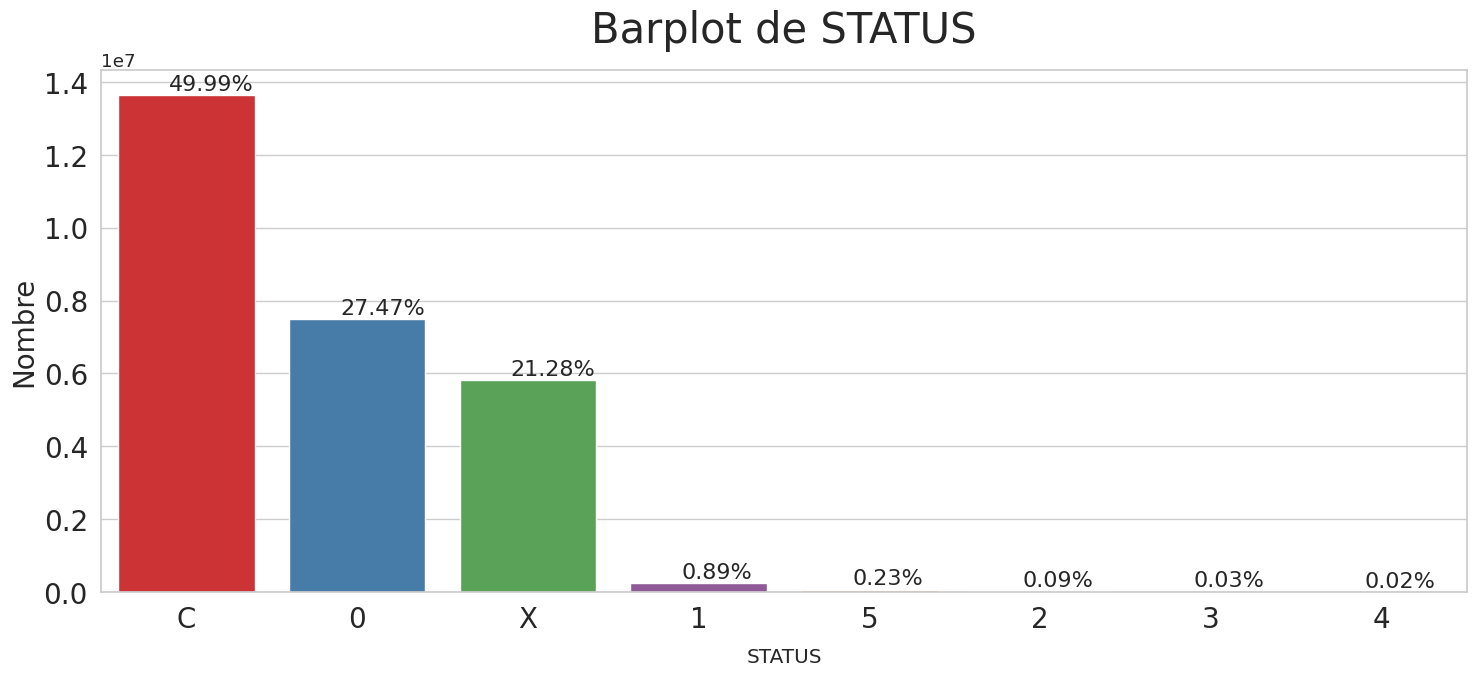

In [84]:
# Let us first see the unique categories of 'STATUS'
eda.print_unique_categories(bureau_balance,
                                             'STATUS',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda.plot_categorical_variable_bar(bureau_balance, column_name='STATUS',
                                  horizontal_adjust=0.3,
                                  figsize=(15, 7), fontsize_percent=16)

**Bilan** :
***
- Les états des prêts les plus rencontrés sont :
    - C pour prêt fermé (50%),
    - 0 pour 'pas de DPD' (27,5%),
    - X signifie état inconnu (21%).
    - le reste se partage entre les états 1 à 5.
- Plus de 21% des prêts sont dans l'état inconnu.

In [85]:
# Liste des variables quantitatives
cols_num = \
    bureau_balance.select_dtypes(include=[np.number]).columns.to_list()
cols_num

['SK_ID_BUREAU', 'MONTHS_BALANCE']

**Variable MONTHS_BALANCE**
***
- Mois du solde par rapport à la date de la demande :
    - -1 signifie que l'information correspond à l'instantané mensuel le plus récent 
    - 0 signifie que l'information correspond à la date de la demande 
- Il s'agit souvent de la même valeur que -1 car de nombreuses banques ne mettent pas régulièrement à jour les informations fournies au Bureau de crédit.

-------------------------------------------------------------------------------
Pecentiles de la variable MONTHS_BALANCE
Pecentile 0 = -96.0
Pecentile 2 = -87.0
Pecentile 4 = -81.0
Pecentile 6 = -76.0
Pecentile 8 = -72.0
Pecentile 10 = -68.0
Pecentile 25 = -46.0
Pecentile 50 = -25.0
Pecentile 75 = -11.0
Pecentile 100 = 0.0
-------------------------------------------------------------------------------


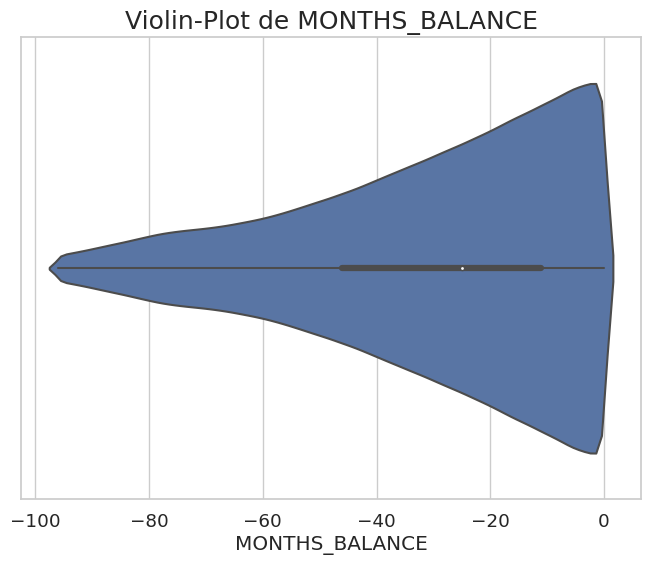

In [86]:
# Affiche les quantiles
eda.print_percentiles(bureau_balance, 'MONTHS_BALANCE',
                      percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche violinplot
eda.plot_continuous_variable(bureau_balance,
                                              'MONTHS_BALANCE',
                                              plots=['violin'],
                                              figsize=(8, 6))

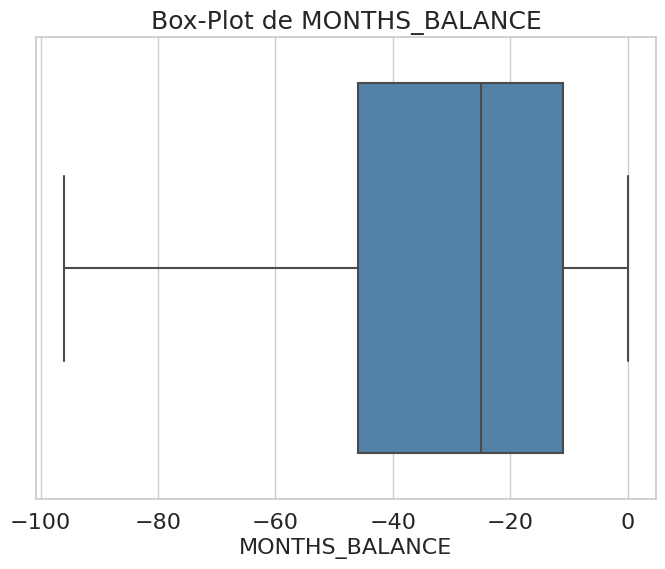

In [87]:
# Affiche boxplot
eda.plot_continuous_variable(bureau_balance,
                                              'MONTHS_BALANCE',
                                              plots=['box'],
                                              figsize=(8, 6))

**Bilan**:
***
- La médiane est à -25 mois.

### <span style= ''>3.5 Fichier credit_card_balance.csv</span>

- Ce fichier **credit_card_balance.csv** comprend les données mensuelles relatives à une ou plusieurs cartes de crédit que le demandeur avait auprès de Home Credit Group.
- Le fichier contient des champs tels que le solde, la limite de crédit, le montant des prélèvements, etc. pour chaque mois de la carte de crédit.

In [88]:
application_train.name = 'application_train'
application_test.name = 'application_test'
cc_balance.name = 'credit_card_balance'
eda.afficher_stats_basic_all(cc_balance, application_train,
                             application_test, 'SK_ID_PREV')

-------------------------------------------------------------------------------
Le jeu de données contient 3840312 lignes et 23 variables.
-------------------------------------------------------------------------------
Nombre de valeurs uniques SK_ID_PREV dans credit_card_balance.csv : 104307
Nombre de valeurs uniques SK_ID_CURR dans credit_card_balance.csv : 103558
Nombre de valeurs communes SK_ID_CURR dans application_train.csv et credit_card_balance.csv : 86905
Nombre de valeurs communes SK_ID_CURR dans application_train.csv et credit_card_balance.csv : 16653
-------------------------------------------------------------------------------
Numbre de valeurs dupliquées dans credit_card_balance.csv : 0
-------------------------------------------------------------------------------
Contenu des 3 premières lignes :


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  \
0     2562384      378907              -6       56.970                   135000                       0.0                 877.5                         0.0                     877.5                 1700.325               1800.0                     1800.0                     0.000          0.000   
1     2582071      363914              -1    63975.555                    45000                    2250.0                2250.0                         0.0                       0.0                 2250.000               2250.0                     2250.0                 60175.080      64875.555   
2     1740877      371185              -7    31815.225                   450000                       0.0                   0.0                         0.0                       0.0                 2250.000               2250.0                     2250.0                 26926.425      31460.085   
3     1389973      337855              -4   236572.110                   225000                    2250.0                2250.0                         0.0                       0.0                11795.760              11925.0                    11925.0                224949.285     233048.970   
4     1891521      126868              -1   453919.455                   450000                       0.0               11547.0                         0.0                   11547.0                22924.890              27000.0                    27000.0                443044.395     453919.455   

   AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                 0.000                       0.0                     1                         0.0                       1.0                       35.0               Active       0           0  
1             64875.555                       1.0                     1                         0.0                       0.0                       69.0               Active       0           0  
2             31460.085                       0.0                     0                         0.0                       0.0                       30.0               Active       0           0  
3            233048.970                       1.0                     1                         0.0                       0.0                       10.0               Active       0           0  
4            453919.455                       0.0                     1                         0.0                       1.0                      101.0               Active       0           0

In [89]:
# Type des variables
cc_balance.dtypes

SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT            int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS           object
SK_DPD                          int64
SK_DPD_DEF                      int64
dtype: object

In [90]:
# Description des variables 
cc_balance.describe(include = 'all').T

count unique     top     freq          mean          std         min        25%        50%         75%          max
SK_ID_PREV                  3840312.0    NaN     NaN      NaN  1904503.5899  536469.4706   1000018.0  1434385.0  1897122.0  2369327.75    2843496.0
SK_ID_CURR                  3840312.0    NaN     NaN      NaN   278324.2073  102704.4751    100006.0   189517.0   278396.0    367580.0     456250.0
MONTHS_BALANCE              3840312.0    NaN     NaN      NaN      -34.5219      26.6678       -96.0      -55.0      -28.0       -11.0         -1.0
AMT_BALANCE                 3840312.0    NaN     NaN      NaN    58300.1553   106307.031 -420250.185        0.0        0.0  89046.6862  1505902.185
AMT_CREDIT_LIMIT_ACTUAL     3840312.0    NaN     NaN      NaN   153807.9574  165145.6995         0.0    45000.0   112500.0    180000.0    1350000.0
AMT_DRAWINGS_ATM_CURRENT    3090496.0    NaN     NaN      NaN     5961.3248   28225.6886    -6827.31        0.0        0.0         0.0    2115000.0
AMT_DRAWINGS_CURRENT        3840312.0    NaN     NaN      NaN     7433.3882   33846.0773    -6211.62        0.0        0.0         0.0  2287098.315
AMT_DRAWINGS_OTHER_CURRENT  3090496.0    NaN     NaN      NaN      288.1696    8201.9893         0.0        0.0        0.0         0.0    1529847.0
AMT_DRAWINGS_POS_CURRENT    3090496.0    NaN     NaN      NaN     2968.8048    20796.887         0.0        0.0        0.0         0.0   2239274.16
AMT_INST_MIN_REGULARITY     3535076.0    NaN     NaN      NaN     3540.2041    5600.1541         0.0        0.0        0.0   6633.9112   202882.005
AMT_PAYMENT_CURRENT         3072324.0    NaN     NaN      NaN    10280.5377    36078.085         0.0     152.37     2702.7      9000.0  4289207.445
AMT_PAYMENT_TOTAL_CURRENT   3840312.0    NaN     NaN      NaN     7588.8567   32005.9878         0.0        0.0        0.0      6750.0   4278315.69
AMT_RECEIVABLE_PRINCIPAL    3840312.0    NaN     NaN      NaN    55965.8769  102533.6168  -423305.82        0.0        0.0    85359.24  1472316.795
AMT_RECIVABLE               3840312.0    NaN     NaN      NaN    58088.8112  105965.3699 -420250.185        0.0        0.0  88899.4912  1493338.185
AMT_TOTAL_RECEIVABLE        3840312.0    NaN     NaN      NaN    58098.2855  105971.8011 -420250.185        0.0        0.0    88914.51  1493338.185
CNT_DRAWINGS_ATM_CURRENT    3090496.0    NaN     NaN      NaN        0.3094       1.1004         0.0        0.0        0.0         0.0         51.0
CNT_DRAWINGS_CURRENT        3840312.0    NaN     NaN      NaN        0.7031       3.1903         0.0        0.0        0.0         0.0        165.0
CNT_DRAWINGS_OTHER_CURRENT  3090496.0    NaN     NaN      NaN        0.0048       0.0826         0.0        0.0        0.0         0.0         12.0
CNT_DRAWINGS_POS_CURRENT    3090496.0    NaN     NaN      NaN        0.5595       3.2406         0.0        0.0        0.0         0.0        165.0
CNT_INSTALMENT_MATURE_CUM   3535076.0    NaN     NaN      NaN       20.8251      20.0515         0.0        4.0       15.0        32.0        120.0
NAME_CONTRACT_STATUS          3840312      7  Active  3698436           NaN          NaN         NaN        NaN        NaN         NaN          NaN
SK_DPD                      3840312.0    NaN     NaN      NaN        9.2837      97.5157         0.0        0.0        0.0         0.0       3260.0
SK_DPD_DEF                  3840312.0    NaN     NaN      NaN        0.3316      21.4792         0.0        0.0        0.0         0.0       3260.0

**Bilan** :
***
- Il y a environ 3,84 millions de lignes dans le fichier credit_card_balance.csv, chacune d'entre elles correspondant au statut mensuel de la carte de crédit que le demandeur avait auprès de Home Credit Group.
- Cette table contient 23 variables qui contiennent les statistiques sur le statut de la carte de crédit de chaque mois, comme le montant du solde, le montant des retraits, le nombre de retraits, le statut, etc.
- Il y a 104300 cartes de crédit uniques dont les détails figurent dans ce tableau.
- Sur ces 104300, il y a 103500 SK_ID_CURR uniques.
- Cela signifie que la plupart des demandeurs n'avaient qu'une seule carte de crédit avec eux, et que seuls quelques-uns en avaient plus d'une.
- Ces SK_ID_CURR sont les ID des demandeurs qui ont actuellement demandé un prêt.
- Sur les 103000 SK_ID_CURR uniques, 86900 de ces demandeurs appartiennent à l'ensemble de formation et 16600 à l'ensemble de demandes de test.
- Sur les 307000 demandeurs du fichier application_train.csv, seuls 86900 d'entre eux avaient déjà une carte de crédit avec Home Credit Group.

Nombre de variables avec valeurs manquantes : 9


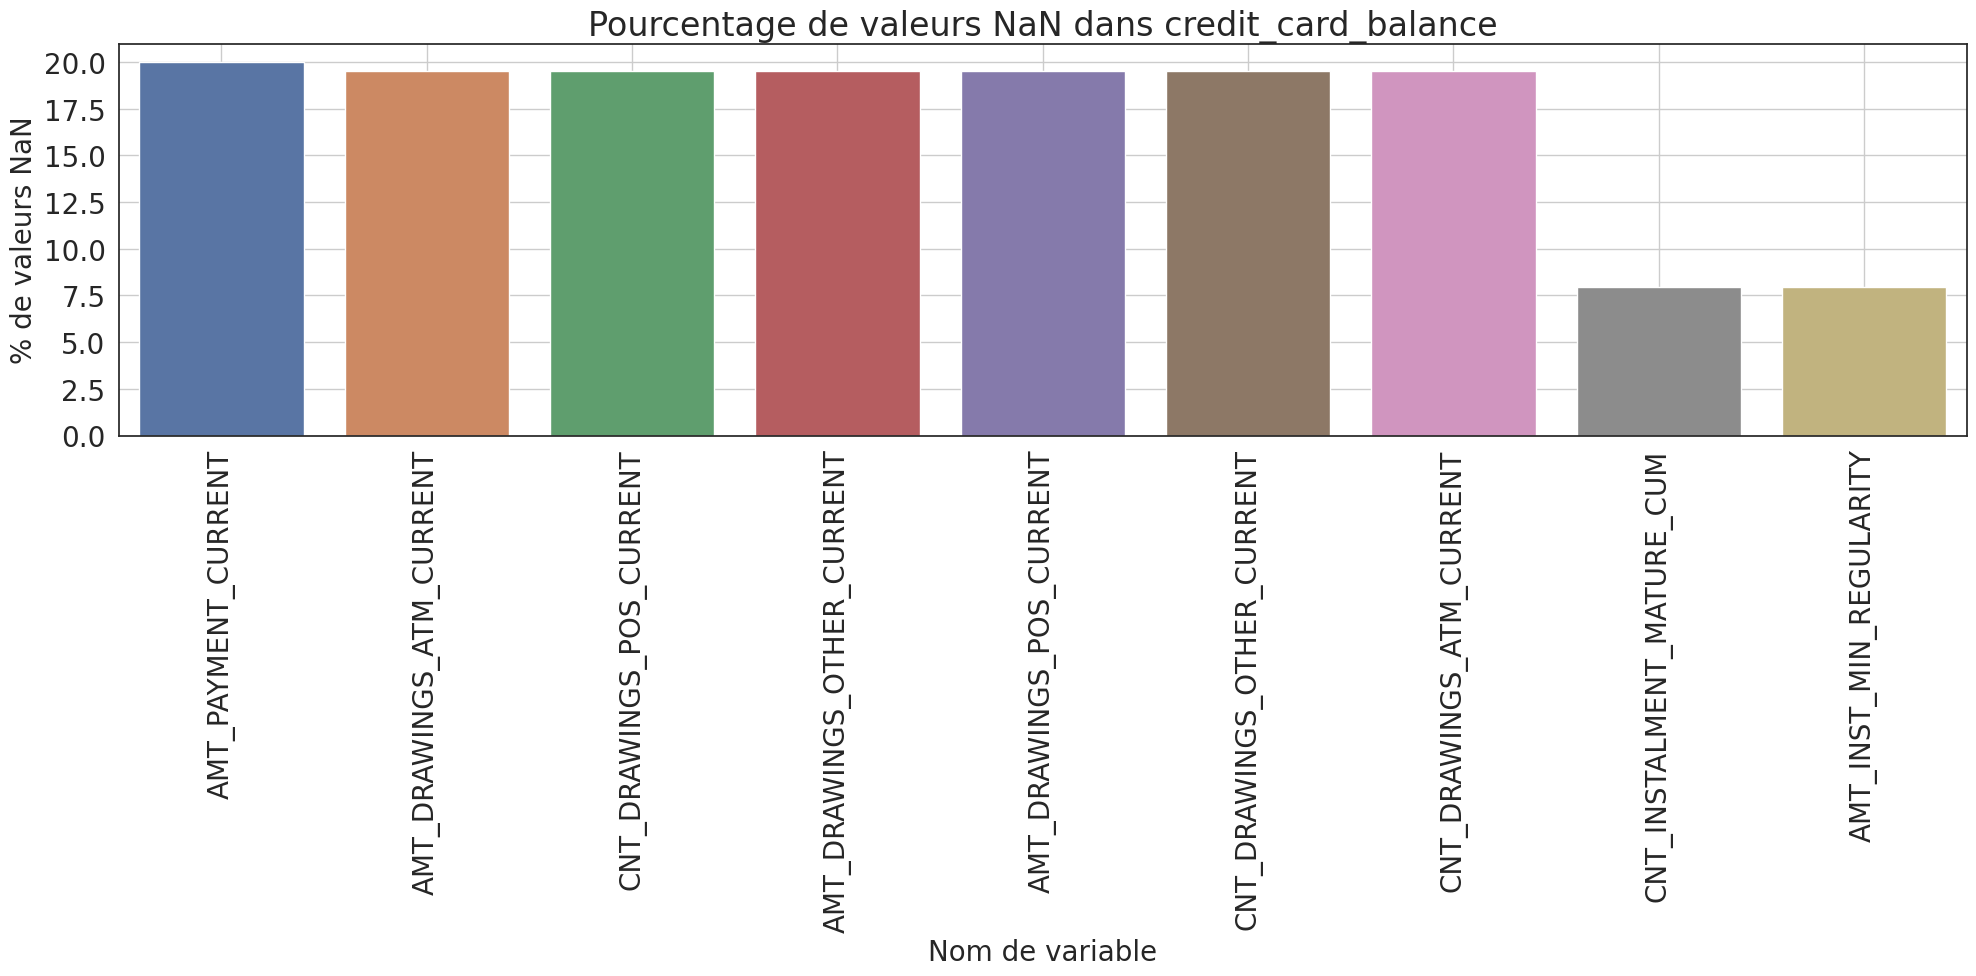

In [91]:
# Réprésentation visuelle des valeurs manquantes
df_nan_ccbal = eda.nan_df_create(cc_balance)
eda.plot_nan_percent(df_nan_ccbal, 'credit_card_balance',
                                      grid=True, fontsize=20,
                                      figsize=(20, 10))

**Bilan** :
***
- Sur les 23 variables, 9 d'entre elles contiennent des valeurs NaN.
- Si nous regardons les pourcentages de valeurs NaN, ils sont considérablement inférieurs au reste des tableaux que nous avons vus jusqu'à présent.
- 7 de ces variables ont près de 20% de valeurs NaN.
- Ces variables sont principalement liées aux montants des tirages et aux nombres de tirages.
- Les deux autres caractéristiques sont liées aux statistiques sur les versements.

**Préparation du dataframe de travail**

In [92]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
print('Création dataframe de travail : merge TARGET avec dataframe cc_balance')
cc_balance_merged = application_train.iloc[:, :2].merge(cc_balance,
                                                        on='SK_ID_CURR',
                                                        how='left')
print("-"*79)

-------------------------------------------------------------------------------
Création dataframe de travail : merge TARGET avec dataframe cc_balance
-------------------------------------------------------------------------------


#### <span style= ''>3.5.1 Analyse Univariée</span>


Nous allons maintenant représenter graphiquement certaines des variables catégorielles du dataframe credit_card_balance.csv, et voir leur impact sur la variable cible.

In [93]:
# Liste des variables qualitatives
cols_cat_ccbal = \
    cc_balance_merged.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_ccbal

['NAME_CONTRACT_STATUS']

**Variable NAME_CONTRACT_STATUS**
État du contrat au cours du mois.

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'NAME_CONTRACT_STATUS' sont :
[nan 'Active' 'Completed' 'Signed' 'Sent proposal' 'Refused' 'Demand'
 'Approved']
-------------------------------------------------------------------------------
Répartition dans chaque catégorie :
NAME_CONTRACT_STATUS
Active           3116673
Completed         100031
Signed              9939
Demand               843
Sent proposal        460
Refused               14
Approved               5
Name: count, dtype: int64
-------------------------------------------------------------------------------
Nombre de catégories uniques pour NAME_CONTRACT_STATUS = 8


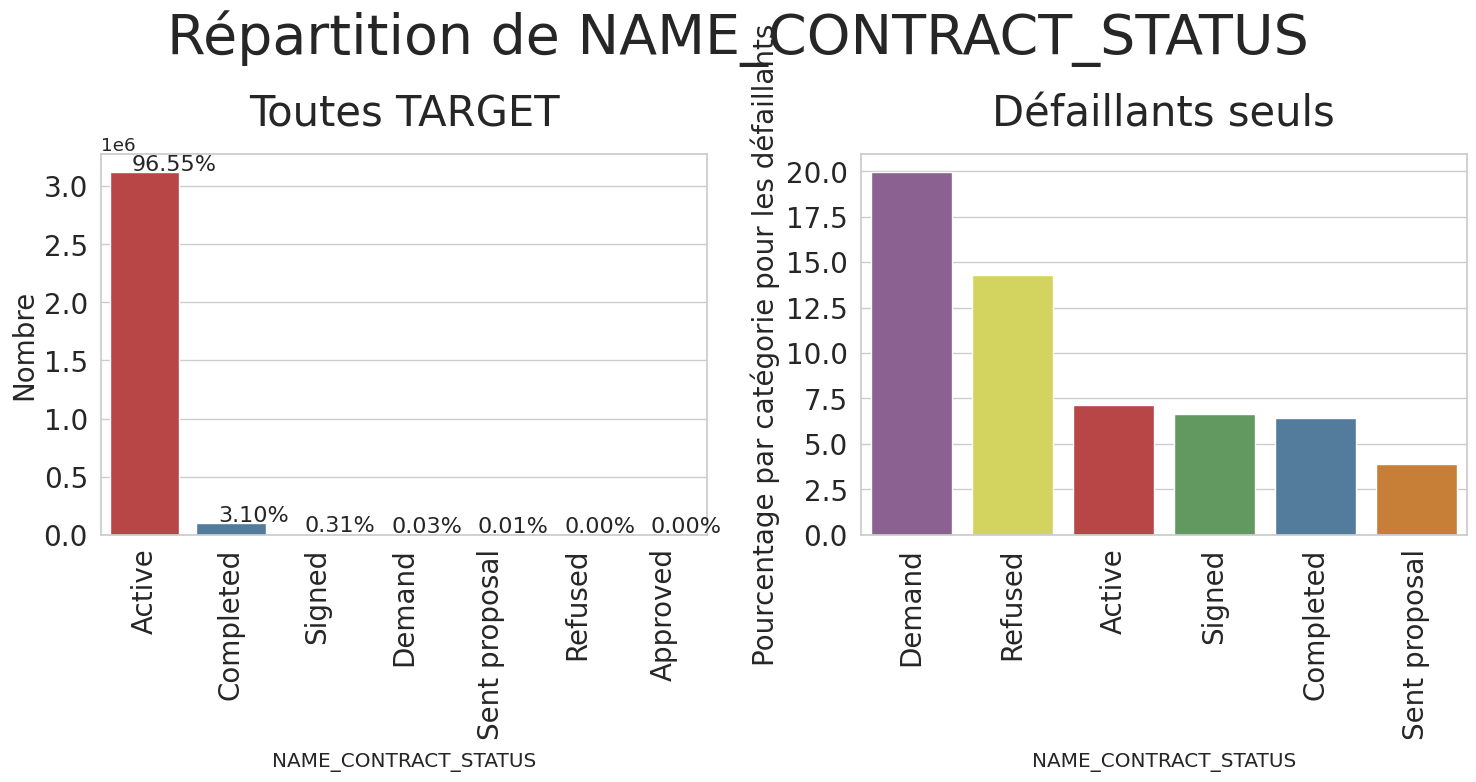

In [94]:
# Let us first see the unique categories of 'NAME_CONTRACT_STATUS'
eda.print_unique_categories(cc_balance_merged,
                                             'NAME_CONTRACT_STATUS',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda.plot_categorical_variables_bar(cc_balance_merged,
                                   column_name='NAME_CONTRACT_STATUS',
                                   figsize=(15, 8), rotation=90,
                                   horizontal_adjust=0.25,
                                   fontsize_percent=16,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38'],
                                   palette2=['#905998', '#e6e64c',
                                             '#cb3335', '#59a257',
                                             '#477ca8', '#df7f20'])

**Bilan** :
***
- La majorité des états des contrats des prêts sont Actif ou Terminé.
- Pour les défaillants, l'état des contrat sont demandé, réfusé puis actif ou signé.
- Les non-défaillants ont plus de prêts actifs que les défaillants.

In [95]:
# Liste des variables quantitatives
cols_num = \
    cc_balance_merged.select_dtypes(include=[np.number]).columns.to_list()
cols_num

['SK_ID_CURR',
 'TARGET',
 'SK_ID_PREV',
 'MONTHS_BALANCE',
 'AMT_BALANCE',
 'AMT_CREDIT_LIMIT_ACTUAL',
 'AMT_DRAWINGS_ATM_CURRENT',
 'AMT_DRAWINGS_CURRENT',
 'AMT_DRAWINGS_OTHER_CURRENT',
 'AMT_DRAWINGS_POS_CURRENT',
 'AMT_INST_MIN_REGULARITY',
 'AMT_PAYMENT_CURRENT',
 'AMT_PAYMENT_TOTAL_CURRENT',
 'AMT_RECEIVABLE_PRINCIPAL',
 'AMT_RECIVABLE',
 'AMT_TOTAL_RECEIVABLE',
 'CNT_DRAWINGS_ATM_CURRENT',
 'CNT_DRAWINGS_CURRENT',
 'CNT_DRAWINGS_OTHER_CURRENT',
 'CNT_DRAWINGS_POS_CURRENT',
 'CNT_INSTALMENT_MATURE_CUM',
 'SK_DPD',
 'SK_DPD_DEF']

### <span style= ''>3.6 Fichier installments_payments.csv</span>

**Description**
- Ce fichier **installments_payments.csv** présente l'historique de remboursement de chacun des prêts que le demandeur a contractés auprès de Home Credit Group.
- Le tableau contient des variables telles que le montant des versements, combien le demandeur a payé pour chaque versement, etc.

In [96]:
# Types des varibales
installments_payments.dtypes

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object

In [97]:
# Description des varibales
installments_payments.describe(include = 'all').T

count        mean          std        min         25%         50%         75%         max
SK_ID_PREV              1.3605e+07  1.9034e+06  536202.9055  1000001.0  1.4342e+06  1.8965e+06  2.3691e+06  2.8435e+06
SK_ID_CURR              1.3605e+07  2.7844e+05  102718.3104   100001.0  1.8964e+05  2.7868e+05  3.6753e+05  4.5626e+05
NUM_INSTALMENT_VERSION  1.3605e+07  8.5664e-01       1.0352        0.0  0.0000e+00  1.0000e+00  1.0000e+00  1.7800e+02
NUM_INSTALMENT_NUMBER   1.3605e+07  1.8871e+01      26.6641        1.0  4.0000e+00  8.0000e+00  1.9000e+01  2.7700e+02
DAYS_INSTALMENT         1.3605e+07 -1.0423e+03     800.9463    -2922.0 -1.6540e+03 -8.1800e+02 -3.6100e+02 -1.0000e+00
DAYS_ENTRY_PAYMENT      1.3602e+07 -1.0511e+03     800.5859    -4921.0 -1.6620e+03 -8.2700e+02 -3.7000e+02 -1.0000e+00
AMT_INSTALMENT          1.3605e+07  1.7051e+04   50570.2544        0.0  4.2261e+03  8.8841e+03  1.6710e+04  3.7715e+06
AMT_PAYMENT             1.3602e+07  1.7238e+04   54735.7840        0.0  3.3983e+03  8.1255e+03  1.6108e+04  3.7715e+06

**Bilan** :
***
- Il y a environ 13,6 millions de points de données dans le fichier installments_payments.csv.
- Chaque ligne représente l'historique des versements liés à un prêt particulier que le demandeur a eu précédemment avec Home Credit Group.
- Il y a 997000 prêts antérieurs uniques dans le fichier installments_payments. Ils appartiennent à 339000 SK_ID_CURR uniques, qui sont les ID des demandeurs du prêt actuel.
- Sur ces 339000 SK_ID_CURR, 291000 appartiennent à l'ensemble de données d'apprentissage et 47900 à l'ensemble de données de test.
- Cela implique que sur les 307000 SK_ID_CURR uniques de l'application_train, 291000 ont déjà eu une forme de prêt avec Home Credit. - De même, pour 48700 de ceux qui sont dans l'ensemble de données de test, 47900 ont eu un prêt auparavant avec Home Credit.
- Le fichier a 8 variables uniques, dont 6 décrivent les statistiques de chaque versement pour le prêt précédent.

Nombre de variables avec valeurs manquantes : 2


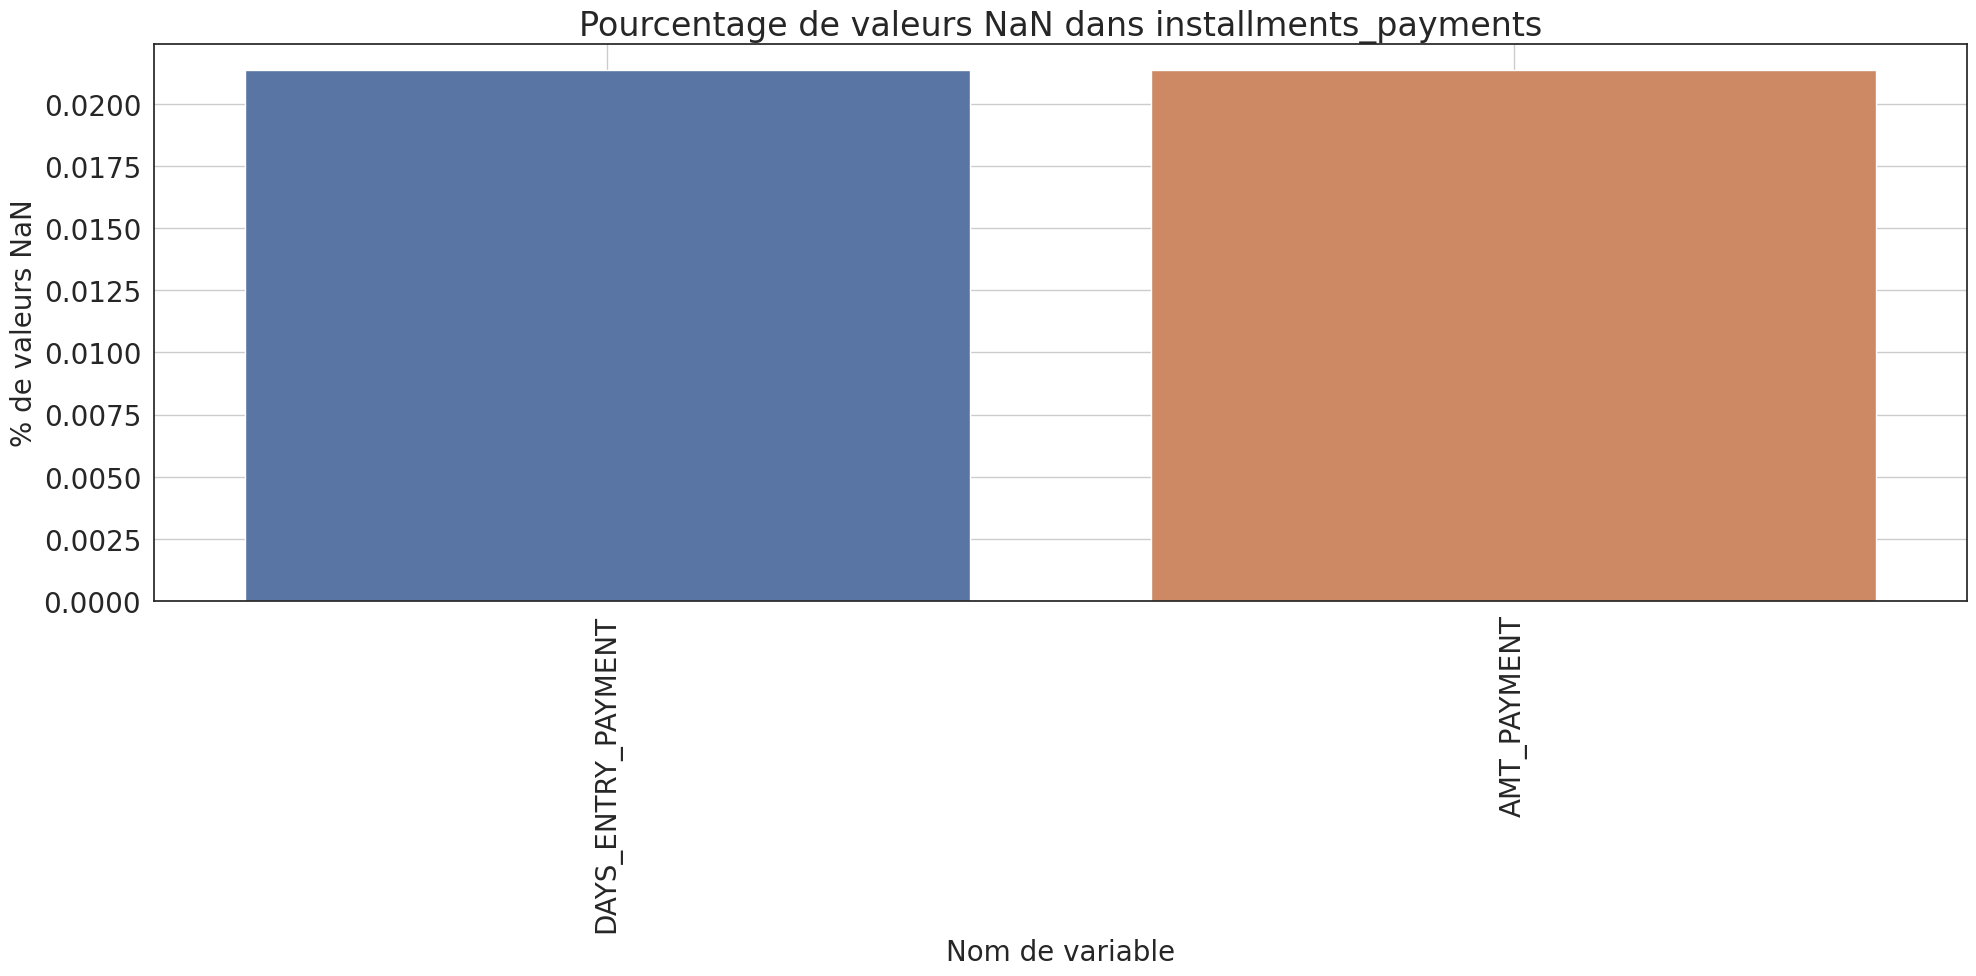

In [98]:
# Valeurs manquantes

# Réprésentation visuelle des valeurs manquantes
df_nan_instpaie = eda.nan_df_create(installments_payments)
eda.plot_nan_percent(df_nan_instpaie, 'installments_payments',
                                      grid=True, fontsize=20,
                                      figsize=(20, 10))

In [99]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
part1 = 'Création dataframe de travail : merge TARGET '
print(part1 + 'avec dataframe installments_payments')
installments_merged = \
    application_train.iloc[:, :2].merge(installments_payments,
                                        on='SK_ID_CURR',
                                        how='left')
print("-"*79)

-------------------------------------------------------------------------------
Création dataframe de travail : merge TARGET avec dataframe installments_payments
-------------------------------------------------------------------------------


In [100]:
# Liste des variables quantitatives
cols_num_instpaie = \
    installments_merged.select_dtypes(include=[np.number]).columns.to_list()
cols_num_instpaie

['SK_ID_CURR',
 'TARGET',
 'SK_ID_PREV',
 'NUM_INSTALMENT_VERSION',
 'NUM_INSTALMENT_NUMBER',
 'DAYS_INSTALMENT',
 'DAYS_ENTRY_PAYMENT',
 'AMT_INSTALMENT',
 'AMT_PAYMENT']

In [101]:
installments_merged = installments_merged.groupby('SK_ID_PREV').mean()

**Variable DAYS_INSTALLMENT**
***
Cette variable indique les jours où le versement du crédit précédent devait être payé.

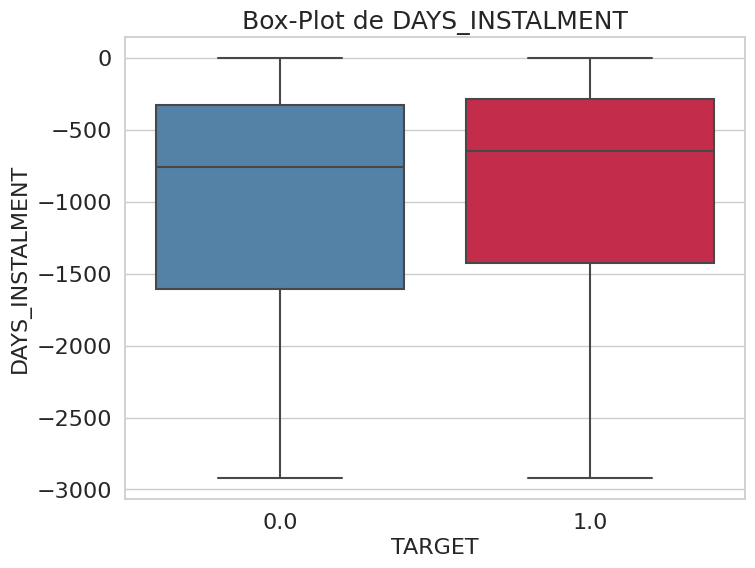

In [102]:
# Affiche Boxplot
eda.plot_continuous_variables(installments_merged,
                                               'DAYS_INSTALMENT',
                                               plots=['box'],
                                               figsize=(8, 6))

**Bilan** :
***
- Les jours où le versement du précédent devait être payé est inférieur pour les défaillants.

**Variable DAYS_ENTRY_PAYMENT**
***
Cette variable indique les jours où le versement du crédit précédent a été effectivement payé.

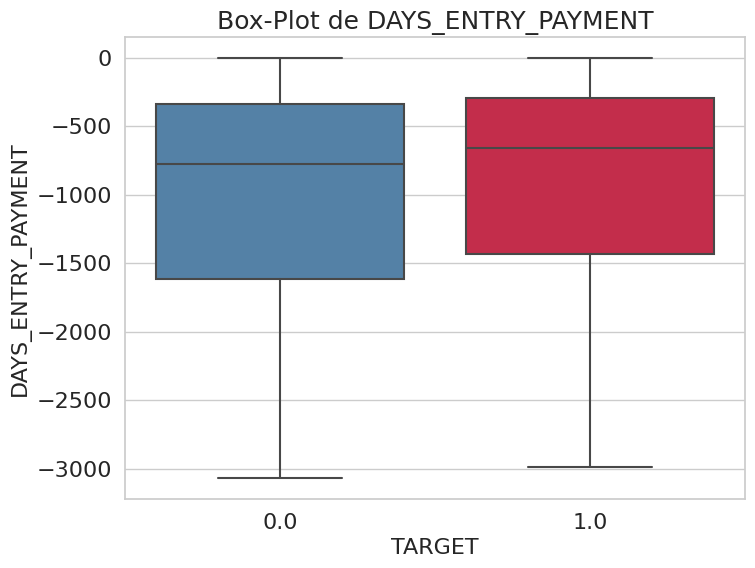

In [103]:
# Affiche Boxplot
eda.plot_continuous_variables(installments_merged,
                                               'DAYS_ENTRY_PAYMENT',
                                               plots=['box'],
                                               figsize=(8, 6))

**Bilan** :
***
- Les deux graphiques ci-dessus montrent une tendance similaire : les mauvais payeurs ont tendance à avoir moins de jours depuis leur dernier paiement, tandis que les mauvais payeurs ont plus de jours depuis leur dernier paiement.
- Tous les quantiles des défaillants ont plus de jours récents que ceux des non-défaillants. Ainsi, les non-défaillants ont généralement plus d'écart dans leurs paiements depuis le jour de la demande que les défaillants.

### <span style= ''>3.7 Fichier POSH_CASH_balance.csv</span>

**Description**
***
- Ce fichier **POS_CASH_balance.csv** contient les instantanés des soldes mensuels des prêts aux points de vente et des prêts en espèces que le demandeur a obtenus auprès de Home Credit Group.
- Le fichier contient des colonnes telles que le statut du contrat, le nombre de versements restants, etc.

In [104]:
POS_CASH_balance = pd.read_csv('/kaggle/input/pret-a-de/Projet+Mise+en+prod+-+home-credit-default-risk/POS_CASH_balance.csv')

In [105]:
# Type des variables
POS_CASH_balance.dtypes

SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
dtype: object

In [106]:
#Résumé des variables

POS_CASH_balance.describe(include = 'all').T

count unique     top     freq         mean          std        min        25%        50%        75%        max
SK_ID_PREV             10001358.0    NaN     NaN      NaN  1903216.599  535846.5307  1000001.0  1434405.0  1896565.0  2368963.0  2843499.0
SK_ID_CURR             10001358.0    NaN     NaN      NaN  278403.8633  102763.7451   100001.0   189550.0   278654.0   367429.0   456255.0
MONTHS_BALANCE         10001358.0    NaN     NaN      NaN     -35.0126      26.0666      -96.0      -54.0      -28.0      -13.0       -1.0
CNT_INSTALMENT          9975287.0    NaN     NaN      NaN      17.0897      11.9951        1.0       10.0       12.0       24.0       92.0
CNT_INSTALMENT_FUTURE   9975271.0    NaN     NaN      NaN      10.4838      11.1091        0.0        3.0        7.0       14.0       85.0
NAME_CONTRACT_STATUS     10001358      9  Active  9151119          NaN          NaN        NaN        NaN        NaN        NaN        NaN
SK_DPD                 10001358.0    NaN     NaN      NaN      11.6069      132.714        0.0        0.0        0.0        0.0     4231.0
SK_DPD_DEF             10001358.0    NaN     NaN      NaN       0.6545      32.7625        0.0        0.0        0.0        0.0     3595.0

**Bilan** :
***
- Le fichier POSH_CASH_BALANCE.csv contient environ 10 millions de points de données, où chaque ligne correspond à l'instantané mensuel de l'état du POS et du prêt d'argent précédent que le demandeur a eu avec Home Credit Group.
- Elle se compose de 8 variables, dont deux sont SK_ID_CURR et SK_ID_PREV.
- Il y a 936000 identifiants uniques de prêts précédents dans le fichier, qui correspondent à 337000 demandeurs actuels uniques (SK_ID_CURR).
- Sur ces 337000 SK_ID_CURR, 289000 appartiennent à l'ensemble de formation et 47800 à l'ensemble de test.

Nombre de variables avec valeurs manquantes : 2


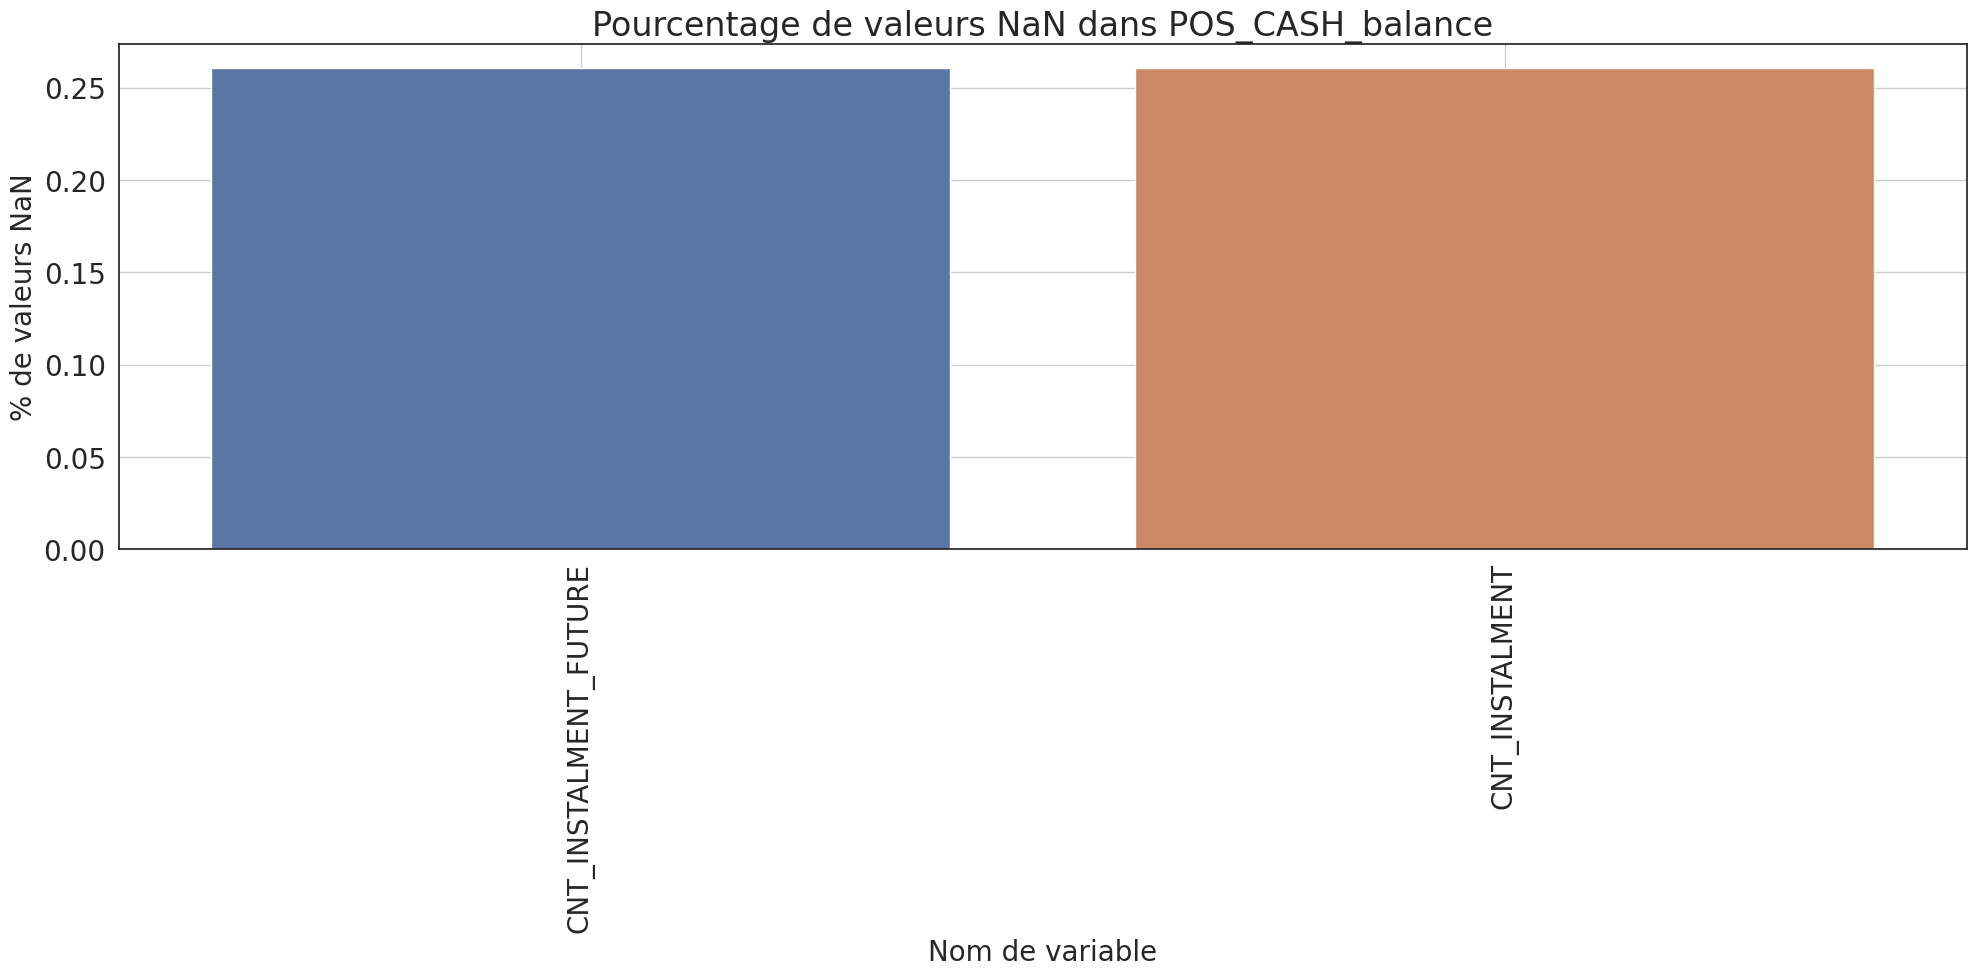

In [107]:
#Valeurs manquantes
# Réprésentation visuelle des valeurs manquantes
df_nan_posh = eda.nan_df_create(POS_CASH_balance)
eda.plot_nan_percent(df_nan_posh, 'POS_CASH_balance',
                                      grid=True, fontsize=20,
                                      figsize=(20, 10))

**Bilan** :
***
- Il y a seulement 2 variables qui contiennent des valeurs NaN des 8 variables de POS_CASH_balance.
- Ces variables sont le nombre de versements restants et la durée du prêt.
- Ces variables contiennent également une proportion très minime de valeurs NaN, c'est-à-dire seulement 0,26 %, ce qui n'est pas très préoccupant.

**Préparation du dataframe de travail**

In [108]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
var1 = 'Création dataframe de travail : merge TARGET '
print(var1 + 'avec dataframe POS_CASH_balance')
pos_cash_merged = application_train.iloc[:, :2].merge(POS_CASH_balance,
                                                      on='SK_ID_CURR',
                                                      how='left')
print("-"*79)

-------------------------------------------------------------------------------
Création dataframe de travail : merge TARGET avec dataframe POS_CASH_balance
-------------------------------------------------------------------------------


In [109]:
# Liste des variables qualitatives
cols_cat_posh = \
    pos_cash_merged.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_posh

['NAME_CONTRACT_STATUS']

**Variable NAME_CONTRACT_STATUS**
***
Etat du contrat au cours du mois

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'NAME_CONTRACT_STATUS' sont :
['Active' 'Completed' 'Returned to the store' 'Signed' nan 'Approved'
 'Demand' 'Amortized debt' 'Canceled' 'XNA']
-------------------------------------------------------------------------------
Nombre de catégories uniques pour NAME_CONTRACT_STATUS = 10


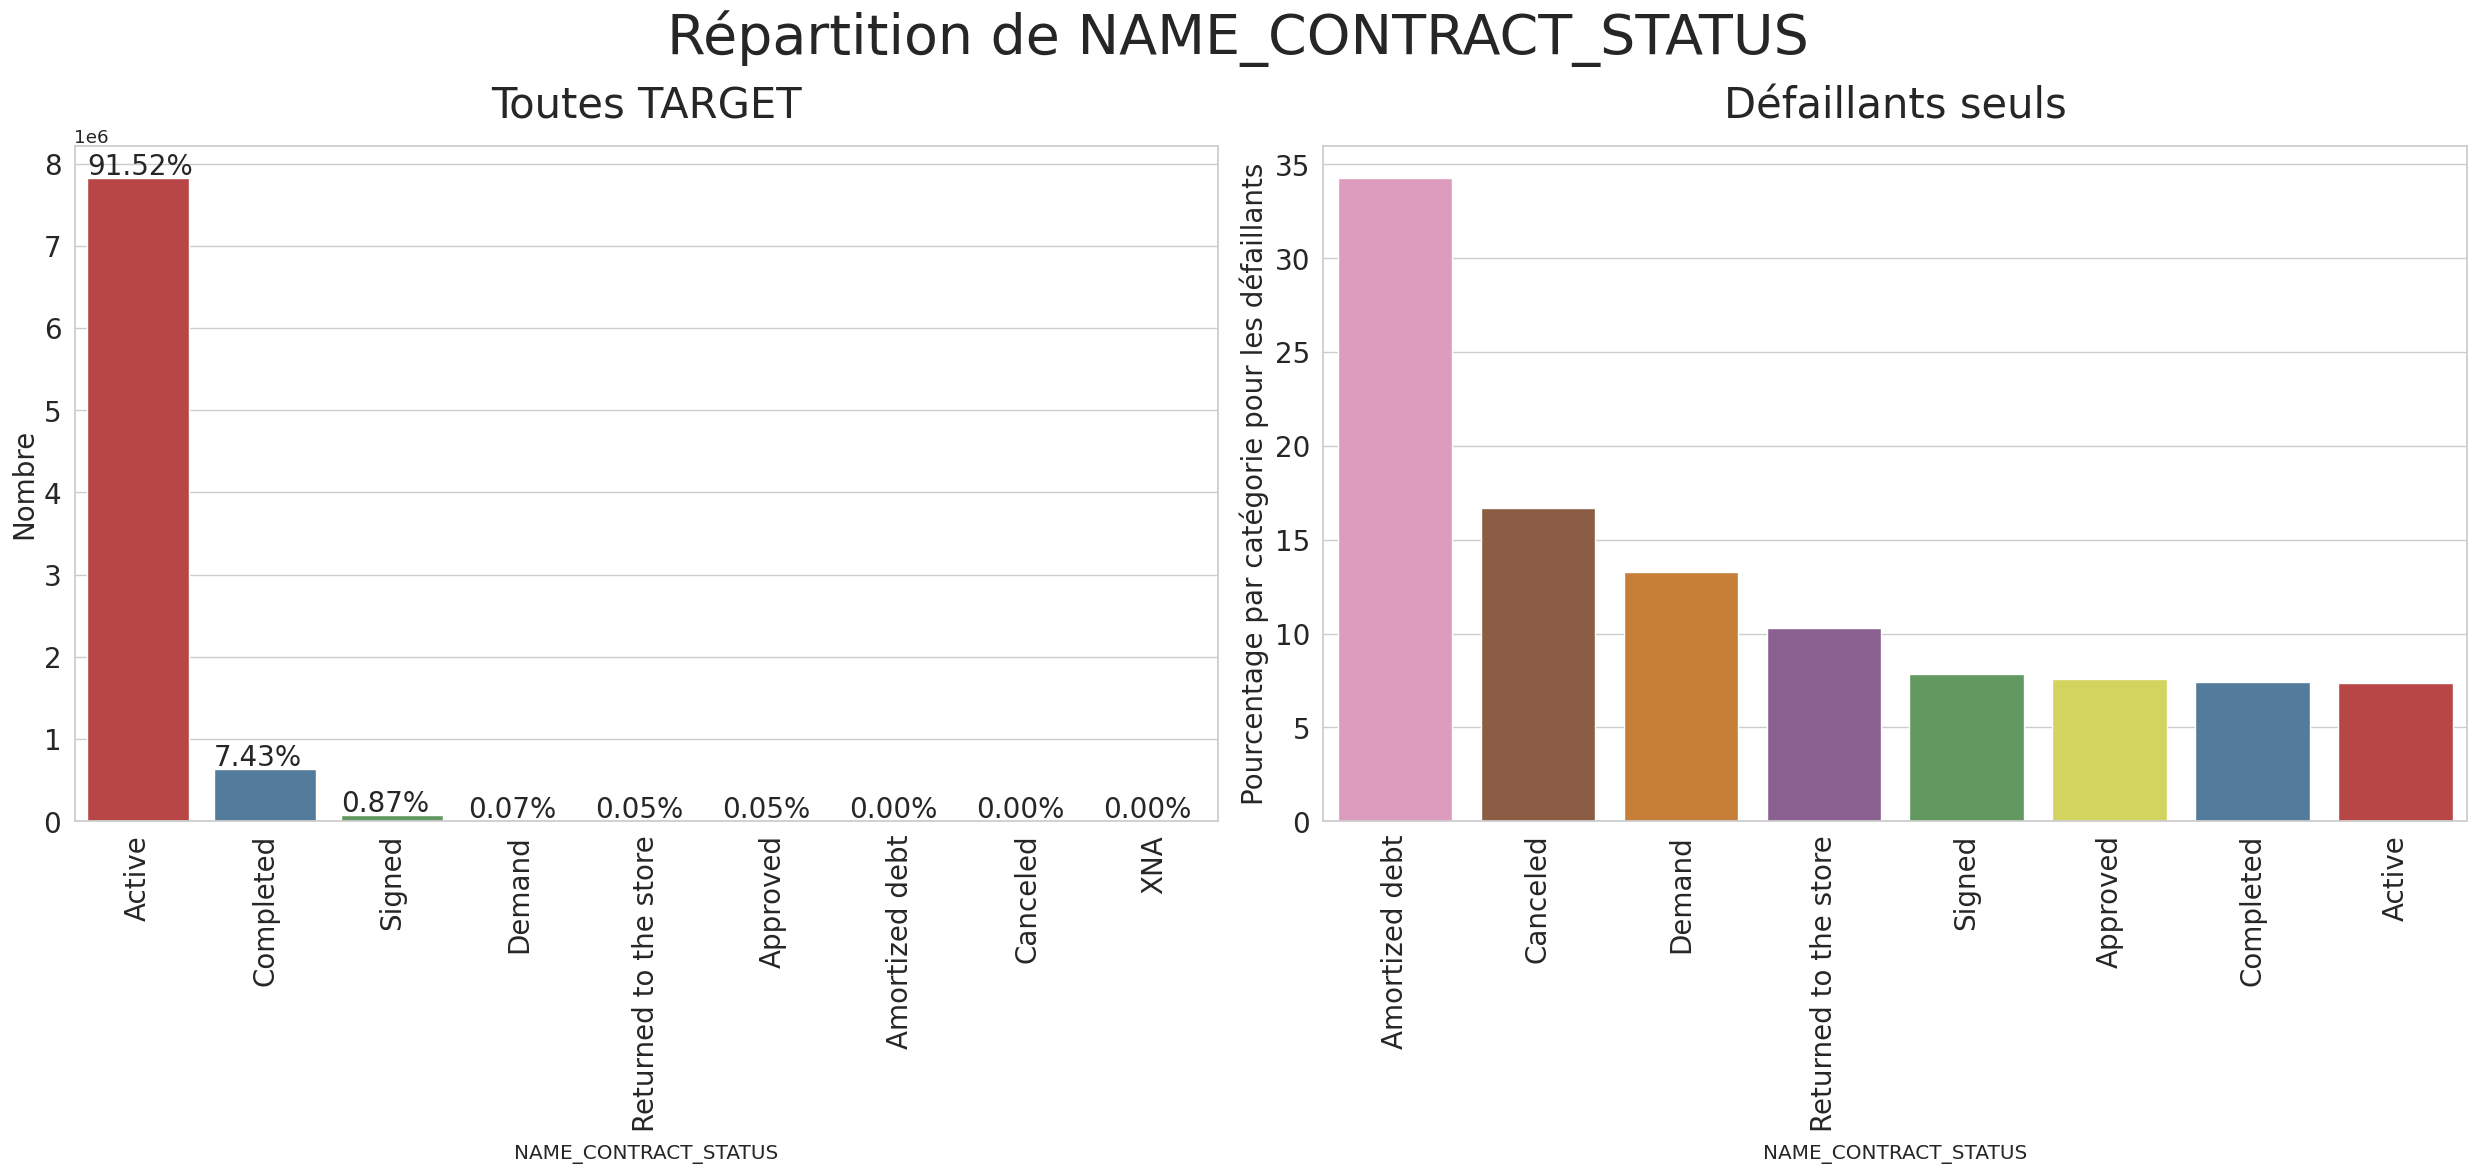

In [110]:
# Let us first see the unique categories of 'NAME_CONTRACT_STATUS'
eda.print_unique_categories(pos_cash_merged,
                                             'NAME_CONTRACT_STATUS')

# Plotting the Bar Plot for the Column
eda. \
    plot_categorical_variables_bar(pos_cash_merged,
                                   column_name='NAME_CONTRACT_STATUS',
                                   figsize=(25, 12), rotation=90,
                                   fontsize_percent=20,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38', '#e890be',
                                             '#999999'],
                                   palette2=['#e890be', '#965a38',
                                             '#df7f20', '#905998',
                                             '#59a257', '#e6e64c',
                                             '#477ca8', '#cb3335'])

**Bilan** :
***
- La majorité des états des contrats des prêts sont Actif ou Terminé.
- Pour les défaillants, l'état des contrat sont en priorité tous sauf ceux de la majorité des demandeurs Actifs ou Terminés.
- Les non-défaillants ont plus de prêts actifs que les défaillants.

In [111]:
# Liste des variables quantitatives
cols_num_posh = \
    pos_cash_merged.select_dtypes(include=[np.number]).columns.to_list()
cols_num_posh

['SK_ID_CURR',
 'TARGET',
 'SK_ID_PREV',
 'MONTHS_BALANCE',
 'CNT_INSTALMENT',
 'CNT_INSTALMENT_FUTURE',
 'SK_DPD',
 'SK_DPD_DEF']

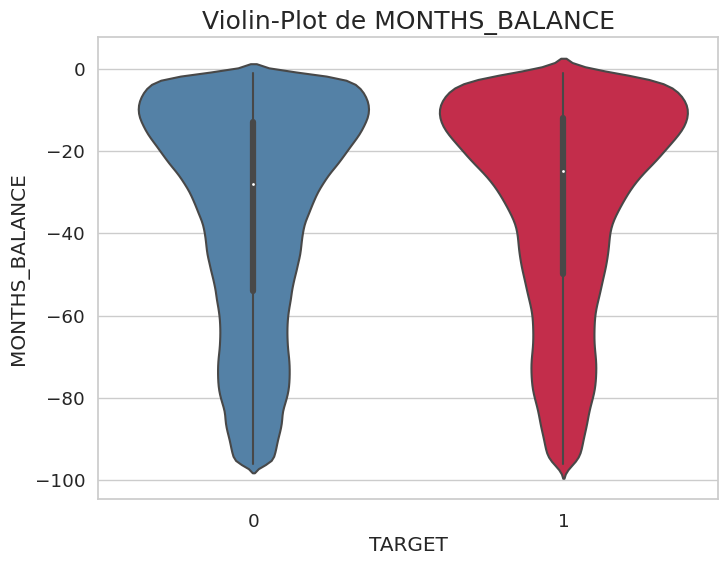

In [112]:
# Affiche Violinplot
eda.plot_continuous_variables(pos_cash_merged,
                                               'MONTHS_BALANCE',
                                               plots=['violin'],
                                               figsize=(8, 6))

Remarque : **Peu de différence.**

**CNT_INSTALMENT** : Durée du crédit précédent (peut changer avec le temps).

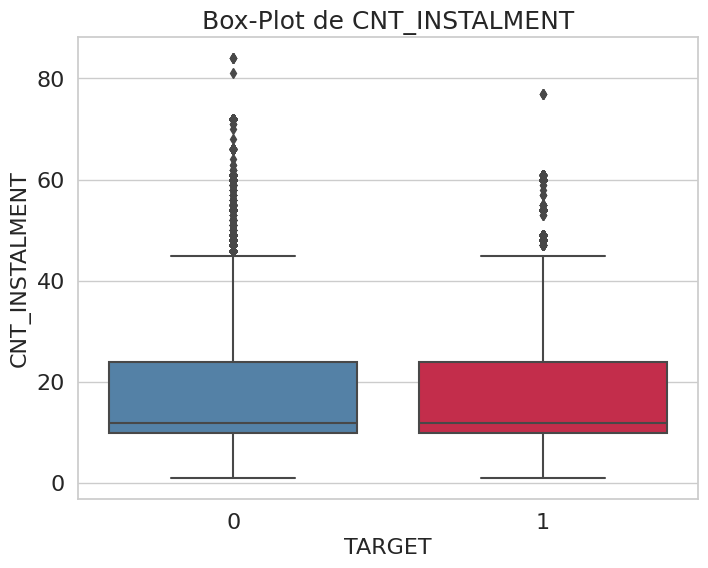

In [114]:
#Affiche Boxplot
eda.plot_continuous_variables(pos_cash_merged,
                                               'CNT_INSTALMENT',
                                               plots=['box'],
                                               figsize=(8, 6))

### <span style= ''>3.8 Fichier previous_application.csv</span>

**Description**
****
Ce fichier previous_application.csv contient les données statiques du précédent prêt que le demmandeur  a eu avec Home Credit.

In [116]:
previous_application = pd.read_csv('/kaggle/input/pret-a-de/Projet+Mise+en+prod+-+home-credit-default-risk/previous_application.csv')
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0                 0.1828                    0.8673   
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN   
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN   
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN   
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN   

  NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
0                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle   
1                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action   
2                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high   
3                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle   
4                Repairs              Refused           -781  Cash through the bank                 HC              NaN         Repeater                 XNA           Cash           walk-in  Credit and cash offices                -1                  XNA         24.0             high   

        PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
0  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0  
1          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0  
2         Cash X-Sell: high           

In [117]:
#Types des varibales 
previous_application.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [118]:
# Résumé des variables
previous_application.describe(include = 'all').T

count unique                      top     freq          mean          std        min         25%        50%         75%         max
SK_ID_PREV                   1670214.0    NaN                      NaN      NaN  1923089.1353  532597.9587  1000001.0  1461857.25  1923110.5  2384279.75   2845382.0
SK_ID_CURR                   1670214.0    NaN                      NaN      NaN   278357.1741  102814.8238   100001.0    189329.0   278714.5    367514.0    456255.0
NAME_CONTRACT_TYPE             1670214      4               Cash loans   747553           NaN          NaN        NaN         NaN        NaN         NaN         NaN
AMT_ANNUITY                  1297979.0    NaN                      NaN      NaN    15955.1207   14782.1373        0.0     6321.78    11250.0    20658.42  418058.145
AMT_APPLICATION              1670214.0    NaN                      NaN      NaN   175233.8604  292779.7624        0.0     18720.0    71046.0    180360.0   6905160.0
AMT_CREDIT                   1670213.0    NaN                      NaN      NaN   196114.0212  318574.6165        0.0     24160.5    80541.0    216418.5   6905160.0
AMT_DOWN_PAYMENT              774370.0    NaN                      NaN      NaN     6697.4021   20921.4954       -0.9         0.0     1638.0      7740.0   3060045.0
AMT_GOODS_PRICE              1284699.0    NaN                      NaN      NaN   227847.2793  315396.5579        0.0     50841.0   112320.0    234000.0   6905160.0
WEEKDAY_APPR_PROCESS_START     1670214      7                  TUESDAY   255118           NaN          NaN        NaN         NaN        NaN         NaN         NaN
HOUR_APPR_PROCESS_START      1670214.0    NaN                      NaN      NaN       12.4842        3.334        0.0        10.0       12.0        15.0        23.0
FLAG_LAST_APPL_PER_CONTRACT    1670214      2                        Y  1661739           NaN          NaN        NaN         NaN        NaN         NaN         NaN
NFLAG_LAST_APPL_IN_DAY       1670214.0    NaN                      NaN      NaN        0.9965       0.0593        0.0         1.0        1.0         1.0         1.0
RATE_DOWN_PAYMENT             774370.0    NaN                      NaN      NaN        0.0796       0.1078       -0.0         0.0     0.0516      0.1089         1.0
RATE_INTEREST_PRIMARY           5951.0    NaN                      NaN      NaN        0.1884       0.0877     0.0348      0.1607     0.1891      0.1933         1.0
RATE_INTEREST_PRIVILEGED        5951.0    NaN                      NaN      NaN        0.7735       0.1009     0.3732      0.7156     0.8351      0.8525         1.0
NAME_CASH_LOAN_PURPOSE         1670214     25                      XAP   922661           NaN          NaN        NaN         NaN        NaN         NaN         NaN
NAME_CONTRACT_STATUS           1670214      4                 Approved  1036781           NaN          NaN        NaN         NaN        NaN         NaN         NaN
DAYS_DECISION                1670214.0    NaN                      NaN      NaN     -880.6797     779.0997    -2922.0     -1300.0     -581.0      -280.0        -1.0
NAME_PAYMENT_TYPE              1670214      4    Cash through the bank  1033552           NaN          NaN        NaN         NaN        NaN         NaN         NaN
CODE_REJECT_REASON             1670214      9                      XAP  1353093           NaN          NaN        NaN         NaN        NaN         NaN         NaN
NAME_TYPE_SUITE                 849809      7            Unaccompanied   508970           NaN          NaN        NaN         NaN        NaN         NaN         NaN
NAME_CLIENT_TYPE               1670214      4                 Repeater  1231261           NaN          NaN        NaN         NaN        NaN         NaN         NaN
NAME_GOODS_CATEGORY            1670214     28                      XNA   950809           NaN          NaN        NaN         NaN        NaN         NaN         NaN
NAME_PORTFOLIO                 1670214      5                      POS   

**Bilan** :
***
Le fichier previous_application.csv est composée de 1.67 millions de lignes au total.
Chaque ligne correspond à chacun des prêts précédents que le demandeur a eu avec Home Credit Group.
Il est possible pour un même demandeur de la demande actuelle d'avoir plusieurs prêts précédents avec Home Credit Group.
Il y a 37 variables dans previous_application.csv, qui contiennent les détails sur le prêt précédent.
Il y a 338000 SK_ID_CURR uniques dans previous_application, dont 291000 correspondent aux SK_ID_CURR de l'application_train et 47800 correspondent aux SK_ID_CURR de l'application_test.

Nombre de variables avec valeurs manquantes : 16


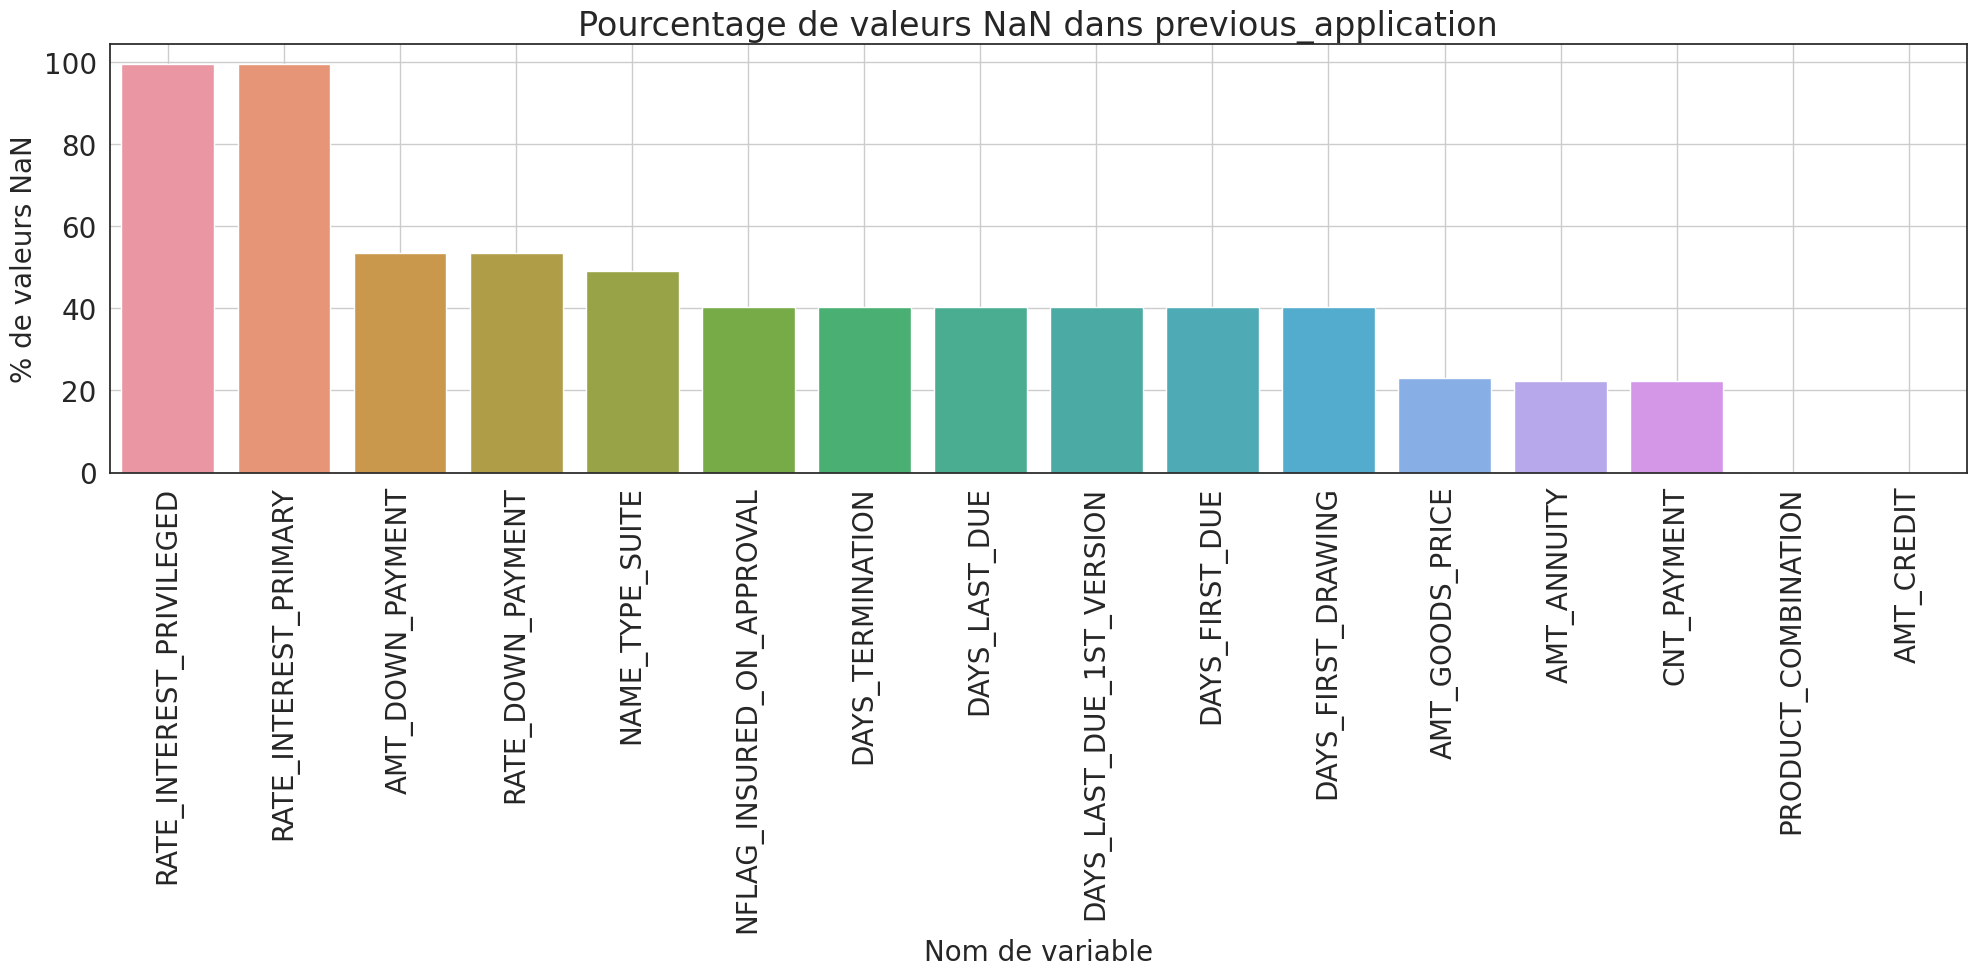

In [119]:
# Les valeurs manqunates
# Réprésentation visuelle des valeurs manquantes
df_nan_prev = eda.nan_df_create(previous_application)
eda.plot_nan_percent(df_nan_prev, 'previous_application',
                                      grid=True, fontsize=20,
                                      figsize=(20, 10))

**Bilan** :

- Il y a 16 variables sur les 37 variables qui contiennent des valeurs NaN.
- Deux de ces variables ont 99,64% de valeurs manquantes, ce qui est très élevé, et nous devrons trouver un moyen intelligent de gérer des valeurs NaN aussi élevées.
- Nous ne pouvons pas directement écarter une variable à ce stade.
- En dehors de ces deux variables, le reste des variables contient également > 40% de valeurs NaN, à l'exception de 5 variables.

In [120]:
# Préparation du dataframe de travail
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
var = 'Création dataframe de travail : merge TARGET '
print(var + 'avec dataframe previous_application')
prev_merged = application_train.iloc[:, :2].merge(previous_application,
                                                  on='SK_ID_CURR',
                                                  how='left')
print("-"*79)

-------------------------------------------------------------------------------
Création dataframe de travail : merge TARGET avec dataframe previous_application
-------------------------------------------------------------------------------


In [121]:
# Liste des variables qualitatives
cols_cat_prev = \
    prev_merged.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_prev

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'NAME_CONTRACT_TYPE' sont :
['Consumer loans' 'Cash loans' 'Revolving loans' nan 'XNA']
-------------------------------------------------------------------------------
Répartition dans chaque catégorie :
NAME_CONTRACT_TYPE
Cash loans         626764
Consumer loans     625256
Revolving loans    161368
XNA                   313
Name: count, dtype: int64
-------------------------------------------------------------------------------
Nombre de catégories uniques pour NAME_CONTRACT_TYPE = 5


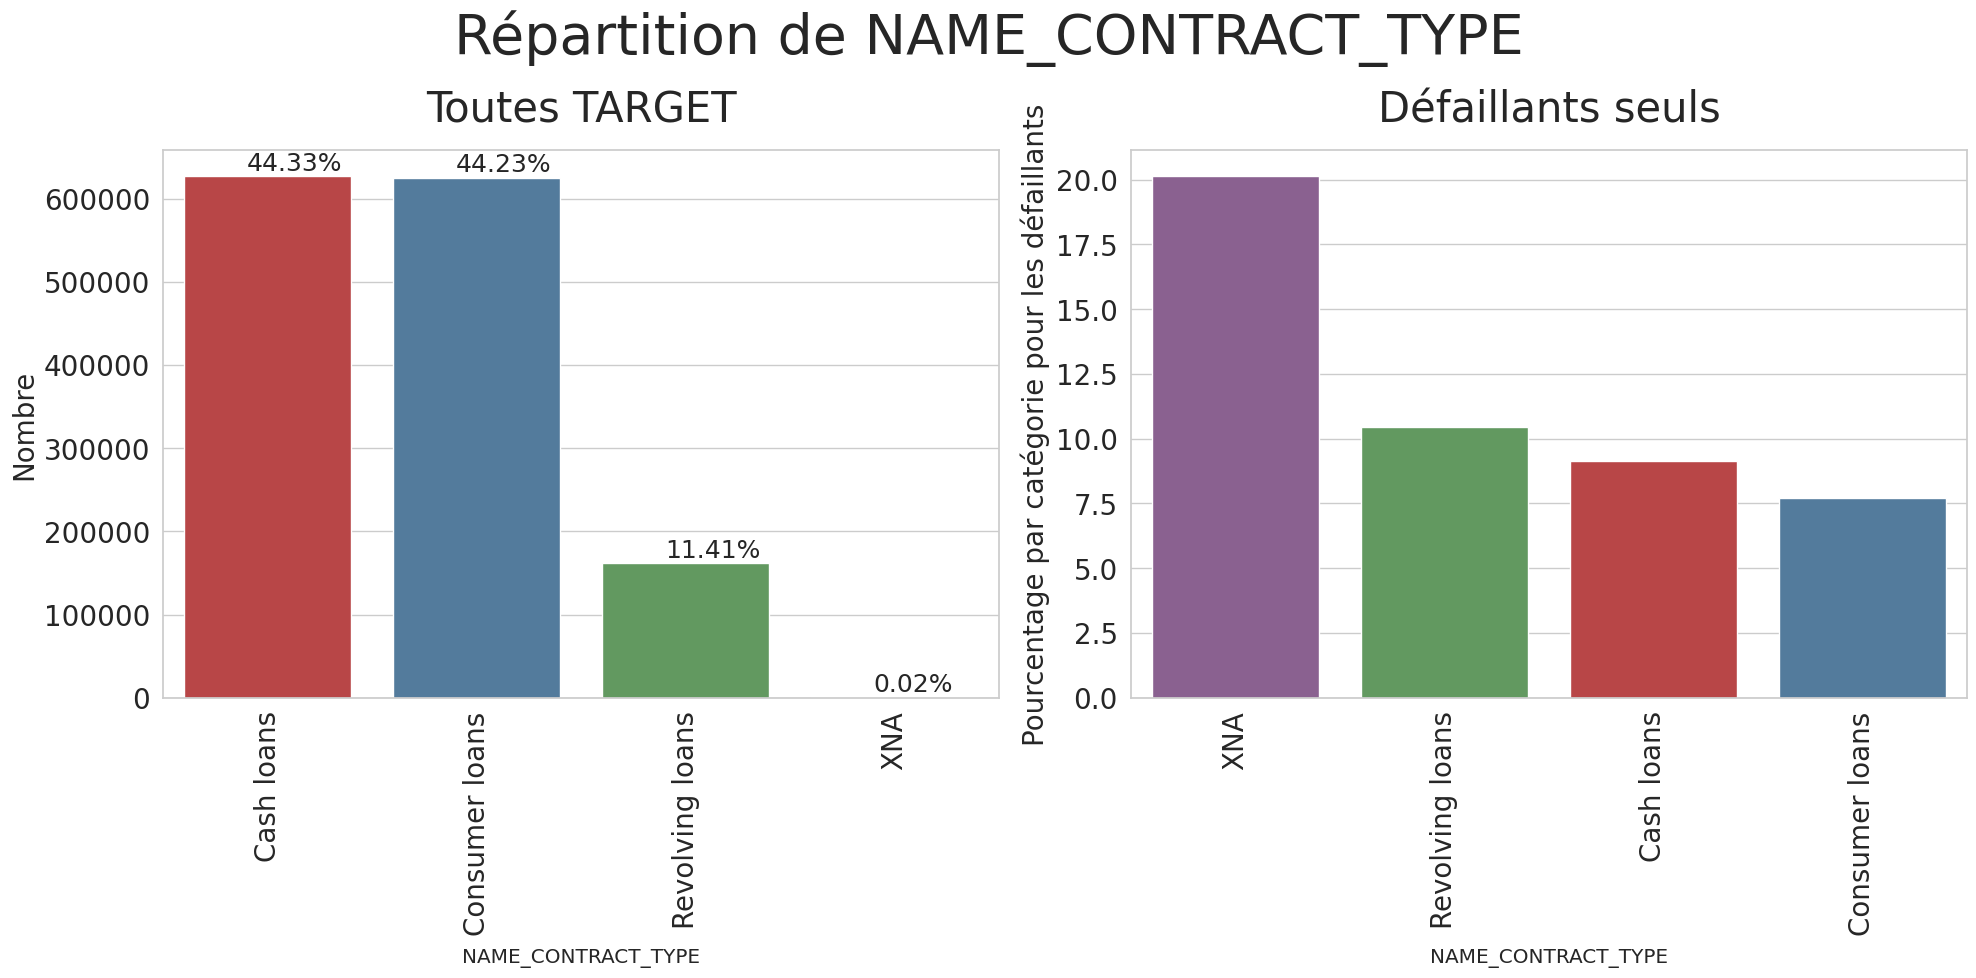

In [122]:
# Let us first see the unique categories of 'NAME_CONTRACT_TYPE'
eda.print_unique_categories(prev_merged,
                                             'NAME_CONTRACT_TYPE',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda. \
    plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_CONTRACT_TYPE',
                                   horizontal_adjust=0.3,
                                   figsize=(20, 10), fontsize_percent=18,
                                   rotation=90,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998'],
                                   palette2=['#905998', '#59a257',
                                             '#cb3335', '#477ca8'])

**Bilan **:

À partir des graphiques ci-dessus, nous pouvons observer ce qui suit :

D'après le premier sous-graphe, nous voyons que la plupart des prêts précédents ont été des prêts d'argent ou des prêts à la consommation, qui correspondent à environ 44% des prêts chacun.
Les 11,41% restants correspondent à des prêts revolving, et il y a quelques prêts nommés XNA dont les types ne sont en fait pas connus, mais ils sont très peu nombreux.
En regardant le deuxième sous-graphe, nous voyons que le pourcentage de défaillants pour le type de prêt XNA est le plus élevé, avec un taux de défaillance de 20%.
Le deuxième taux de défaut le plus élevé est celui des prêts revolving, qui est proche de 10,5 %.
Les prêts d'argent ont des taux de défaillance moins élevés, environ 9%, tandis que les prêts à la consommation ont tendance à avoir le plus faible pourcentage de défaillants, qui est proche de 7,5%.

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'NAME_CONTRACT_STATUS' sont :
['Approved' 'Canceled' 'Refused' nan 'Unused offer']
-------------------------------------------------------------------------------
Répartition dans chaque catégorie :
NAME_CONTRACT_STATUS
Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: count, dtype: int64
-------------------------------------------------------------------------------
Nombre de catégories uniques pour NAME_CONTRACT_STATUS = 5


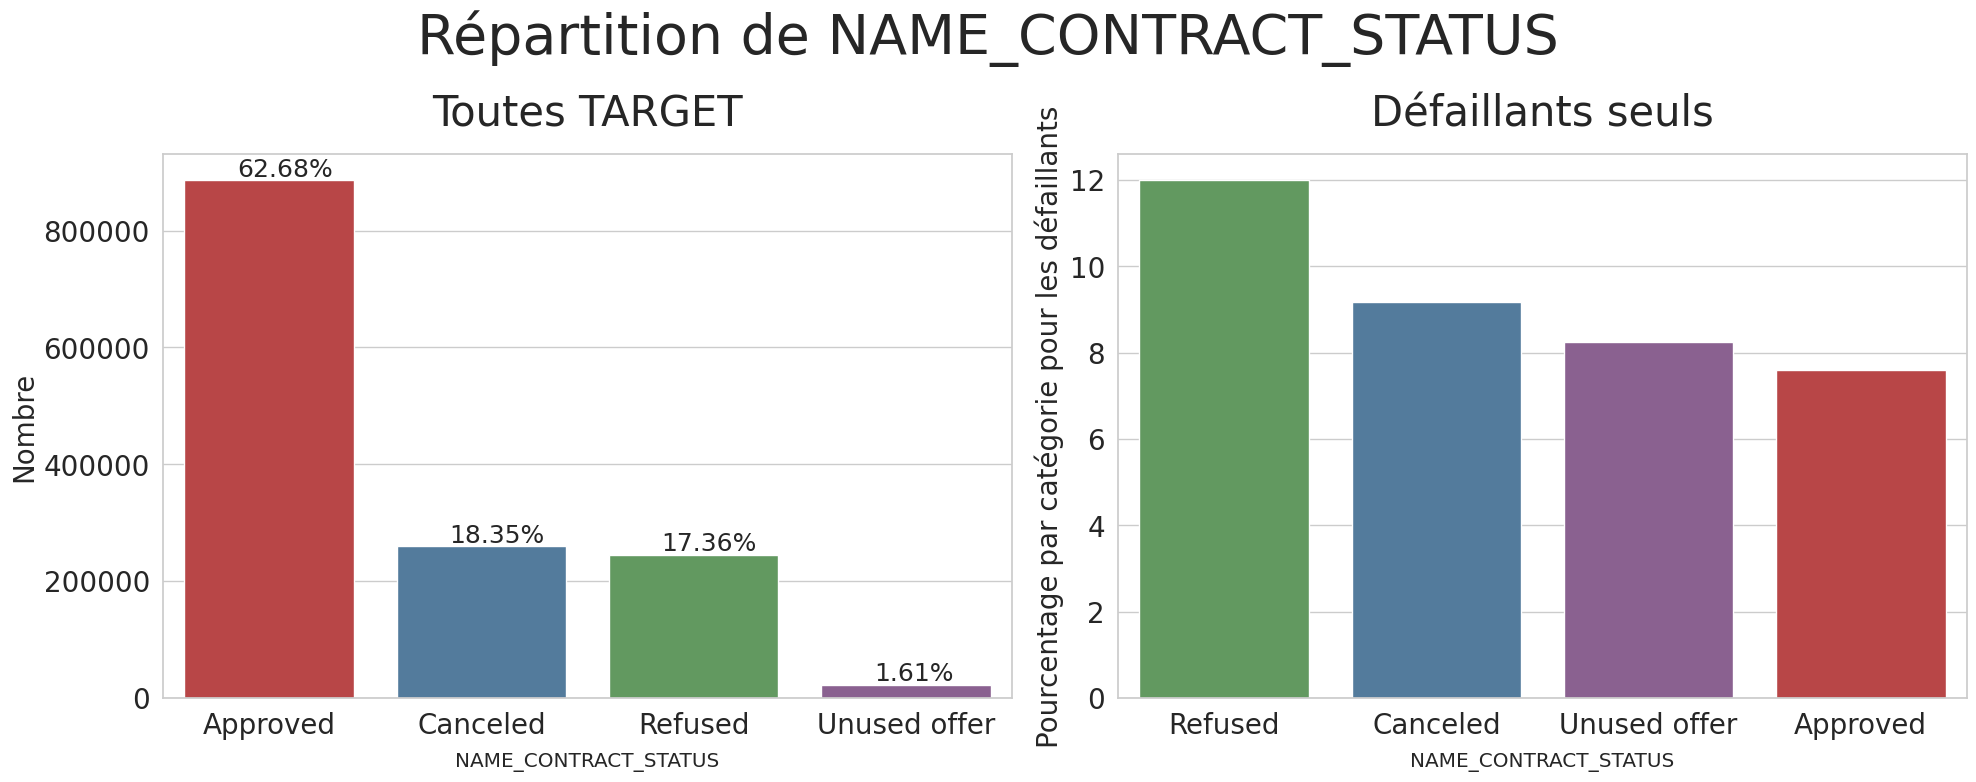

In [123]:
# Let us first see the unique categories of 'NAME_CONTRACT_STATUS'
eda.print_unique_categories(prev_merged,
                                             'NAME_CONTRACT_STATUS',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda. \
    plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_CONTRACT_STATUS',
                                   horizontal_adjust=0.25,
                                   figsize=(20, 8), fontsize_percent=18,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998'],
                                   palette2=['#59a257', '#477ca8',
                                             '#905998', '#cb3335'])

**Bilan :**

D'après les graphiques ci-dessus, nous constatons que :

Le type le plus courant de statut de contrat est le statut approuvé. Environ 63% des crédits précédents ont un statut approuvé. Les deux statuts les plus courants suivants sont Annulé et Refusé, qui correspondent tous deux à environ 18% des prêts. Cela implique que la plupart des prêts sont approuvés et que seule une partie d'entre eux ne le sont pas. Le type d'état contractuel le moins fréquent est Offre non utilisée, qui correspond à seulement 1,61% de tous les prêts.
Si l'on regarde le deuxième graphique secondaire pour le pourcentage de défaillants, on constate que les prêts qui avaient auparavant le statut Refusé ont tendance à être les plus défaillants dans les prêts actuels. Ils correspondent à environ 12% des défaillants de cette catégorie. Ils sont suivis par les prêts annulés qui correspondent à près de 9% du taux de défaillance. Ce comportement est assez attendu logiquement, puisque ces personnes ont dû être refusées parce qu'elles n'avaient pas le profil adéquat. Le taux de défaillance le plus faible est observé pour le statut de contrat Approuvé.*

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'CODE_REJECT_REASON' sont :
['XAP' 'LIMIT' nan 'HC' 'SCO' 'SCOFR' 'VERIF' 'CLIENT' 'XNA' 'SYSTEM']
-------------------------------------------------------------------------------
Répartition dans chaque catégorie :
CODE_REJECT_REASON
XAP       1145533
HC         145984
LIMIT       47773
SCO         32636
CLIENT      22771
SCOFR       10875
XNA          4378
VERIF        3079
SYSTEM        672
Name: count, dtype: int64
-------------------------------------------------------------------------------
Nombre de catégories uniques pour CODE_REJECT_REASON = 10


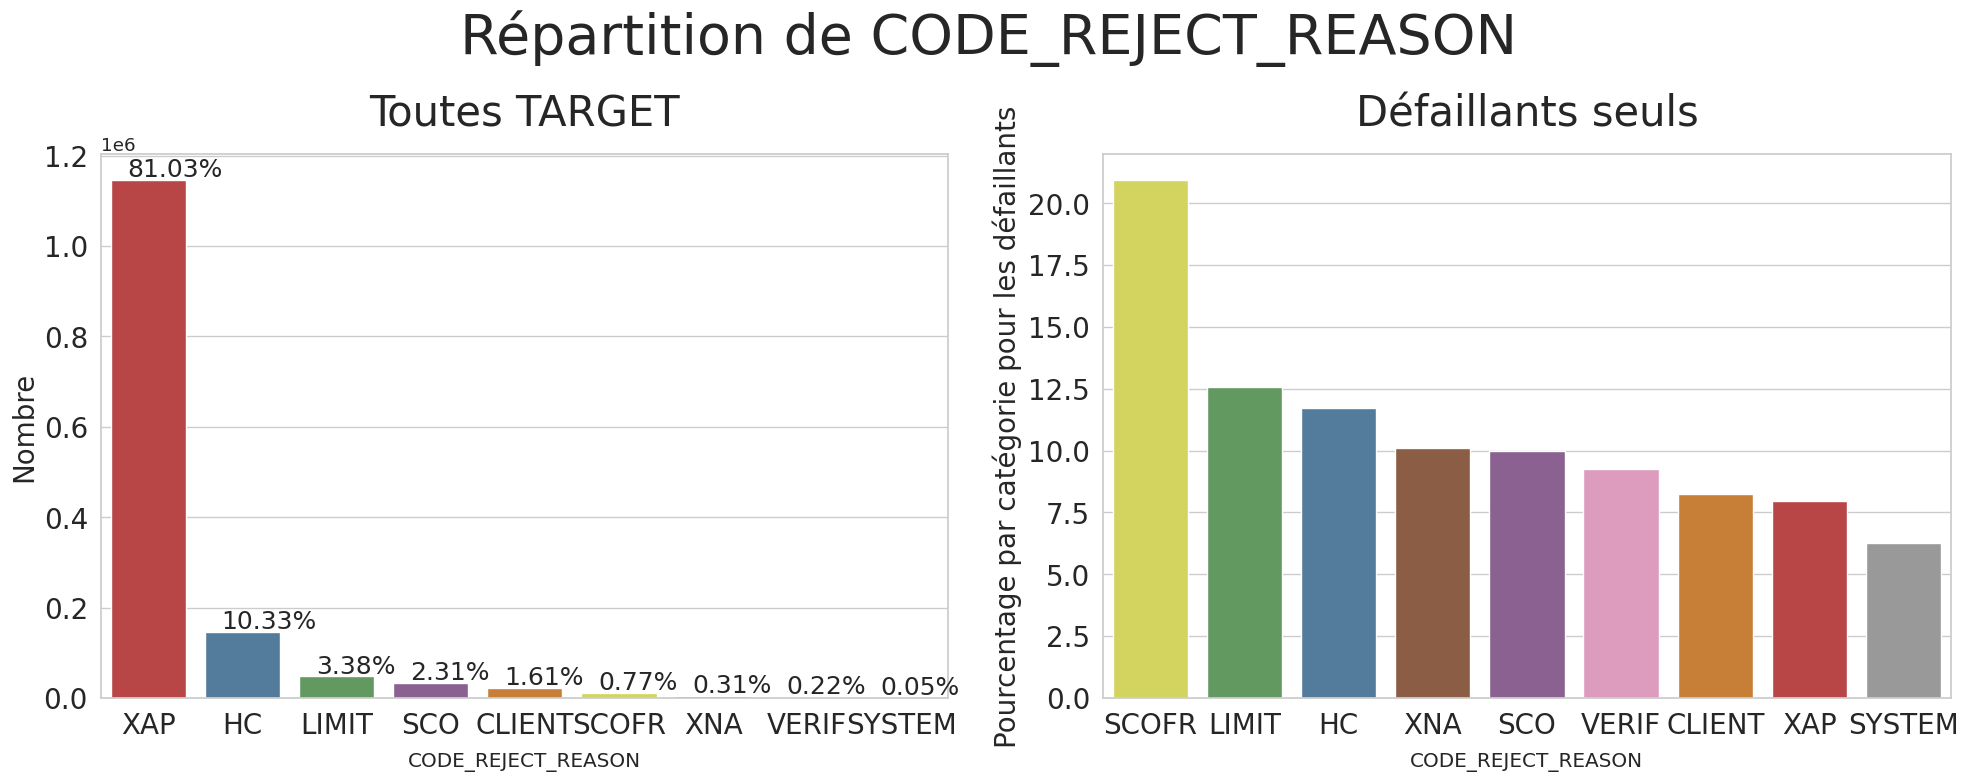

In [124]:
# Let us first see the unique categories of 'CODE_REJECT_REASON'
eda.print_unique_categories(prev_merged,
                                             'CODE_REJECT_REASON',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda. \
    plot_categorical_variables_bar(prev_merged,
                                   column_name='CODE_REJECT_REASON',
                                   horizontal_adjust=0.18,
                                   figsize=(20, 8), fontsize_percent=18,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38', '#e890be',
                                             '#999999'],
                                   palette2=['#e6e64c', '#59a257',
                                             '#477ca8', '#965a38',
                                             '#905998', '#e890be',
                                             '#df7f20', '#cb3335',
                                             '#999999'])

**Bilan :**

Le graphique ci-dessus montre la distribution de la variable catégorielle CODE_REJECT_REASON.

Les idées suivantes peuvent être générées à partir du graphique ci-dessus :

Le type de raison de rejet le plus courant est XAP, qui représente environ ~81%. Les autres raisons ne représentent qu'une petite partie des raisons de rejet. HC est le deuxième motif de rejet le plus fréquent avec seulement 10,33% d'occurrences.
La distribution du pourcentage de défaillants pour chaque catégorie de CODE_REJECT_REASON est assez intéressante. Les demandeurs dont les demandes précédentes ont été rejetées par le code SCOFT ont le pourcentage le plus élevé de défaillants parmi eux (~21%). Ils sont suivis par LIMIT et HC, qui comptent respectivement 12,5 % et 12 % de défaillants.
Le motif de rejet le plus courant, XAP, ne correspond qu'à 7,5 % des défaillants, et représente le deuxième plus faible pourcentage de défaillants après le code SYSTEM.

-------------------------------------------------------------------------------
Les catégories uniques de la variable 'CHANNEL_TYPE' sont :
['Stone' 'Credit and cash offices' 'Country-wide' 'Regional / Local'
 'AP+ (Cash loan)' 'Contact center' nan 'Channel of corporate sales'
 'Car dealer']
-------------------------------------------------------------------------------
Répartition dans chaque catégorie :
CHANNEL_TYPE
Credit and cash offices       600342
Country-wide                  423062
Stone                         183508
Regional / Local               92472
Contact center                 58891
AP+ (Cash loan)                49624
Channel of corporate sales      5396
Car dealer                       406
Name: count, dtype: int64
-------------------------------------------------------------------------------
Nombre de catégories uniques pour CHANNEL_TYPE = 9


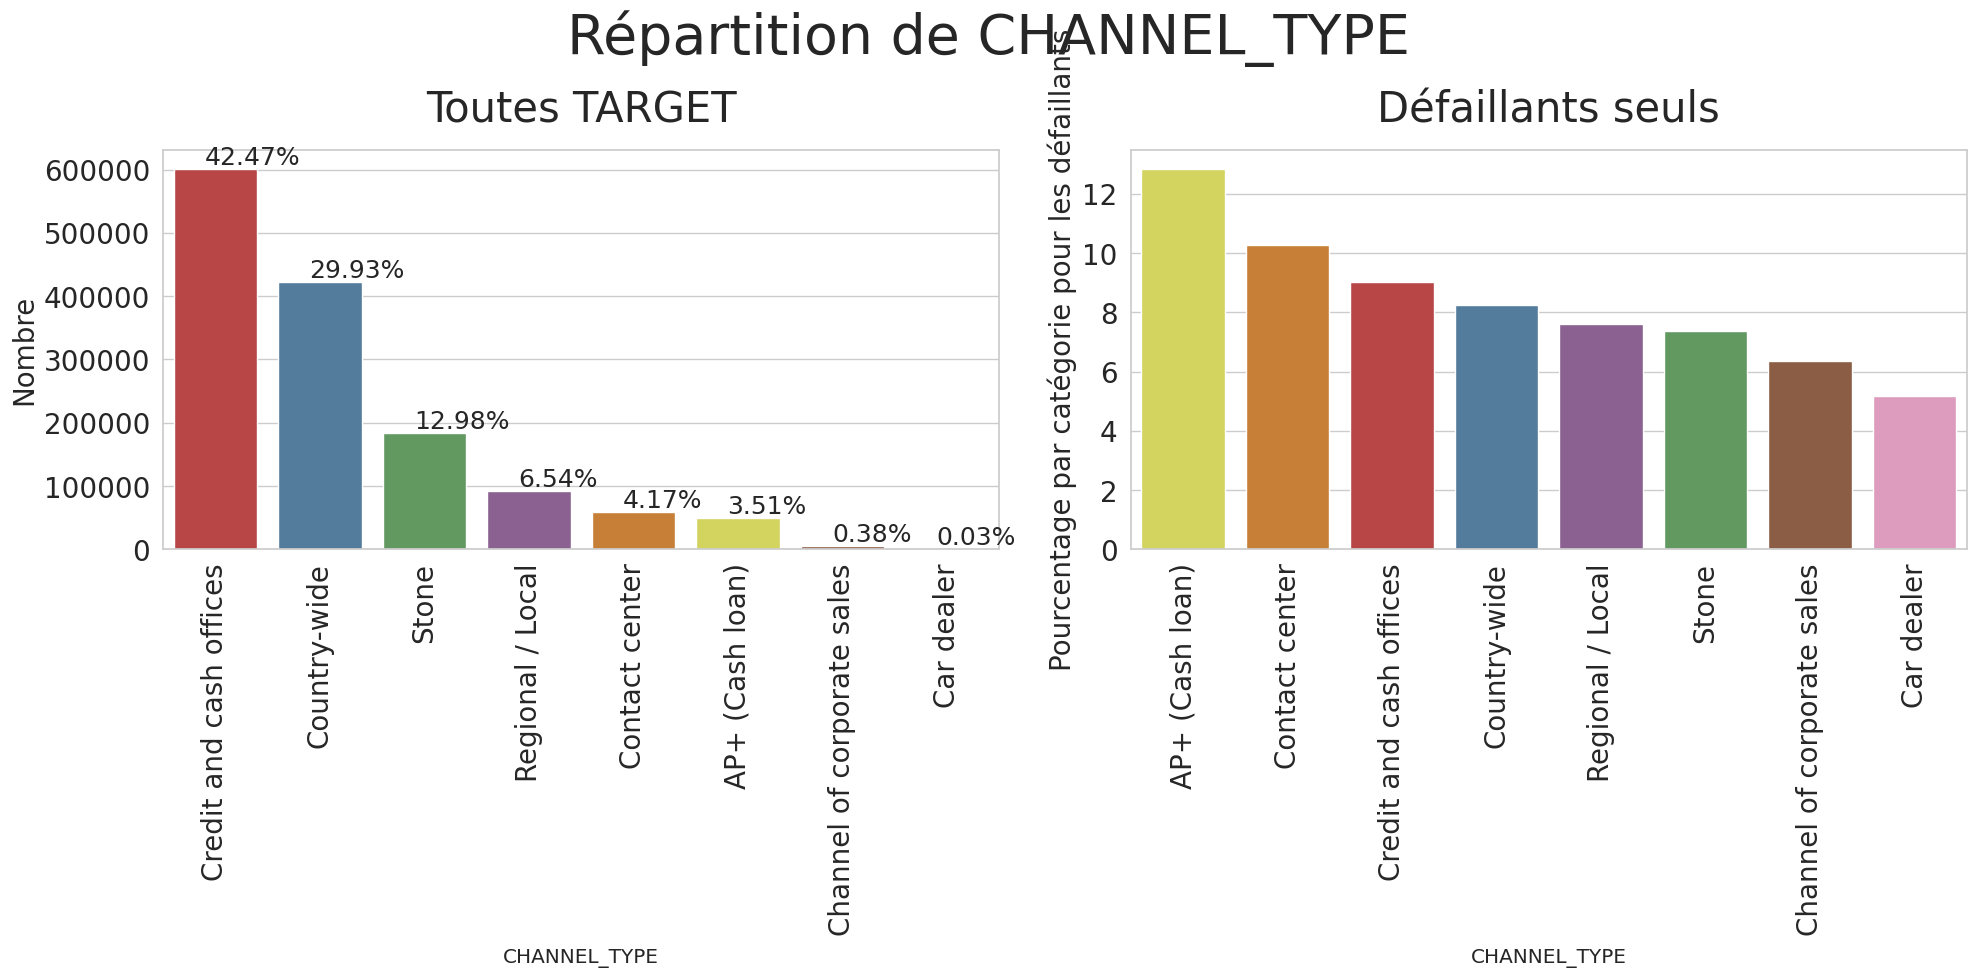

In [125]:
# Let us first see the unique categories of 'CHANNEL_TYPE'
eda.print_unique_categories(prev_merged,
                                             'CHANNEL_TYPE',
                                             show_counts=True)

# Plotting the Bar Plot for the Column
eda. \
    plot_categorical_variables_bar(prev_merged,
                                   column_name='CHANNEL_TYPE',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(20, 10), fontsize_percent=18,
                                   palette1=['#cb3335', '#477ca8',
                                             '#59a257', '#905998',
                                             '#df7f20', '#e6e64c',
                                             '#965a38', '#e890be'],
                                   palette2=['#e6e64c', '#df7f20',
                                             '#cb3335', '#477ca8',
                                             '#905998', '#59a257',
                                             '#965a38', '#e890be'])

**Bilan :**

Les deux graphiques ci-dessus montrent la distribution de CHANNEL_TYPE pour les prêts antérieurs dans Home Credit.

Le premier graphique montre que la plupart des demandes ont été acquises par le biais des bureaux de crédit et de caisse, soit environ 42,47% des demandes, suivies par le canal national qui correspond à 29,93% des demandes. Le reste des types de canaux ne correspondait qu'à un nombre restreint de demandes.
Le pourcentage de défaillance le plus élevé a été observé parmi les demandes pour lesquelles le type de canal était AP+ (prêt en espèces), ce qui correspondait à environ 13% de défaillants dans cette catégorie. Les autres canaux présentaient des pourcentages de défaillance plus faibles que celui-ci. Le canal Car Dealer a montré le plus faible pourcentage de défaillants dans cette catégorie (seulement 5%).

## <span style= ''>4 Bilan EDA</span>

À partir de l'analyse exhaustive des données que nous avons effectuée, nous pouvons tirer quelques conclusions de haut niveau sur notre ensemble de données.

- [x] Tout d'abord, l'ensemble des données devra être fusionné d'une manière ingénieuse pour que les données fusionnées aient un sens.
- [x] Certaines variables sont très discriminantes entre les défaillants et les non-défaillants, ce qui pourrait être important pour la classification.
- [x] Il y a quelques variables numériques continues qui contiennent des points erronés, nous devrions traiter ces points.
- [x] Nous avons également remarqué quelques variables corrélées, qui ne feraient qu'augmenter la dimensionnalité des données, et n'ajouteraient pas beaucoup de valeur. Nous voudrions supprimer ces variables.
- [x] Dans l'ensemble, le jeu de données est déséquilibré, et nous devrions trouver des techniques pour gérer ce déséquilibre.
- [x] Pour la prédiction du risque de défaillance, les défaillants ont généralement tendance à avoir un comportement qui n'est pas normal, et donc, nous ne pouvons pas supprimer les points aberrants ou éloignés, car ils peuvent suggérer une tendance importante de défaillance.

| Fichier | Var. intéressante | Var. avec valeurs aberrantes |
| --- | --- | --- |
| <p style='text-align: justify;'>**application_train.csv** </p> | <ul style='text-align: justify;'><li>NAME_CONTRACT_TYPE</li> <li>CODE_GENDER</li> <li>FLAG_EMP_PHONE</li> <li>REGION_RATING_CLIENT_W_CITY</li> <li>NAME_EDUCATION_TYPE</li> <li>OCCUPATION_TYPE</li> <li>ORGANIZATION_TYPE</li> <li>REG_CITY_NOT_LIVE_CITY</li> <li>REG_CITY_NOT_WORK_CITY</li> <li>LIVE_CITY_NOT_WORK_CITY</li> <li>FLAG_DOCUMENT_3</li> <li>FLAG_DOCUMENT_2</li> <li>FLAG_DOCUMENT_13</li> <li>FLAG_DOCUMENT_14</li> <li>FLAG_DOCUMENT_15</li> <li>FLAG_DOCUMENT_17</li> <li>FLAG_DOCUMENT_21</li> <li>NAME_HOUSING_TYPE</li> <li>NAME_FAMILY_STATUS</li> <li>NAME_INCOME_TYPE</li> <li>NAME_TYPE_SUITE</li> <li>EMERGENCYSTATE_MODE</li> <li>FLAG_CONT_MOBILE</li> <li>DAYS_BIRTH</li> <li>DAYS_EMPLOYED</li> <li>DAYS_REGISTRATION</li> <li>DAYS_ID_PUBLISH</li> <li>EXT_SOURCE_1</li> <li>EXT_SOURCE_2</li> <li>EXT_SOURCE_3</li> <li>FLOORSMAX_AVG</li> <li>FLOORSMIN_AVG</li> <li>DAYS_LAST_PHONE_CHANGE</li> </ul> | <ul style='text-align: justify;'><li>DAYS_EMPLOYED : à partir du percentile 90, valeur de 365243 jours donc 1000 ans !</li> </ul> |
| <p style='text-align: justify;'>**bureau.csv** </p> | <ul style='text-align: justify;'><li>CREDIT_ACTIVE</li> <li>CREDIT_CURRENCY</li> <li>CREDIT_TYPE</li> <li>DAYS_CREDIT</li> <li>DAYS_ENDDATE_FACT</li> <li>DAYS_CREDIT_UPDATE</li> </ul> | <ul style='text-align: justify;'><li>DAYS_CREDIT_ENDDATE : 42060 jours ou 115 ans. Cela n'a pas beaucoup de sens car cela implique que le précédent prêt du demandeur remonte à 115 ans.</li> <li>DAYS_CREDIT_UPDATE : 41947 jours ou 114 ans. Cela n'a pas beaucoup de sens car cela implique que l'information du Bureau du Crédit remonte à 114 ans.</li> </ul> |
| <p style='text-align: justify;'>**bureau_balance.csv** </p> | <ul style='text-align: justify;'><li>STATUS</li> <li>MONTHS_BALANCE</li> </ul> |  |
| <p style='text-align: justify;'>**credit_card_balance.csv** </p> | <ul style='text-align: justify;'><li>NAME_CONTRACT_STATUS</li> <li>AMT_BALANCE</li> <li>AMT_TOTAL_RECEIVABLE</li> <li>CNT_INSTALMENT_MATURE_CUM</li> <li>MONTHS_BALANCE</li> <li>AMT_DRAWINGS_CURRENT</li> <li>AMT_INST_MIN_REGULARITY</li> <li>AMT_RECEIVABLE_PRINCIPAL</li> <li>AMT_RECIVABLE</li> </ul> |  |
| <p style='text-align: justify;'>**installments_payments.csv** </p> | <ul style='text-align: justify;'><li>DAYS_INSTALMENT</li> <li>DAYS_ENTRY_PAYMENT</li> </ul> |  |
| <p style='text-align: justify;'>**POS_CASH_balance.csv** </p> | <ul style='text-align: justify;'><li>NAME_CONTRACT_STATUS</li> </ul> |  |
| <p style='text-align: justify;'>**previous_application.csv** </p> | <ul style='text-align: justify;'><li>NAME_CONTRACT_TYPE</li> <li>NAME_CONTRACT_STATUS</li> <li>CODE_REJECT_REASON</li> <li>CHANNEL_TYPE</li> <li>PRODUCT_COMBINATION</li> <li>NAME_CASH_LOAN_PURPOSE</li> <li>NAME_PAYMENT_TYPE</li> <li>NAME_TYPE_SUITE</li> <li>NAME_CLIENT_TYPE</li> <li>NAME_GOODS_CATEGORY</li> <li>NAME_PORTFOLIO</li> <li>NAME_PRODUCT_TYPE</li> <li>DAYS_DECISION</li> <li>DAYS_FIRST_DRAWING</li> <li>DAYS_FIRST_DUE</li> </ul> | <ul style='text-align: justify;'><li>DAYS_FIRST_DRAWING : à partir du 7ième percentile, la valeur est erronée (365243 jours ~ 1000 ans).</li> <li>DAYS_FIRST_DUE : pour le percentile 100, la valeur est erronée (365243 jours ~ 1000 ans).</li> <li>DAYS_LAST_DUE : à partir du 80ième percentile, la valeur est erronée (365243 jours ~ 1000 ans).</li> <li>DAYS_LAST_DUE_1ST_VERSION : pour le percentile 100, la valeur est erronée (365243 jours ~ 1000 ans).</li> <li>DAYS_TERMINATION : à partir du percentile 80, la valeur est erronée (365243 jours ~ 1000 ans).</li> </ul>  |

Avec toutes ces informations, nous allons passer à la phase de :
   - nettoyage,
   - et de feature engineering.